# Response to Direct Mail Marketing

# EDA

## Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_context('notebook') 
sns.set_style('ticks')
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import skew

In [2]:
data = pd.read_csv('Clothing_Store.csv')
data.head(10)

HHKEY  ZIP_CODE  REC  FRE      MON  CC_CARD    AVRG  PC_CALC20  \
0  9955600066402      1001  208    2   368.46        0  184.23         11   
1  9955600073501      1028    6    4   258.00        1   64.50         11   
2  9955600076313      1056  327    2    77.00        0   38.50         11   
3  9955600078045      1118   66    8   846.06        1  105.75         11   
4  9955600078517      1107   49    1    87.44        0   87.44         11   
5  9955600079035      1106   26    2   120.00        0   60.00         11   
6  9955600088723      1118  145    1   782.08        1  782.08         11   
7  9955600089274      1106  356    1    79.00        0   79.00         11   
8  9955600093031      1104  264    1   318.50        0  318.50         11   
9  9955600093053      1104   23   12  1663.46        1  138.62         11   

   PSWEATERS  PKNIT_TOPS  ...   VALPHON  WEB  MAILED  RESPONDED  RESPONSERATE  \
0       0.18        0.00  ...         N    0       5          0          0.00   
1       0.26        0.16  ...         Y    0       4          2         50.00   
2       1.00        0.00  ...         N    0       4          0          0.00   
3       0.38        0.00  ...         Y    0       9          6         66.67   
4       0.20        0.20  ...         Y    0       0          0          0.00   
5       0.00        0.56  ...         Y    0       0          0          0.00   
6       0.12        0.00  ...         Y    0       4          0          0.00   
7       0.00        0.00  ...         Y    0       4          1         25.00   
8       0.24        0.00  ...         N    0       3          0          0.00   
9       0.25        0.04  ...         Y    0      11          7         63.64   

       HI  LTFREDAY  CLUSTYPE  PERCRET  RESP  
0   31.81    111.00        10     0.00     0  
1   32.72     43.50        10     0.03     1  
2  100.00     68.60        16     0.00     0  
3   23.27     26.96        10     0.00     0  
4   28.52     24.50        20     0.00     0  
5   48.84     72.50         3     0.00     0  
6   39.51     36.25        10     0.00     0  
7  100.00    149.00        10     0.00     0  
8   50.42    264.00        23     0.00     0  
9   16.97     17.53        23     0.00     1  

[10 rows x 51 columns]

In [3]:
# Check to see if there is any missing data
# The higher the percentage, the more data that is missing
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
RESP           0      0.0
PJACKETS       0      0.0
PCOLLSPND      0      0.0
PLEGWEAR       0      0.0
PFASHION       0      0.0

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
data = data.drop(['HHKEY'], axis=1)
data = data.drop(['ZIP_CODE'], axis=1)

# Convert to dummy variables
data=pd.get_dummies(data, columns=['VALPHON'], drop_first=True)
data.head()

REC  FRE     MON  CC_CARD    AVRG  PC_CALC20  PSWEATERS  PKNIT_TOPS  \
0  208    2  368.46        0  184.23         11       0.18        0.00   
1    6    4  258.00        1   64.50         11       0.26        0.16   
2  327    2   77.00        0   38.50         11       1.00        0.00   
3   66    8  846.06        1  105.75         11       0.38        0.00   
4   49    1   87.44        0   87.44         11       0.20        0.20   

   PKNIT_DRES  PBLOUSES    ...      WEB  MAILED  RESPONDED  RESPONSERATE  \
0        0.00      0.30    ...        0       5          0          0.00   
1        0.00      0.00    ...        0       4          2         50.00   
2        0.00      0.00    ...        0       4          0          0.00   
3        0.05      0.06    ...        0       9          6         66.67   
4        0.00      0.00    ...        0       0          0          0.00   

       HI  LTFREDAY  CLUSTYPE  PERCRET  RESP  VALPHON_Y  
0   31.81    111.00        10     0.00     0          0  
1   32.72     43.50        10     0.03     1          1  
2  100.00     68.60        16     0.00     0          0  
3   23.27     26.96        10     0.00     0          1  
4   28.52     24.50        20     0.00     0          1  

[5 rows x 49 columns]

Moving to other variables, we turn to the customer ID. Since this field is unique
to every customer and is encrypted, it can contain no information that is helpful for
our task of predicting which customers are most likely to respond to the direct mail
marketing promotion. It is therefore omitted from further analysis.

The zip code can potentially contain information useful in this task. Although
ostensibly numeric, zip codes actually represent a categorization of the client database
by geographic locality. However, for the present problem, we set this field aside and
concentrate on the remaining variables.

Consider adding again later.

In [5]:
# Split into train and test data
train = data.sample(frac=0.7, random_state=440246200)
test = data[data.index.isin(train.index)==False].copy()

response = 'RESP'
exclude = response  # list of variables who are NOT predictors
predictors=[x for x in list(data.columns) if x not in exclude] # building a list a predictors

#y_train = train[response]
#y_test = test[response]
#X_train = train[predictors]
#X_test = test[predictors]

## Training Data Descriptions

In [6]:
train.describe()

REC           FRE           MON       CC_CARD          AVRG  \
count  15218.000000  15218.000000  15218.000000  15218.000000  15218.000000   
mean     125.819687      5.100999    473.061448      0.383493    113.496923   
std      104.663333      6.492491    632.914083      0.486253     86.967244   
min        1.000000      1.000000      1.990000      0.000000      1.990000   
25%       34.000000      1.000000    134.992500      0.000000     60.490000   
50%       96.000000      3.000000    263.410000      0.000000     91.560000   
75%      203.000000      6.000000    574.352500      1.000000    139.500000   
max      365.000000    115.000000  22511.490000      1.000000   1919.880000   

         PC_CALC20     PSWEATERS    PKNIT_TOPS    PKNIT_DRES      PBLOUSES  \
count  15218.00000  15218.000000  15218.000000  15218.000000  15218.000000   
mean      12.58260      0.214776      0.027423      0.041002      0.093731   
std        2.46842      0.231316      0.069675      0.110150      0.135236   
min       11.00000      0.000000      0.000000      0.000000      0.000000   
25%       11.00000      0.000000      0.000000      0.000000      0.000000   
50%       11.00000      0.160000      0.000000      0.000000      0.050000   
75%       16.00000      0.310000      0.030000      0.030000      0.140000   
max       19.00000      1.000000      1.000000      1.000000      1.000000   

           ...                WEB        MAILED     RESPONDED  RESPONSERATE  \
count      ...       15218.000000  15218.000000  15218.000000  15218.000000   
mean       ...           0.041070      4.670259      1.197726     17.336589   
std        ...           0.198458      3.543247      1.826007     24.484856   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      1.000000      0.000000      0.000000   
50%        ...           0.000000      4.000000      0.000000      0.000000   
75%        ...           0.000000      8.000000      2.000000     30.000000   
max        ...           1.000000     11.000000     11.000000    100.000000   

                 HI      LTFREDAY      CLUSTYPE       PERCRET          RESP  \
count  15218.000000  15218.000000  15218.000000  15218.000000  15218.000000   
mean      37.907356     79.976680     15.178736      0.128091      0.167368   
std       28.121099     78.523757     12.239735      0.403806      0.373316   
min        0.820000      0.090000      0.000000      0.000000      0.000000   
25%       18.372500     25.070000      5.000000      0.000000      0.000000   
50%       29.530000     51.710000     11.000000      0.000000      0.000000   
75%       50.000000    106.457500     22.000000      0.090000      0.000000   
max      200.000000    364.000000     50.000000     14.510000      1.000000   

          VALPHON_Y  
count  15218.000000  
mean       0.860231  
std        0.346758  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 49 columns]

In [7]:
# All the data
train['RESP'].describe()

count    15218.000000
mean         0.167368
std          0.373316
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: RESP, dtype: float64

In [8]:
# Describe the data which did not respond
train[train['RESP']==0].describe()

REC           FRE           MON       CC_CARD          AVRG  \
count  12671.000000  12671.000000  12671.000000  12671.000000  12671.000000   
mean     138.215453      3.899140    378.984565      0.331308    116.185389   
std      105.561660      4.169013    433.531728      0.470702     89.673619   
min        1.000000      1.000000      1.990000      0.000000      1.990000   
25%       45.500000      1.000000    124.970000      0.000000     61.980000   
50%      114.000000      2.000000    226.000000      0.000000     93.640000   
75%      225.000000      5.000000    464.320000      1.000000    142.005000   
max      365.000000     54.000000   5446.480000      1.000000   1919.880000   

          PC_CALC20     PSWEATERS    PKNIT_TOPS    PKNIT_DRES      PBLOUSES  \
count  12671.000000  12671.000000  12671.000000  12671.000000  12671.000000   
mean      12.469971      0.218230      0.027317      0.041267      0.094874   
std        2.410552      0.242458      0.073113      0.114696      0.141216   
min       11.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      0.000000      0.000000      0.000000      0.000000   
50%       11.000000      0.150000      0.000000      0.000000      0.040000   
75%       16.000000      0.320000      0.020000      0.010000      0.140000   
max       19.000000      1.000000      1.000000      1.000000      1.000000   

           ...                WEB        MAILED     RESPONDED  RESPONSERATE  \
count      ...       12671.000000  12671.000000  12671.000000  12671.000000   
mean       ...           0.026438      4.335254      0.907742     13.646052   
std        ...           0.160441      3.460065      1.501358     21.482418   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      1.000000      0.000000      0.000000   
50%        ...           0.000000      4.000000      0.000000      0.000000   
75%        ...           0.000000      8.000000      1.000000     22.220000   
max        ...           1.000000     11.000000     10.000000    100.000000   

                 HI      LTFREDAY      CLUSTYPE       PERCRET     RESP  \
count  12671.000000  12671.000000  12671.000000  12671.000000  12671.0   
mean      40.825944     90.797540     15.209218      0.108221      0.0   
std       28.863693     81.170197     12.244318      0.350031      0.0   
min        0.820000      0.090000      0.000000      0.000000      0.0   
25%       20.650000     32.220000      5.000000      0.000000      0.0   
50%       32.770000     62.450000     11.000000      0.000000      0.0   
75%       51.725000    122.000000     22.000000      0.050000      0.0   
max      200.000000    364.000000     50.000000      9.880000      0.0   

          VALPHON_Y  
count  12671.000000  
mean       0.843659  
std        0.363193  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 49 columns]

In [9]:
# What % of customers responded? Use the data in the tables above
percentResponded = (2534.0/(12684.0+2534.0))*100
print(percentResponded)

16.651333946642136


i.e. 16.65% of customers responded to the promotion last year

## Checking Individual Variables
In this section we have a look at the different variables used in the data. Often we compare the variable in the context of the response variable. For example, splitting whether the customer responded or not.

### Microvision lifestyle cluster type
This is the market segmentation category defined by Claritas Demographics. There are 50 segmentation categories, labeled 1 to 50; the distribution of is given below, split depending on whether the customer responded or not.

The six most common lifestyle cluster types in our data set are:
1. Cluster 10: Home Sweet Home—families, medium-high income and education, managers/professionals, technical/sales
2. Cluster 1: Upper Crust—metropolitan families, very high income and education, homeowners, manager/professionals
3. Cluster 4: Midlife Success—families, very high education, high income, managers/professionals, technical/sales
4. Cluster 16: Country Home Families—large families, rural areas, medium education, medium income, precision/crafts
5. Cluster 8: Movers and Shakers—singles, couples, students, and recent graduates, high education and income, managers/professionals, technical/sales
6. Cluster 15: Great Beginnings—young, singles and couples, medium-high education, medium income, some renters, managers/professionals, technical/sales

Overall, the clothing store seems to attract a prosperous clientele with fairly high income and education. Cluster 1, Upper Crust, represents the wealthiest of the 50 cluster types and is the second most prevalent category among our customers.

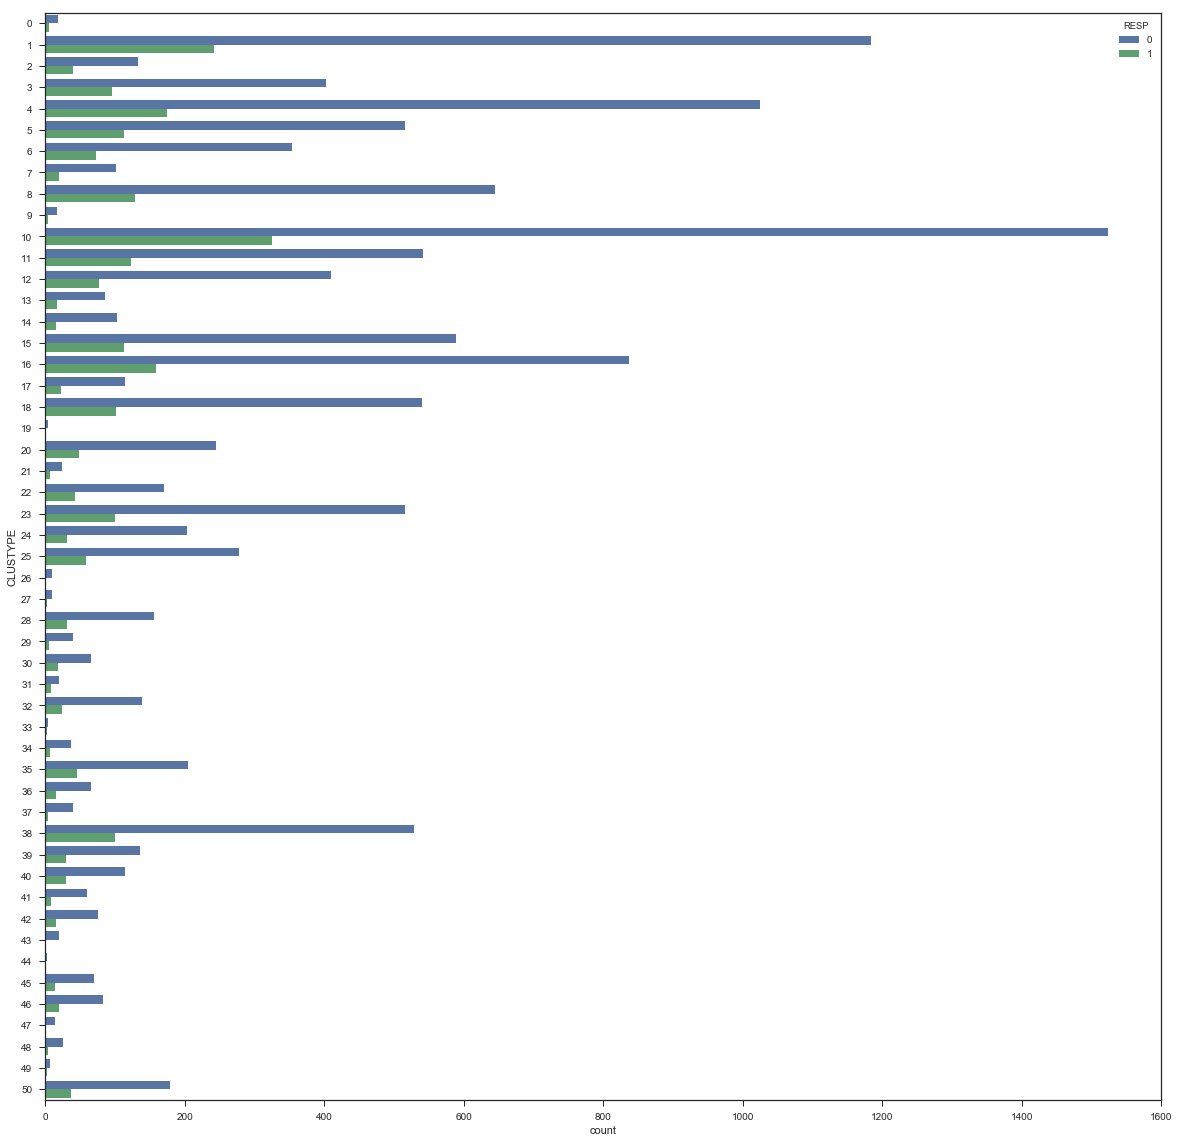

In [10]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(y="CLUSTYPE", hue="RESP", data=train)
f.savefig("MicrovisionCount.png")

### Violin Plots of Variables
https://datavizcatalogue.com/methods/violin_plot.html

A Violin Plot is used to visualise the distribution of the data and its probability density.

This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.

Box Plots are limited in their display of the data, as their visual simplicity tends to hide significant details about how values in the data are distributed. For example, with Box Plots, you can't see if the distribution is bimodal or multimodal. While Violin Plots display more information, they can be noisier than a Box Plot.

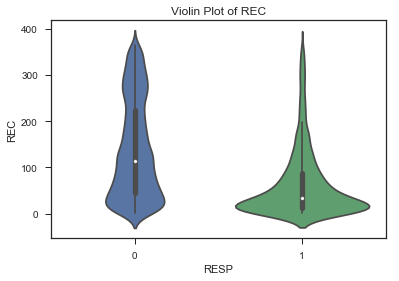

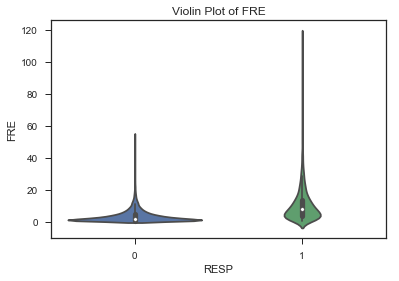

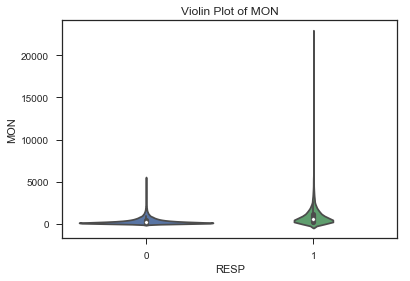

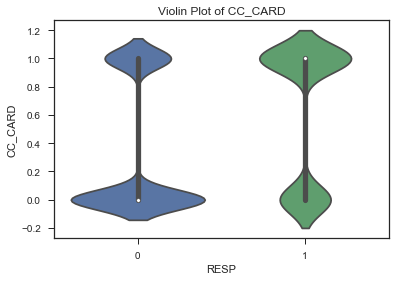

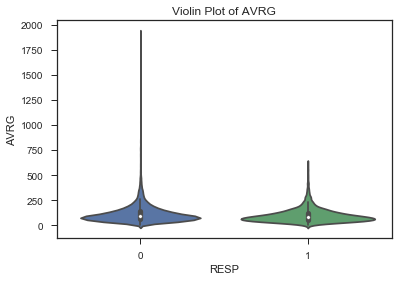

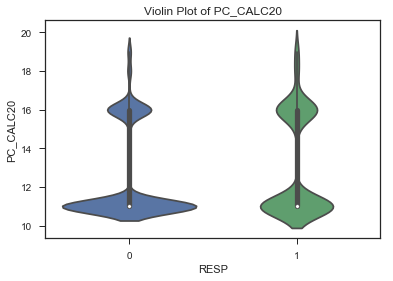

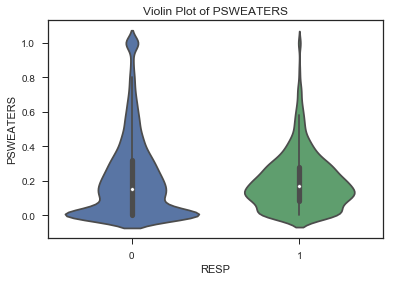

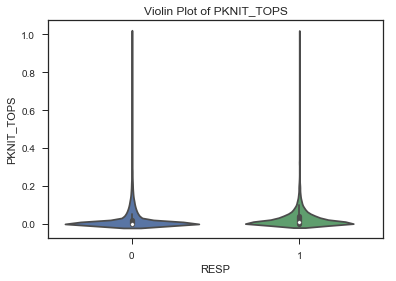

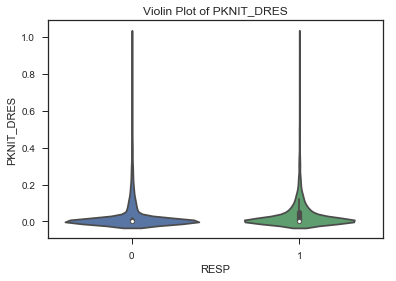

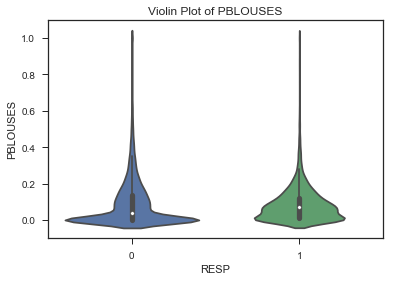

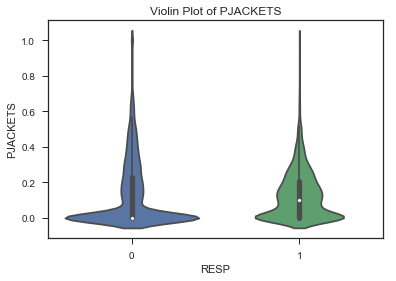

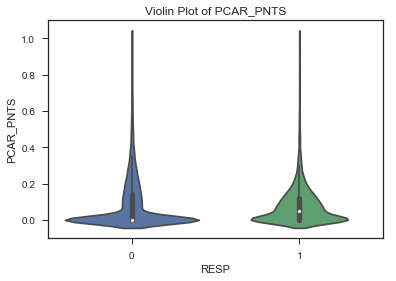

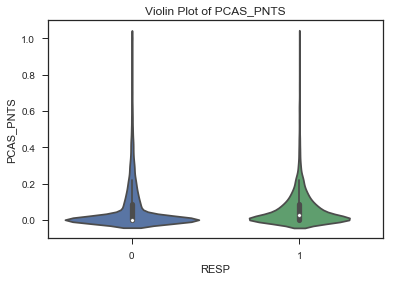

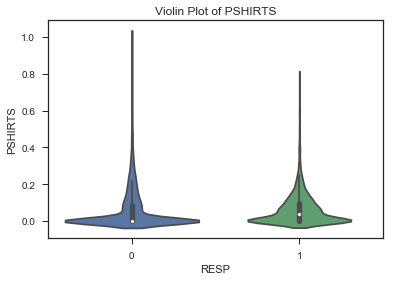

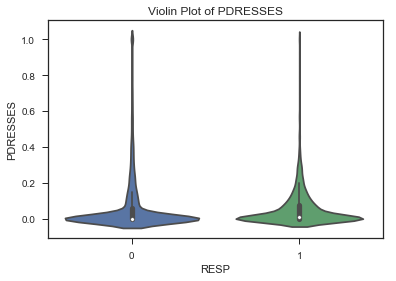

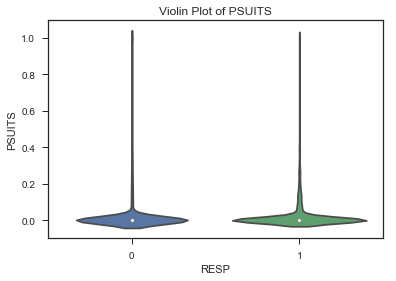

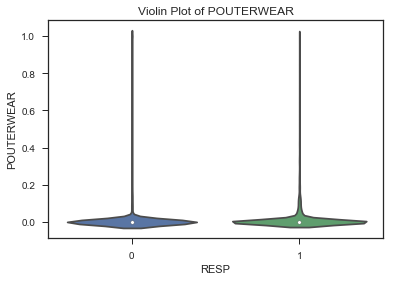

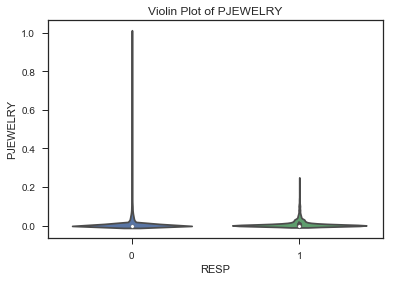

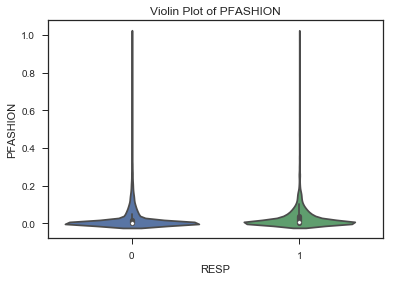

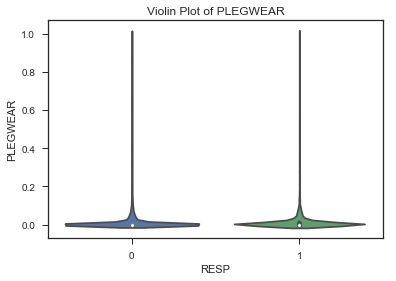

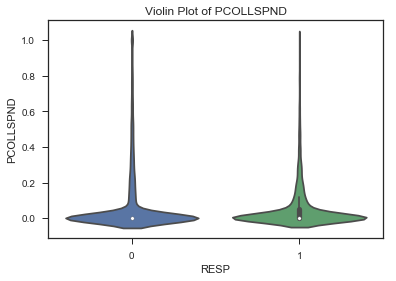

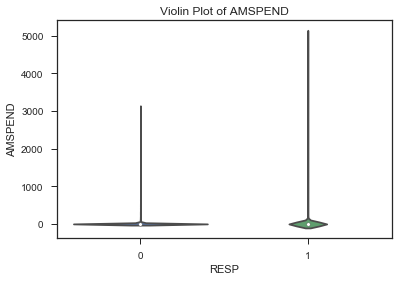

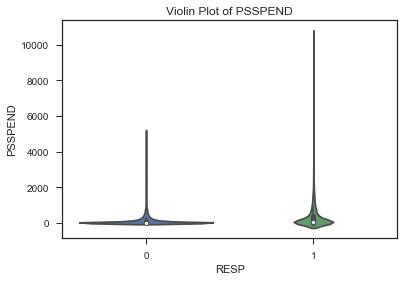

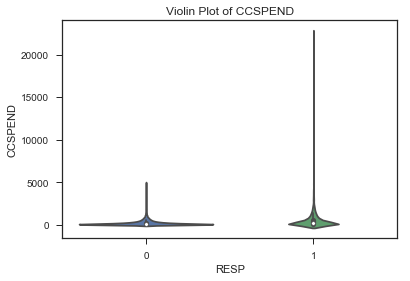

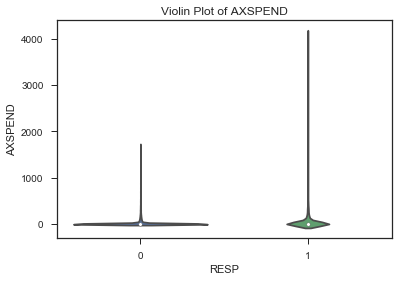

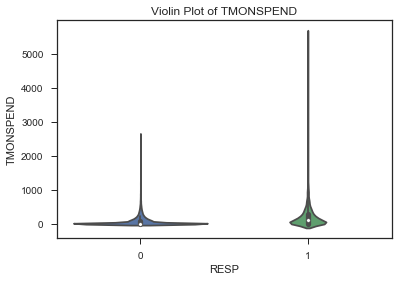

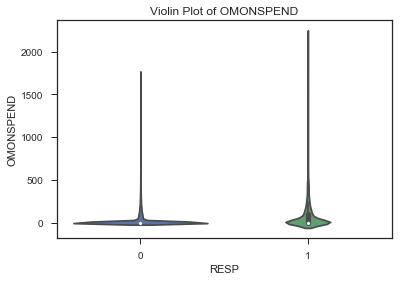

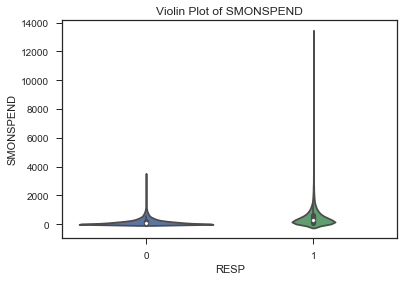

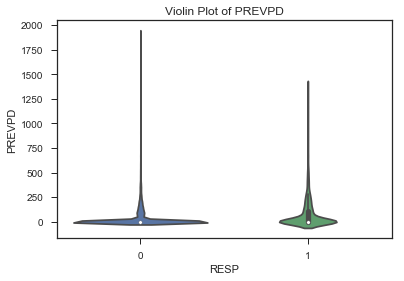

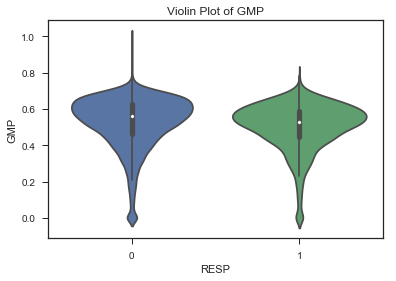

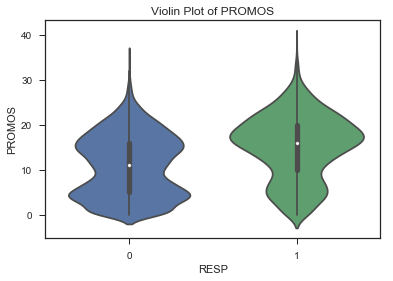

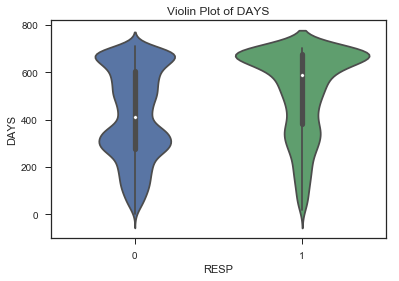

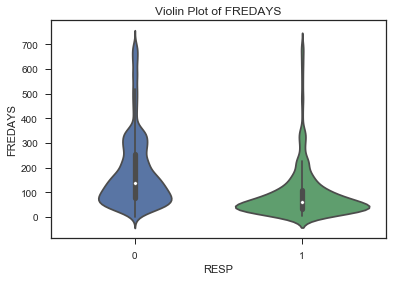

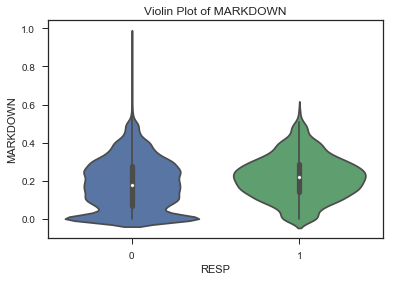

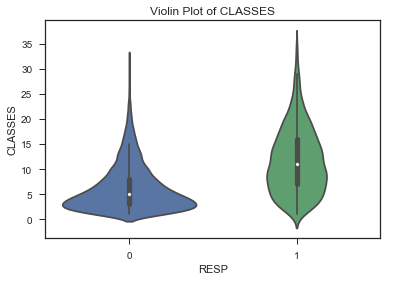

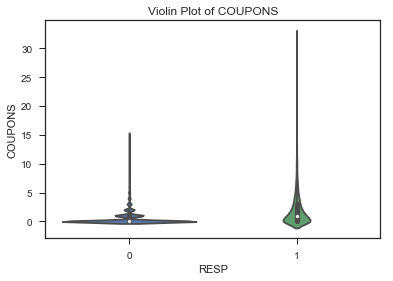

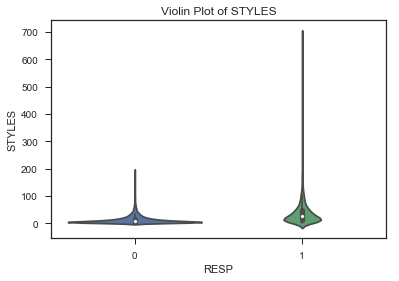

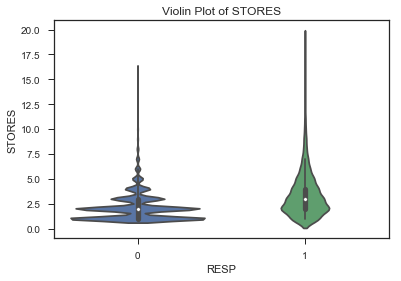

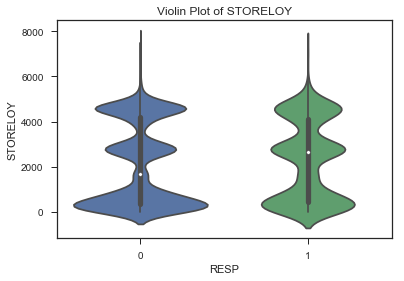

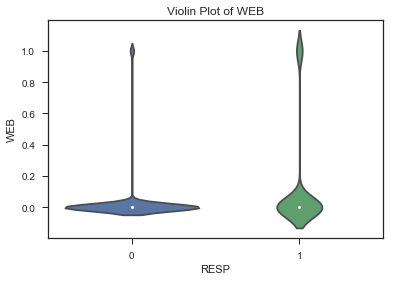

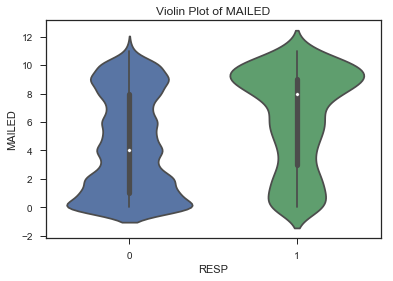

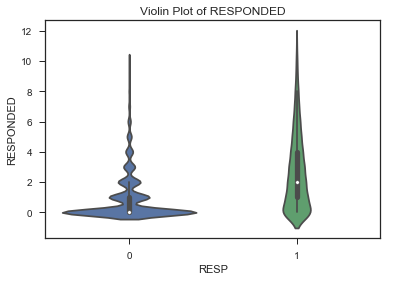

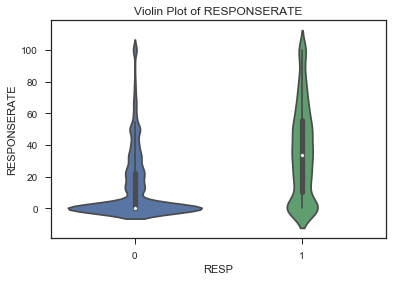

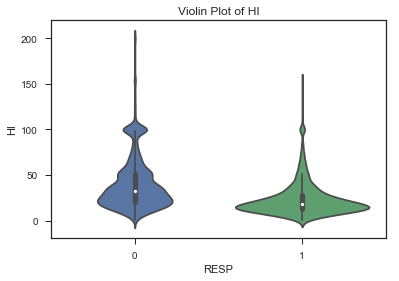

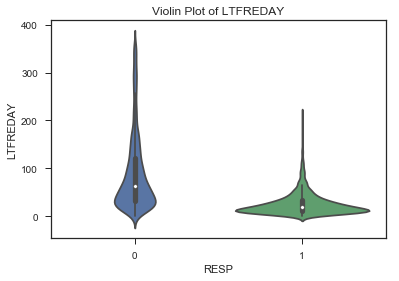

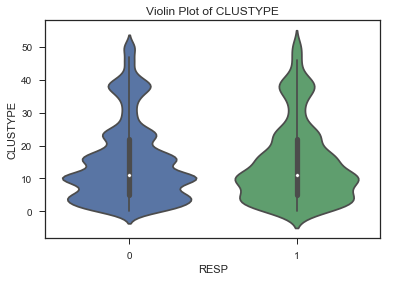

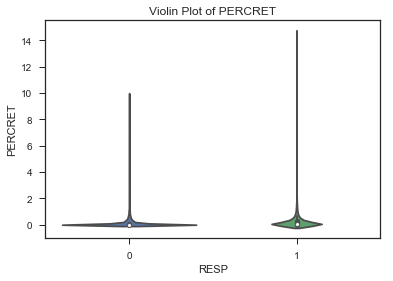

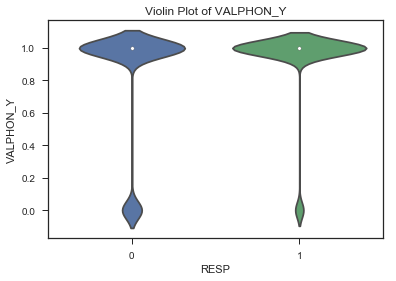

In [11]:
# Create a violin plot for all the predictors
for predictor in predictors:
    fig, ax= plt.subplots()
    sns.violinplot(x="RESP", y=predictor, data=train, size=6)
    ax.set_title('Violin Plot of '+predictor)
    fig.savefig(predictor)

## Data Transformations to Achieve Normality or Symmetry

### Without Transformation
We first have a look at the KDE plot for the predictors, sorted by whether they responded or not, without first transforming the data.

#### KDE Plots

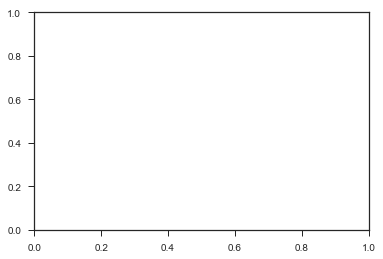

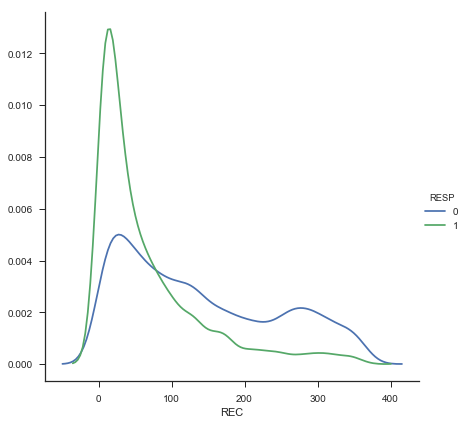

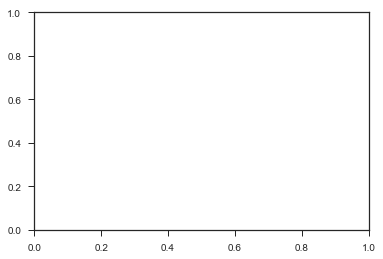

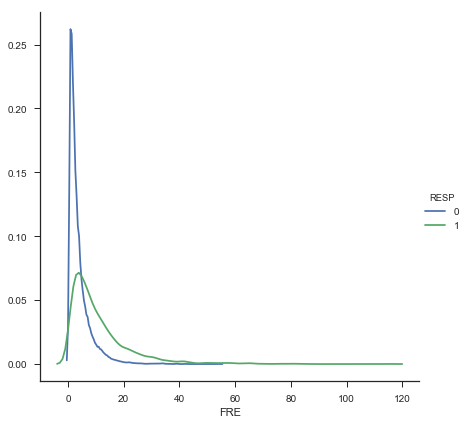

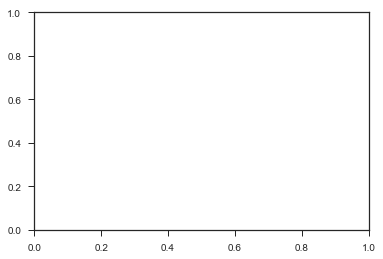

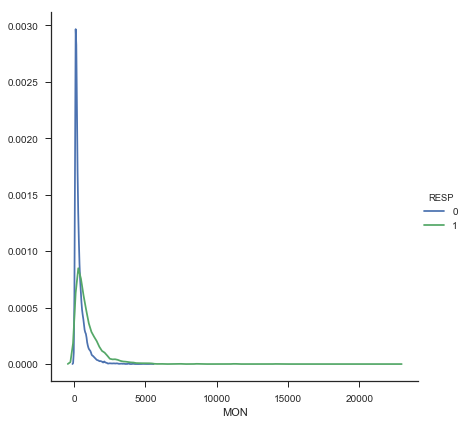

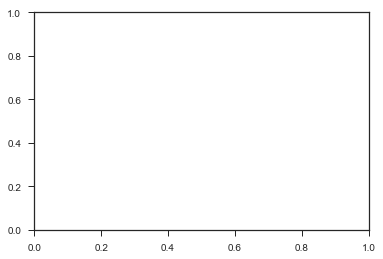

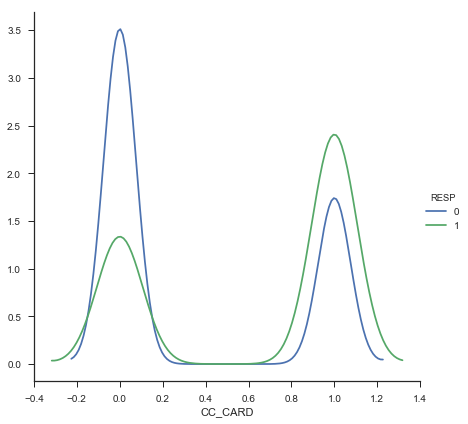

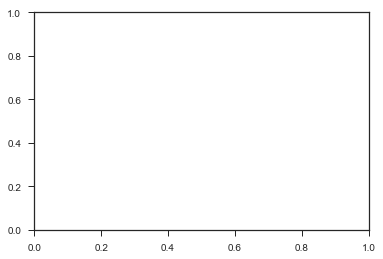

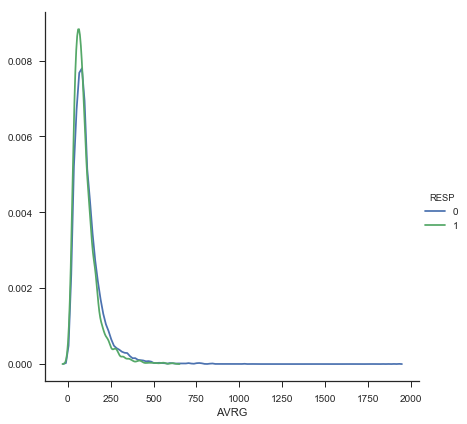

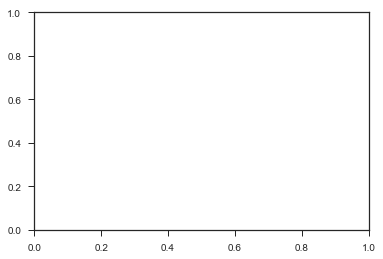

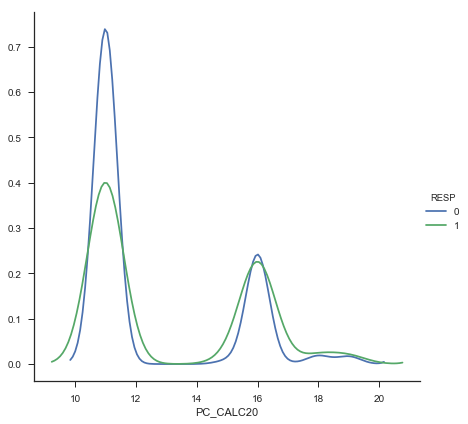

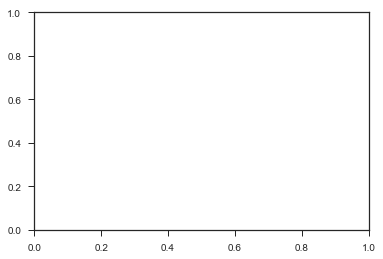

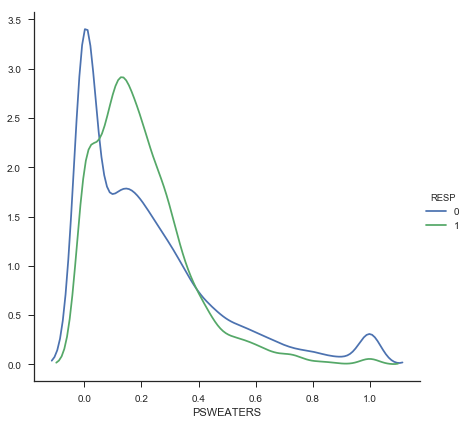

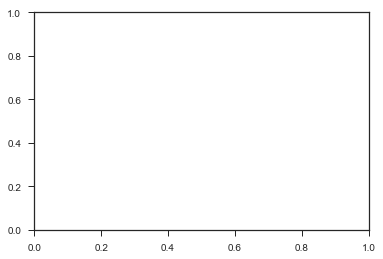

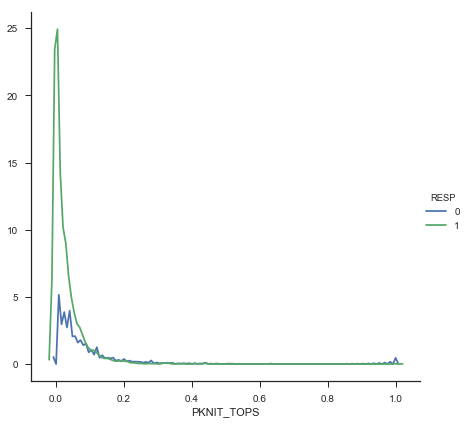

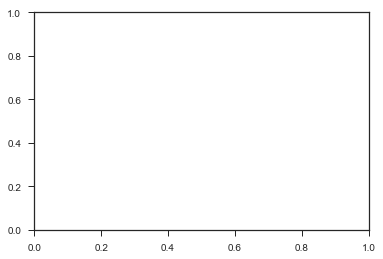

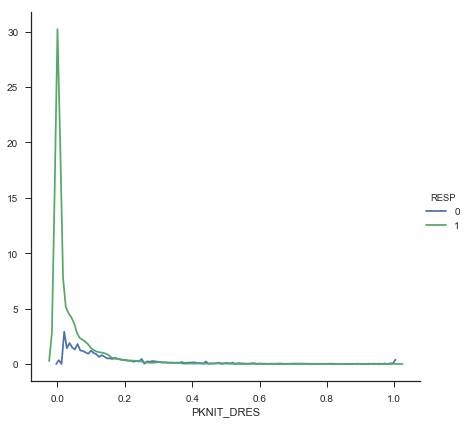

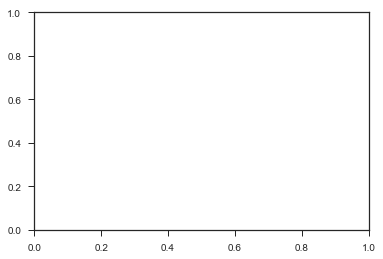

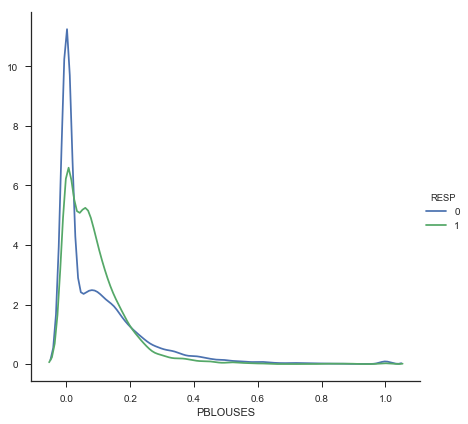

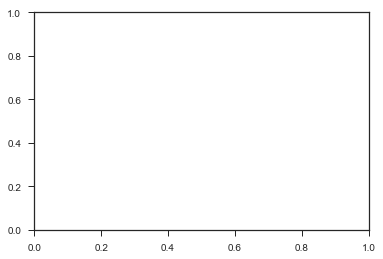

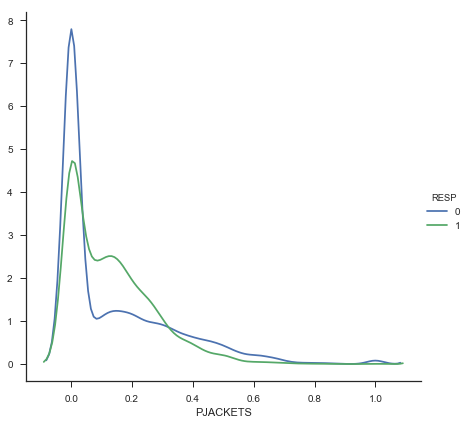

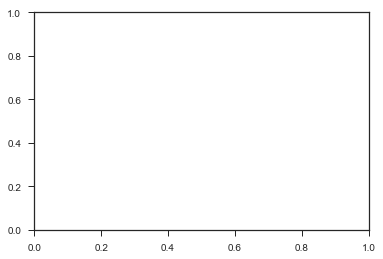

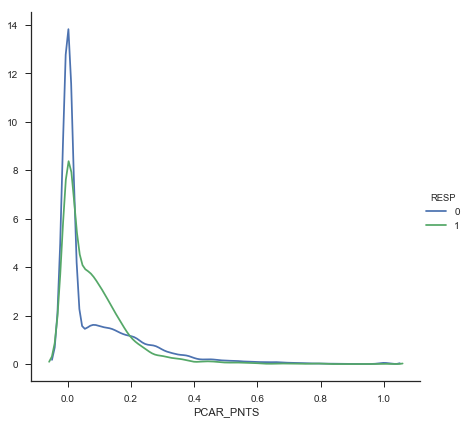

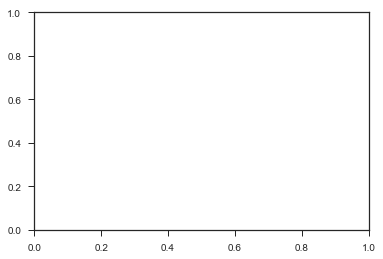

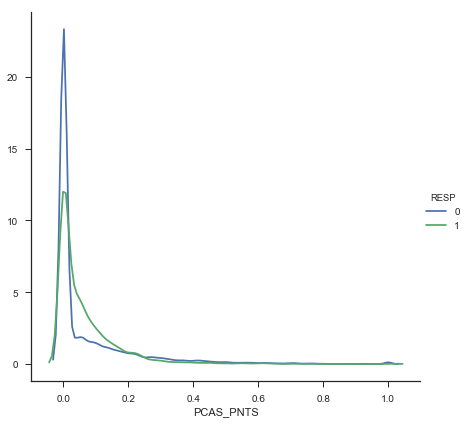

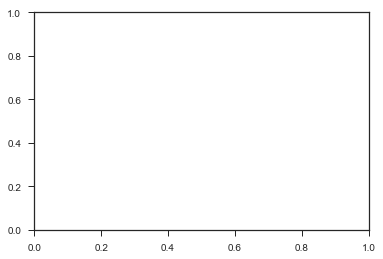

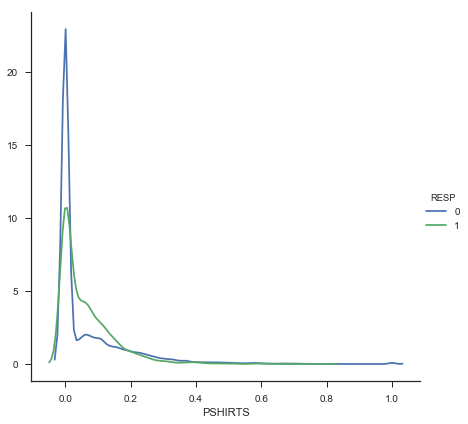

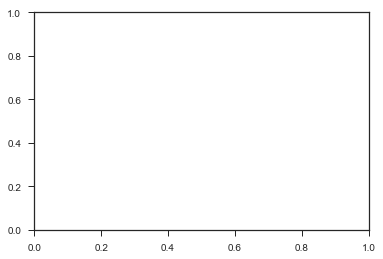

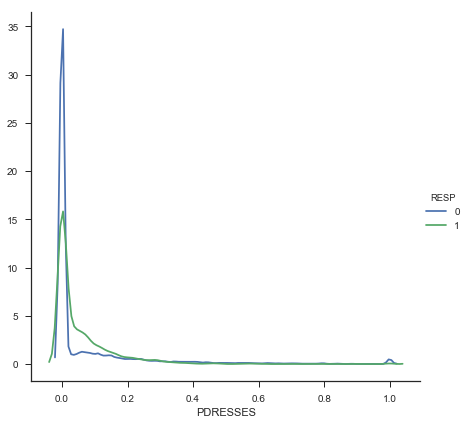

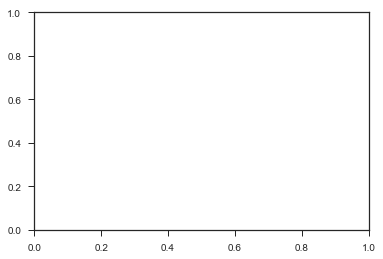

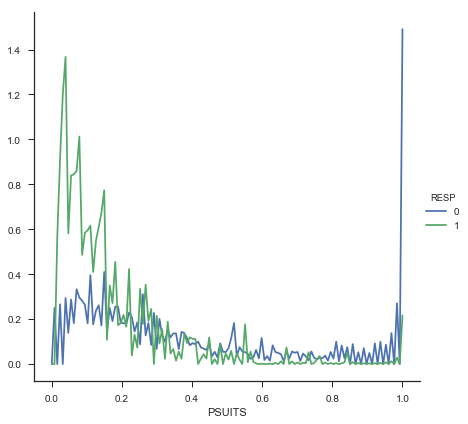

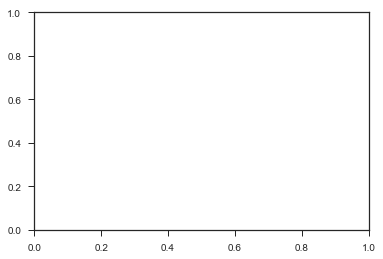

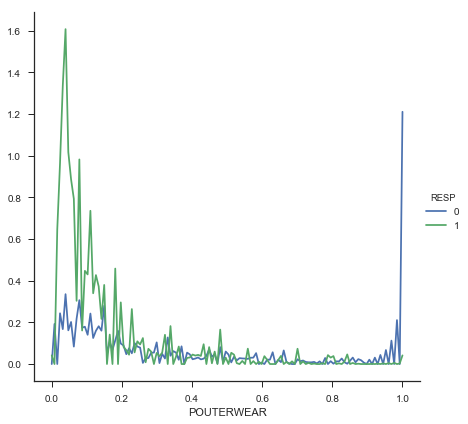

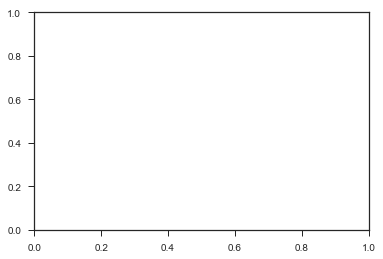

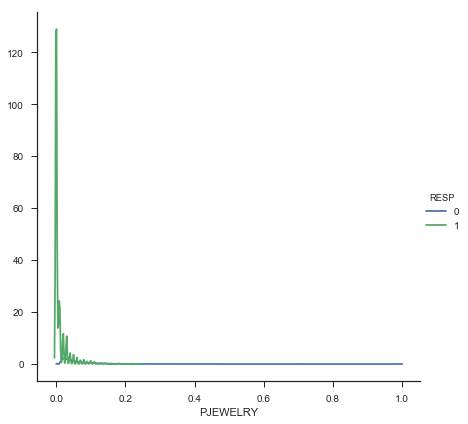

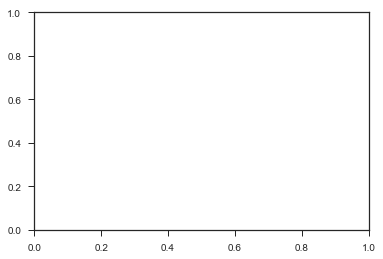

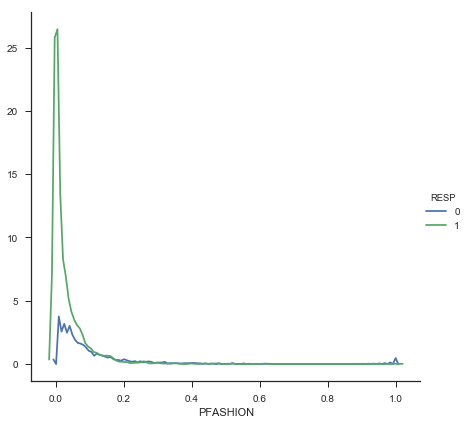

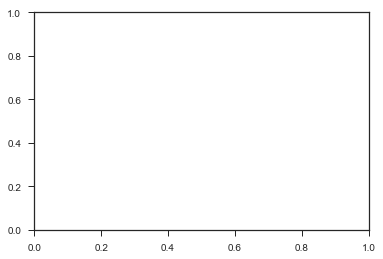

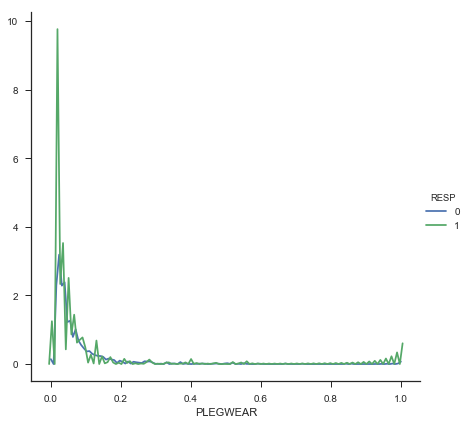

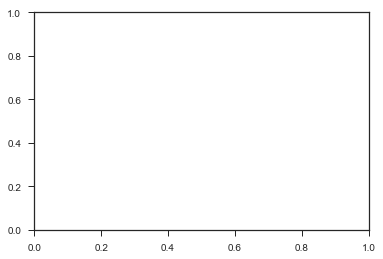

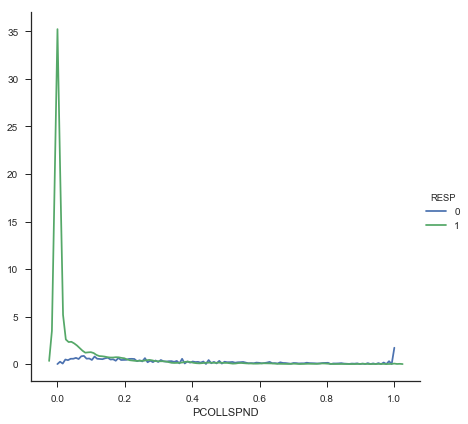

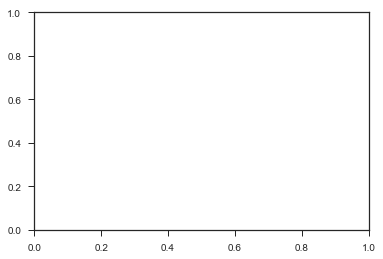

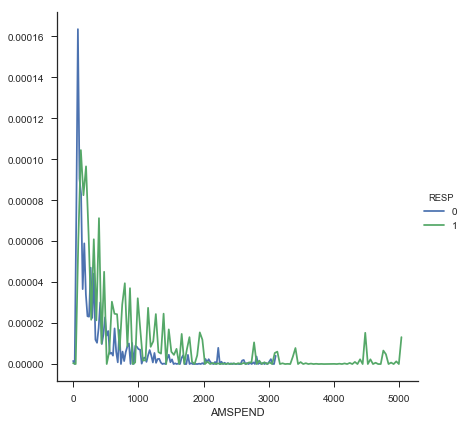

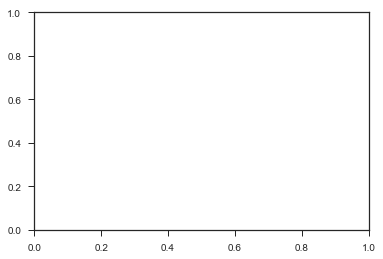

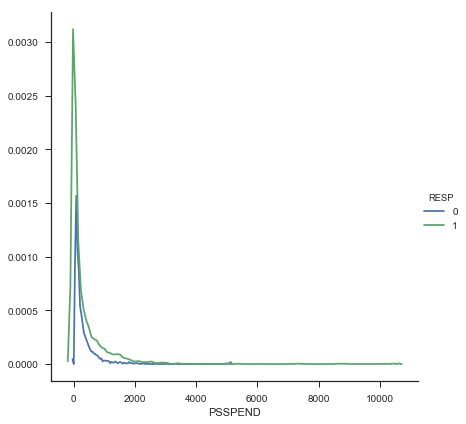

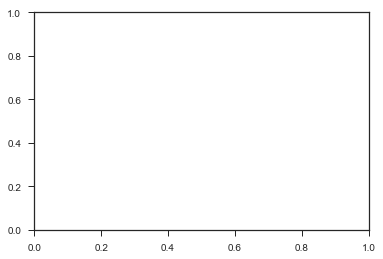

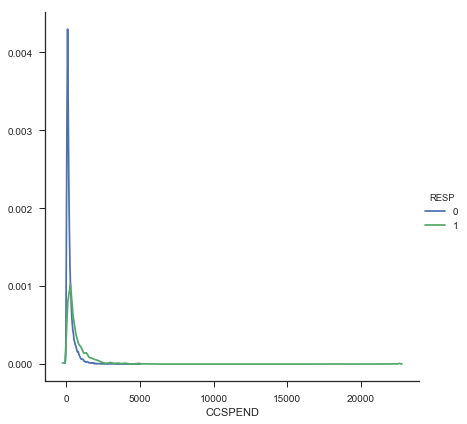

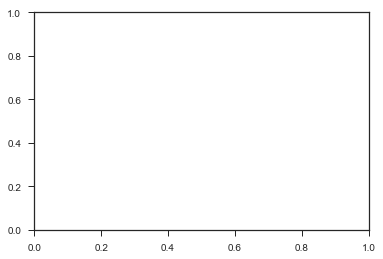

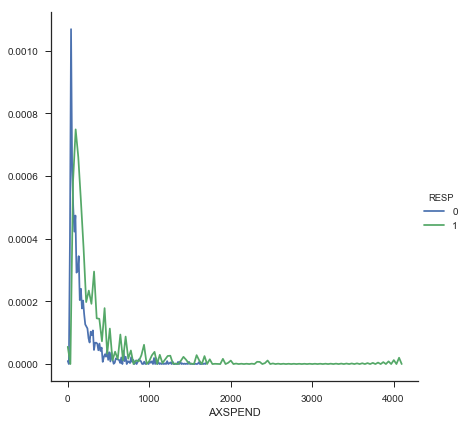

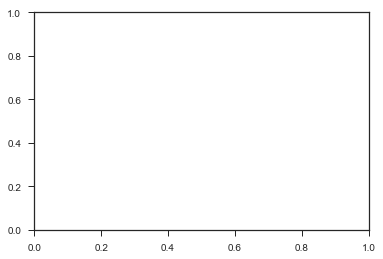

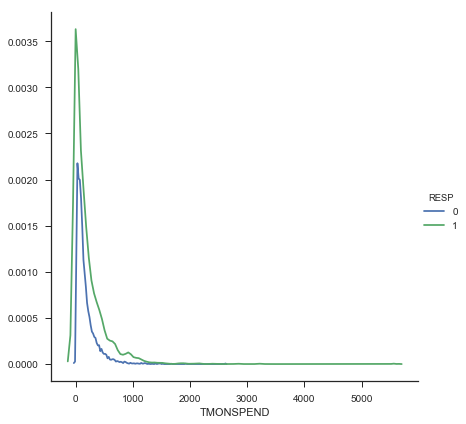

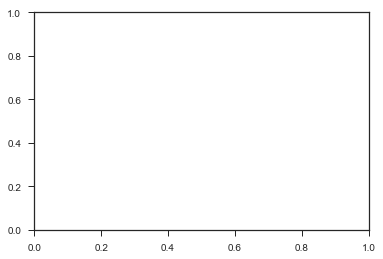

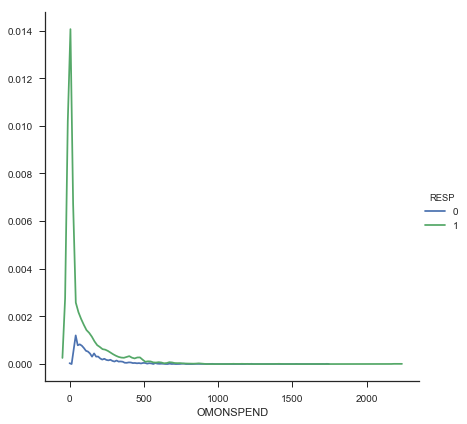

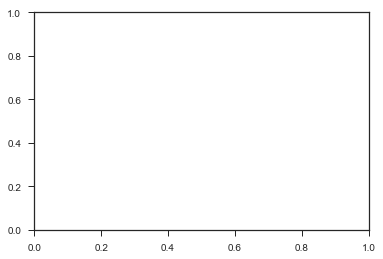

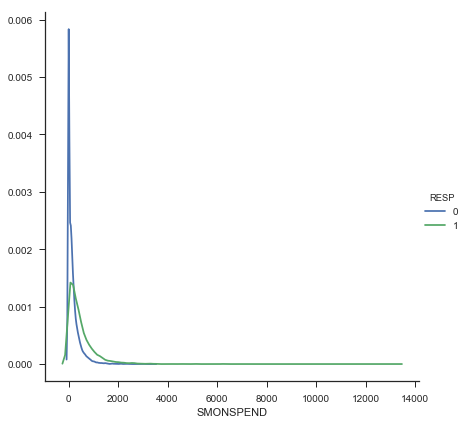

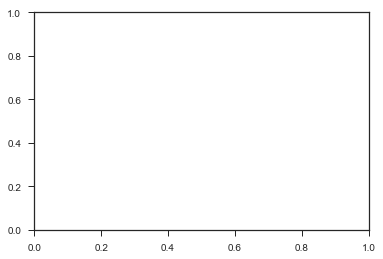

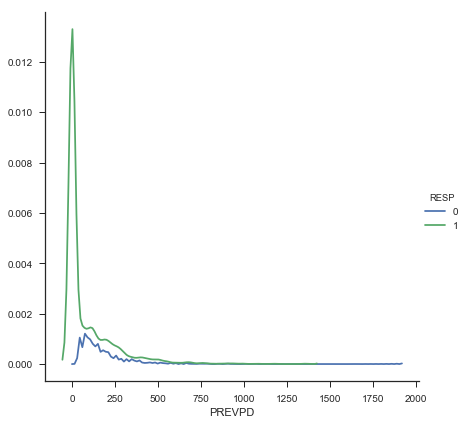

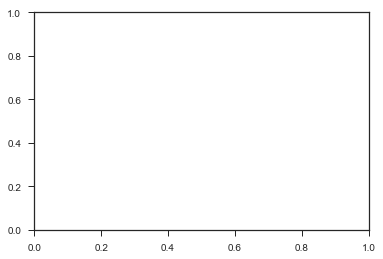

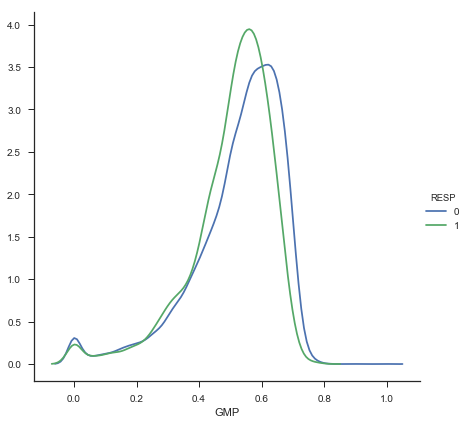

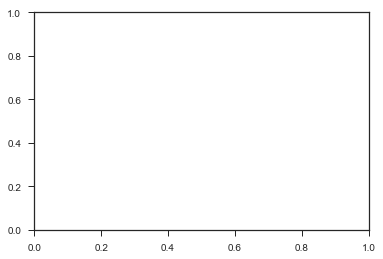

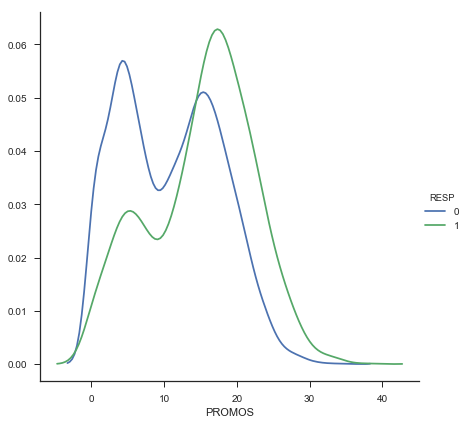

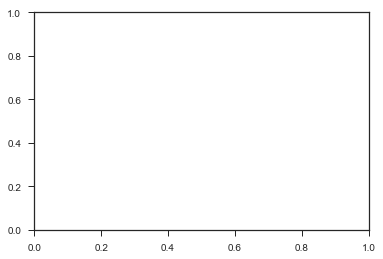

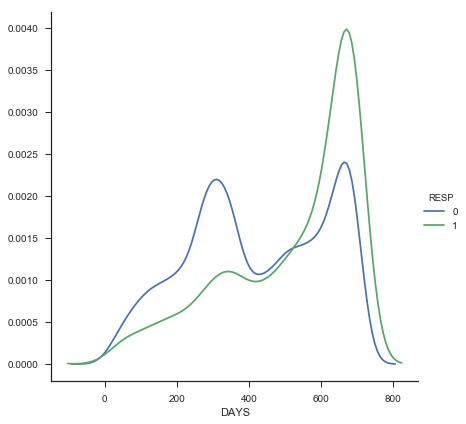

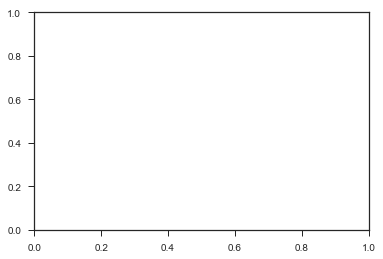

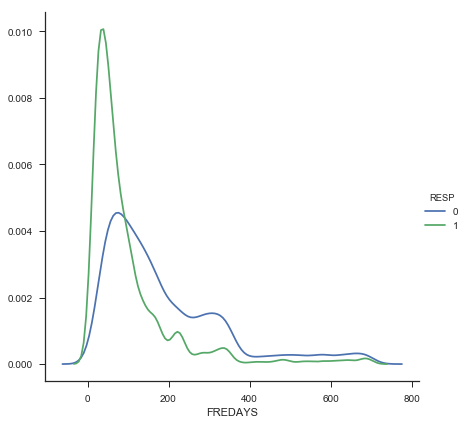

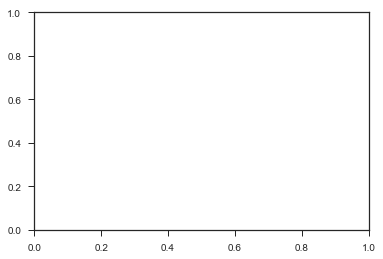

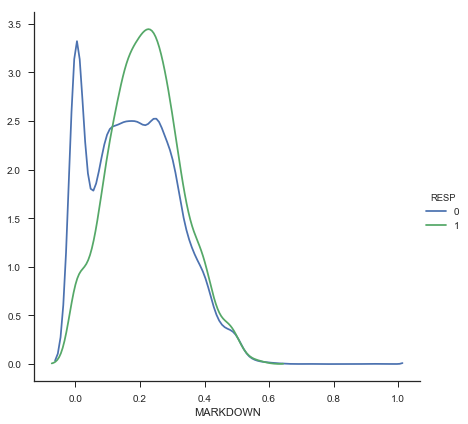

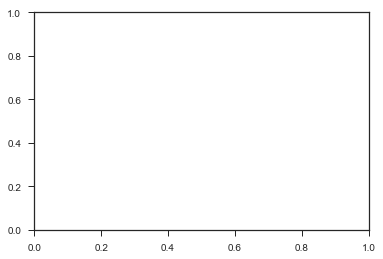

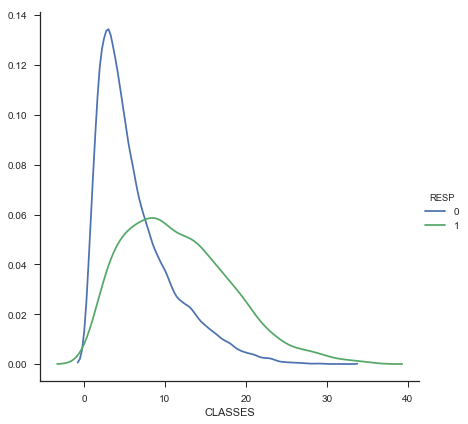

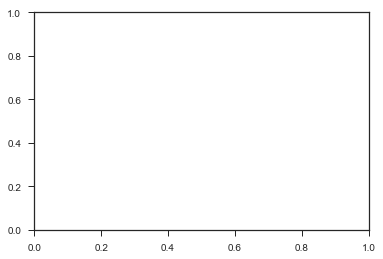

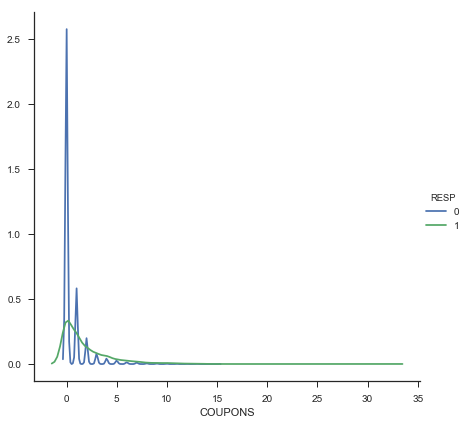

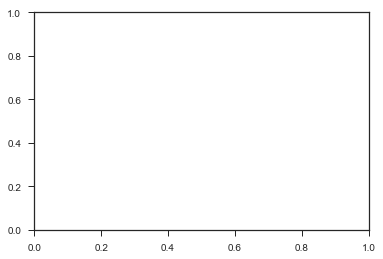

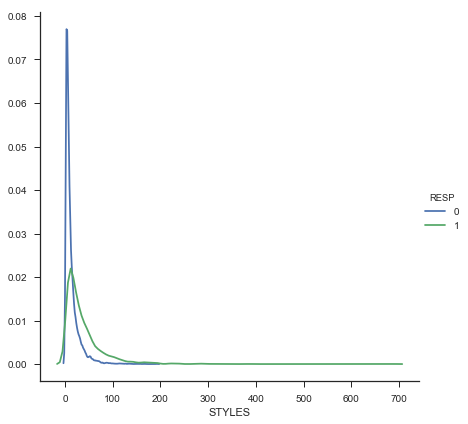

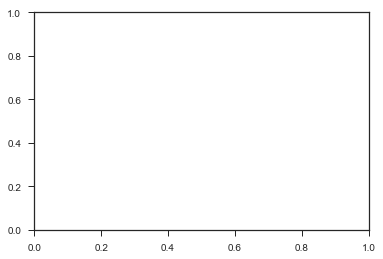

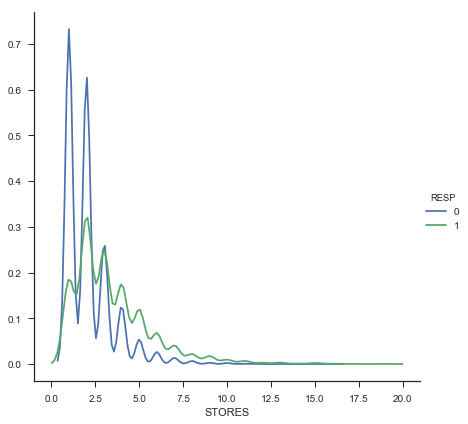

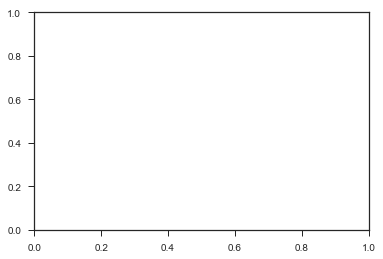

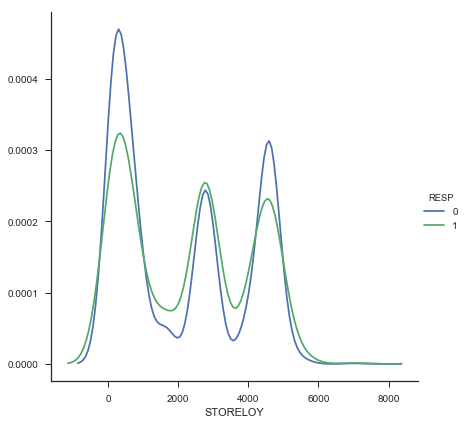

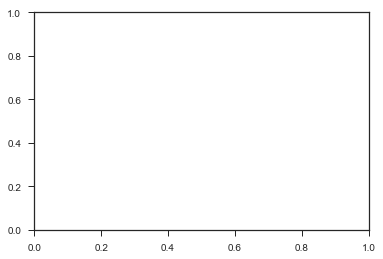

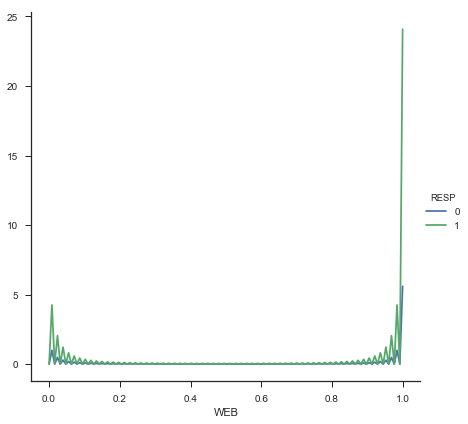

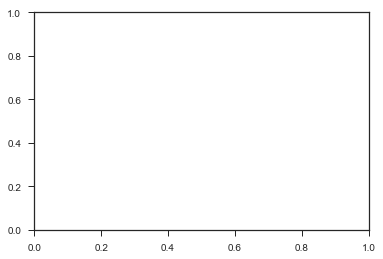

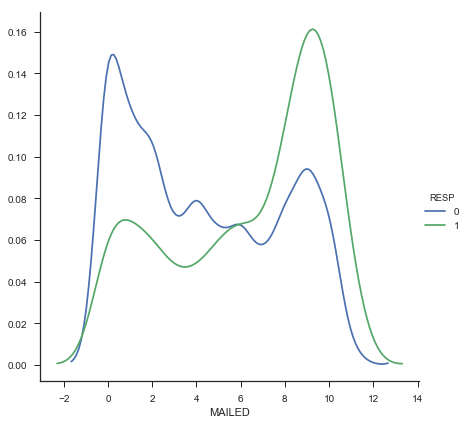

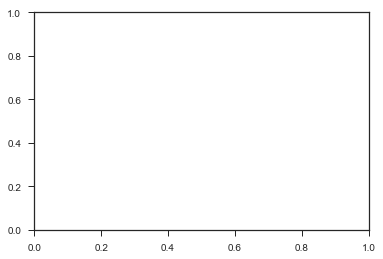

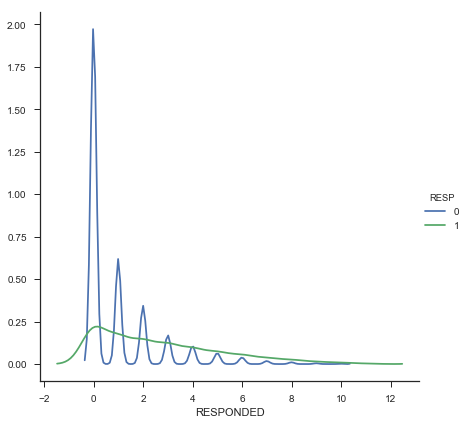

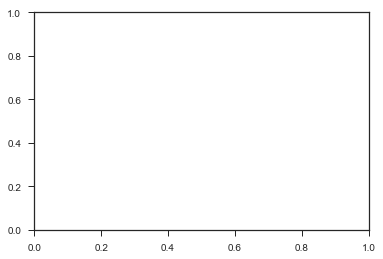

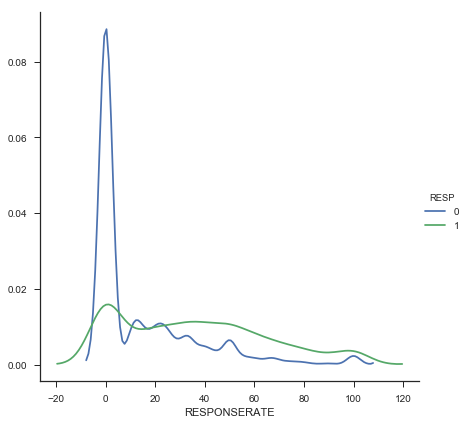

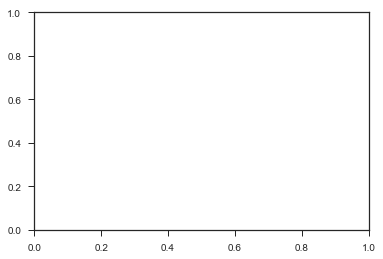

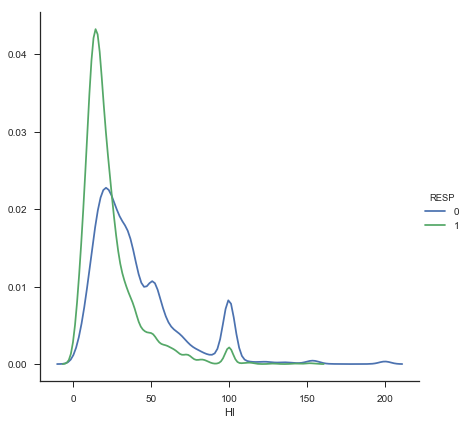

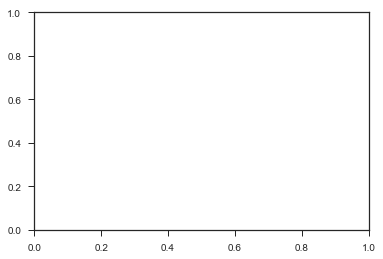

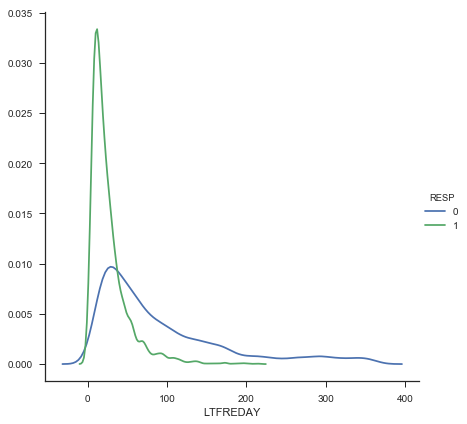

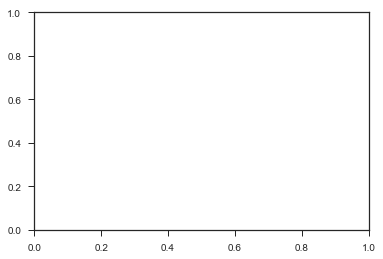

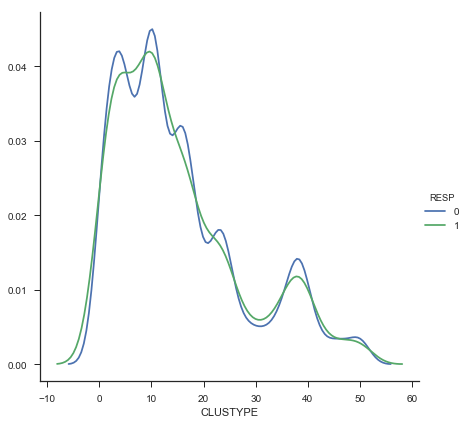

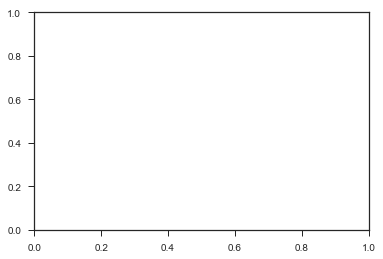

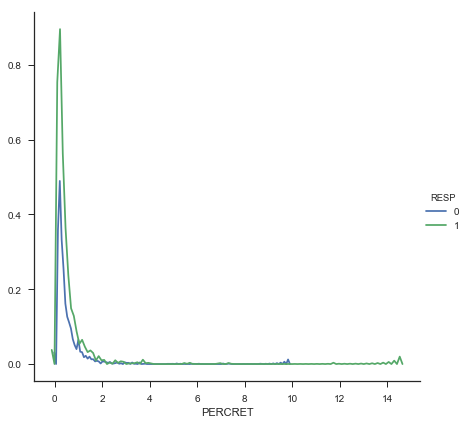

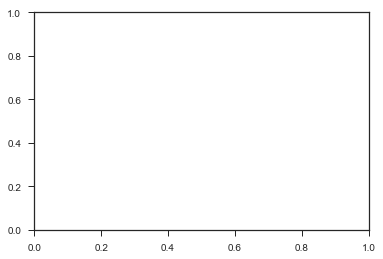

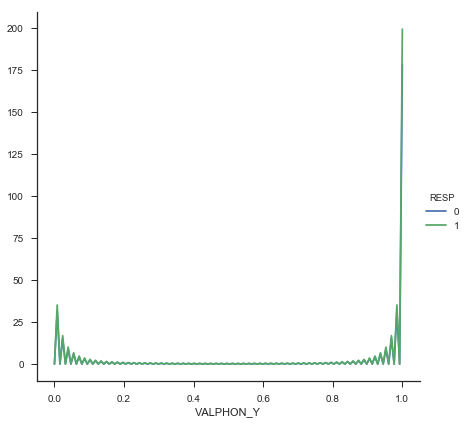

In [12]:
# Create a kdeplot plot for all the predictors
for predictor in predictors:
    fig, ax= plt.subplots()
    sns_plot = sns.FacetGrid(train, hue="RESP", size=6) \
    .map(sns.kdeplot, predictor) \
    .add_legend()
    #ax.set_title('KDE Plot of '+predictor)
    fig = sns_plot.fig
    fig.savefig(predictor)

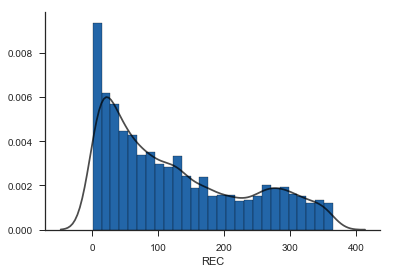

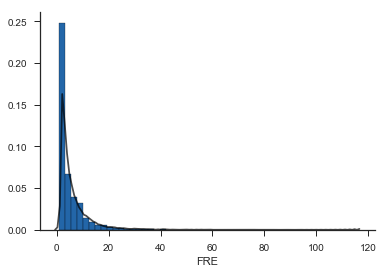

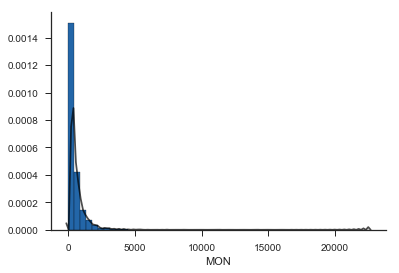

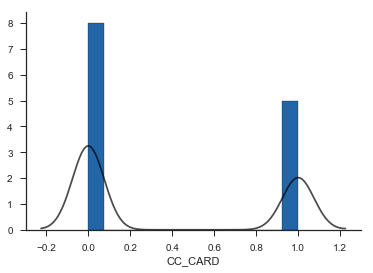

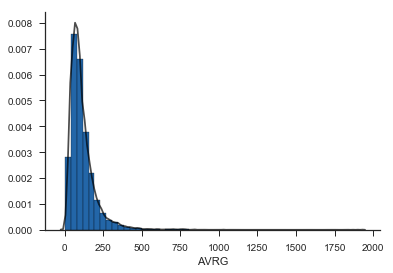

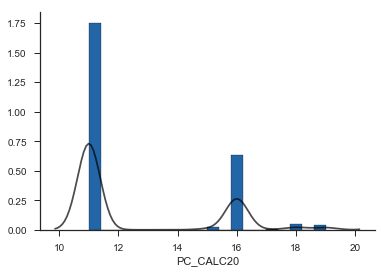

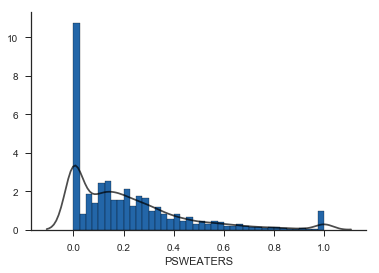

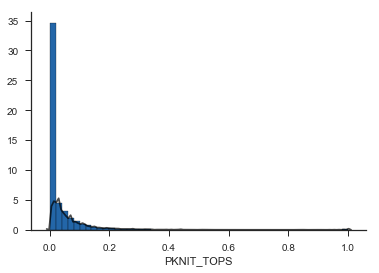

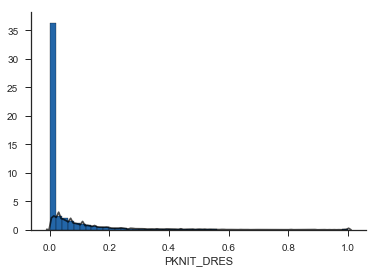

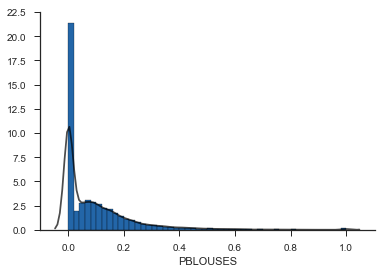

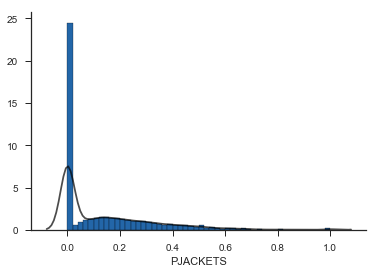

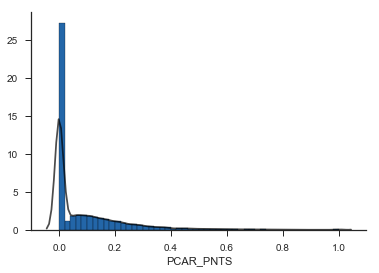

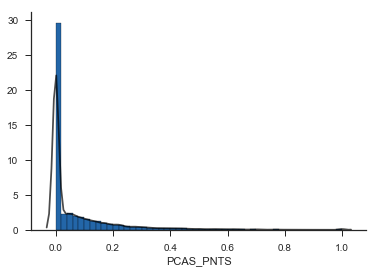

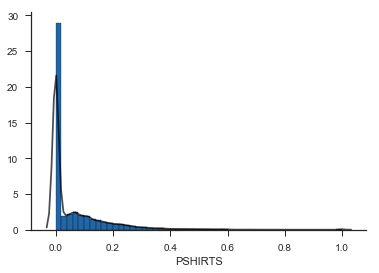

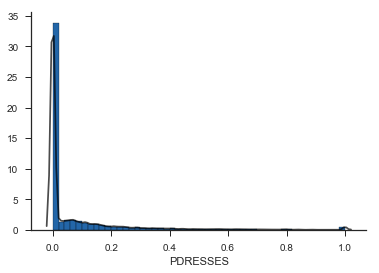

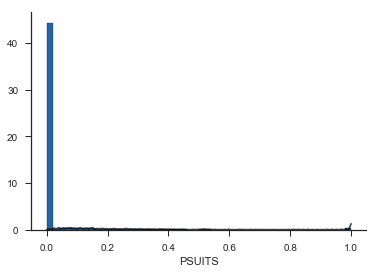

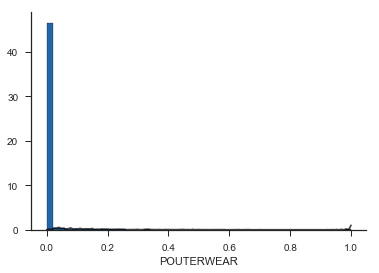

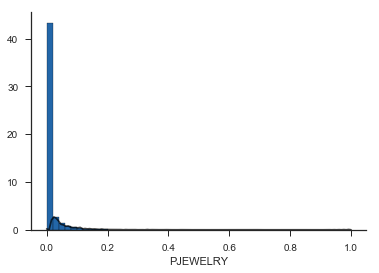

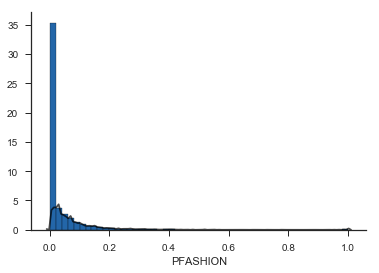

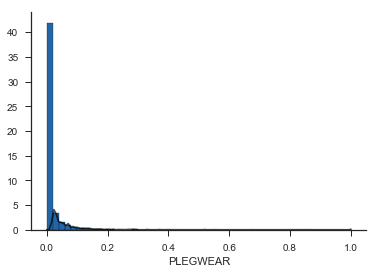

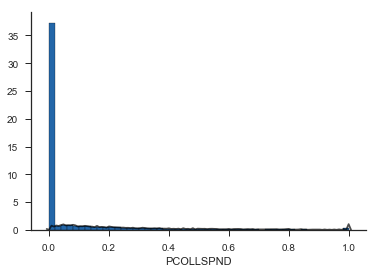

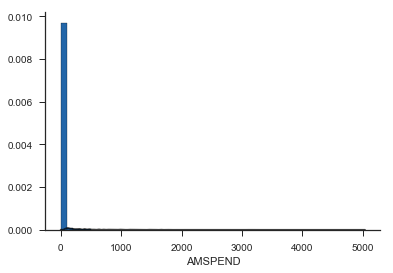

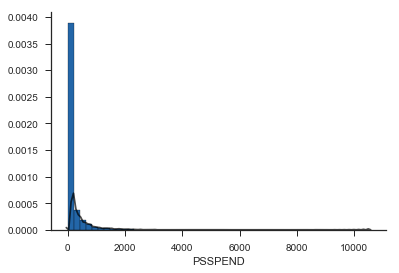

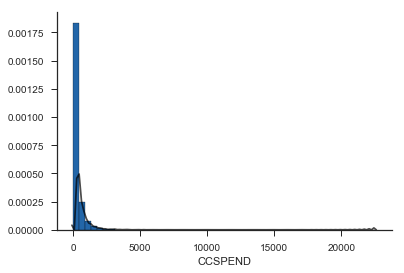

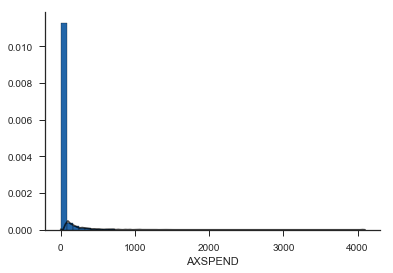

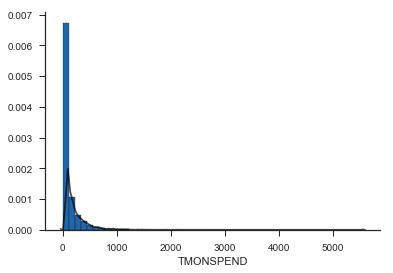

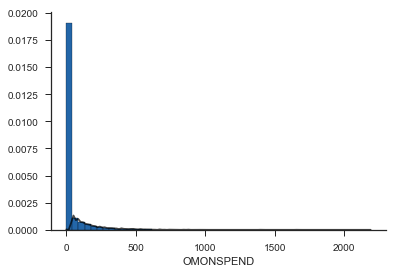

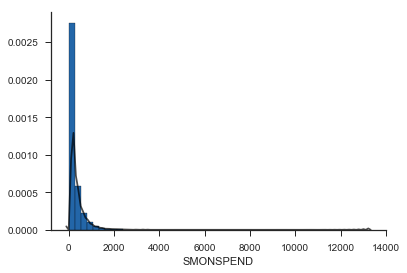

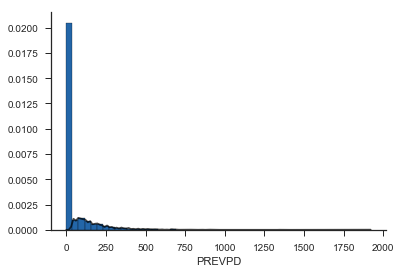

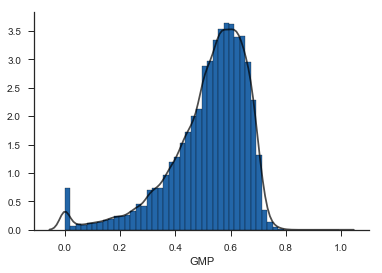

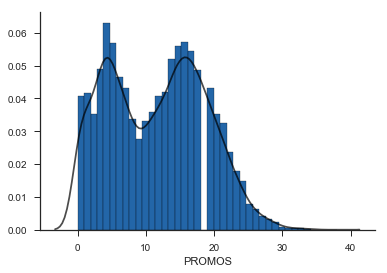

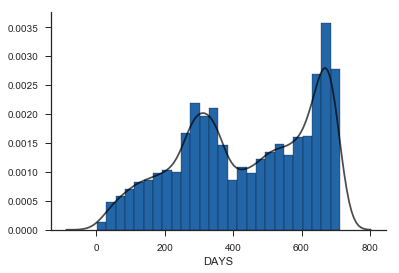

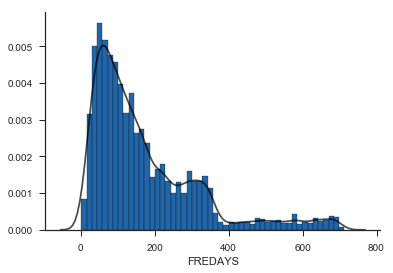

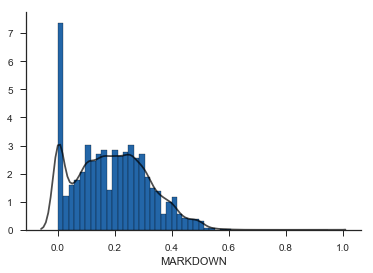

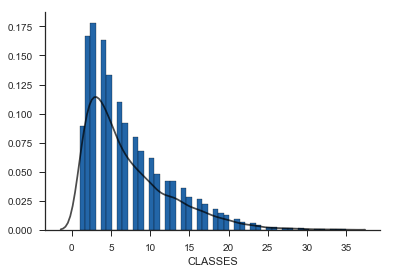

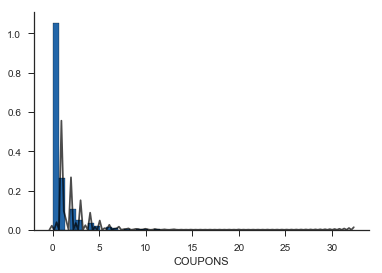

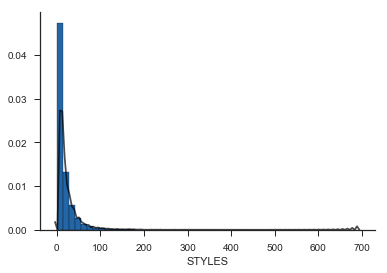

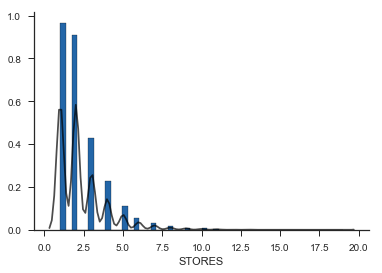

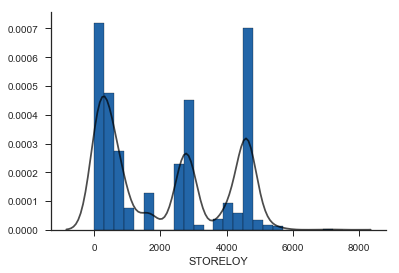

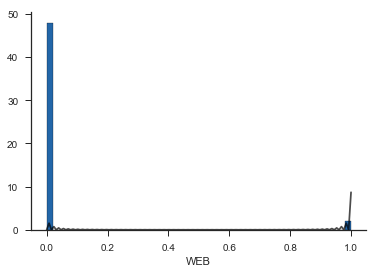

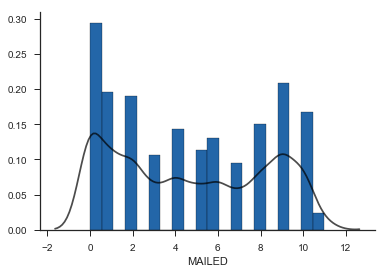

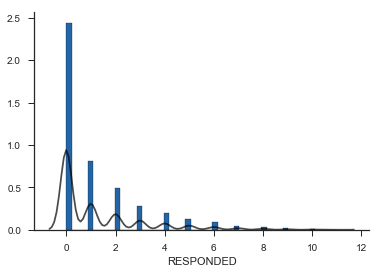

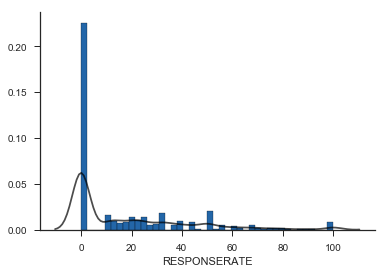

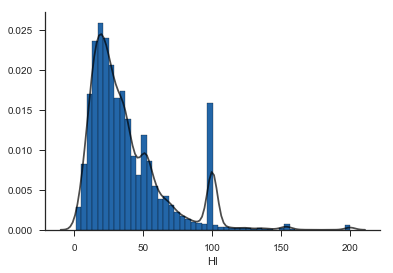

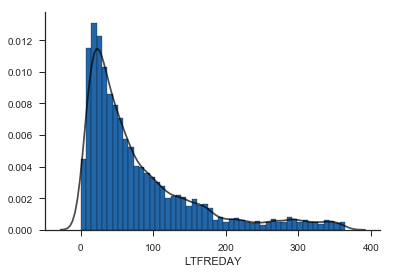

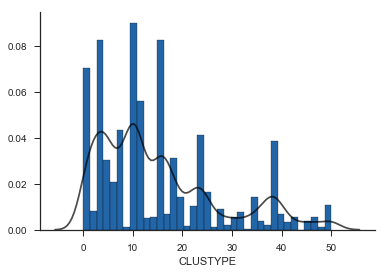

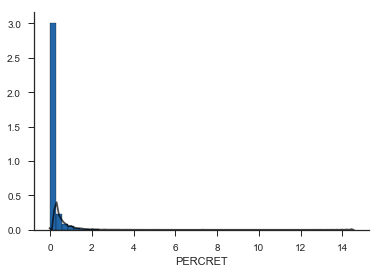

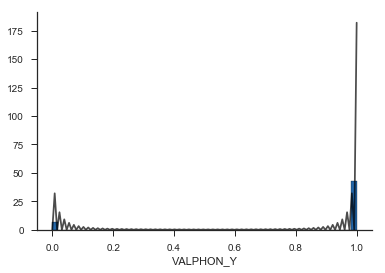

In [13]:
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return fig, ax

for predictor in predictors:
    hist(train[predictor])
    sns.despine()
    plt.show()
    fig.savefig(predictor)

##### Description of the above two types of plots
Most of the numeric fields are right-skewed. 

### With Transformation
We now transform the data and have a look at the effects.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15218 entries, 19702 to 18795
Data columns (total 49 columns):
REC             15218 non-null int64
FRE             15218 non-null int64
MON             15218 non-null float64
CC_CARD         15218 non-null int64
AVRG            15218 non-null float64
PC_CALC20       15218 non-null int64
PSWEATERS       15218 non-null float64
PKNIT_TOPS      15218 non-null float64
PKNIT_DRES      15218 non-null float64
PBLOUSES        15218 non-null float64
PJACKETS        15218 non-null float64
PCAR_PNTS       15218 non-null float64
PCAS_PNTS       15218 non-null float64
PSHIRTS         15218 non-null float64
PDRESSES        15218 non-null float64
PSUITS          15218 non-null float64
POUTERWEAR      15218 non-null float64
PJEWELRY        15218 non-null float64
PFASHION        15218 non-null float64
PLEGWEAR        15218 non-null float64
PCOLLSPND       15218 non-null float64
AMSPEND         15218 non-null float64
PSSPEND         15218 non-null float6

In [15]:
# Get only the numerical data
numerical_features = train.select_dtypes(include = ["float64"]).columns
other_features = train.select_dtypes(exclude = ["float64"]).columns
print(numerical_features)

Index(['MON', 'AVRG', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
       'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS',
       'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND',
       'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND',
       'SMONSPEND', 'PREVPD', 'GMP', 'FREDAYS', 'MARKDOWN', 'RESPONSERATE',
       'HI', 'LTFREDAY', 'PERCRET'],
      dtype='object')


The list above is all the variables we are going to apply a natural log transformation. Have a look at a comparison between the KDE and distribution plots before and after the transformation. Maybe include an example in the report of the difference of before and after. 

In [16]:
train_num = train[numerical_features]
train_other = train[other_features]

In [17]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# A skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

31 skewed numerical features to log transform


In [18]:
# Join categorical and other features
train = pd.concat([train_num, train_other], axis = 1)

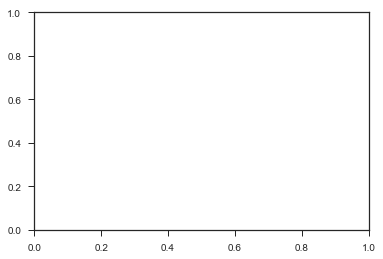

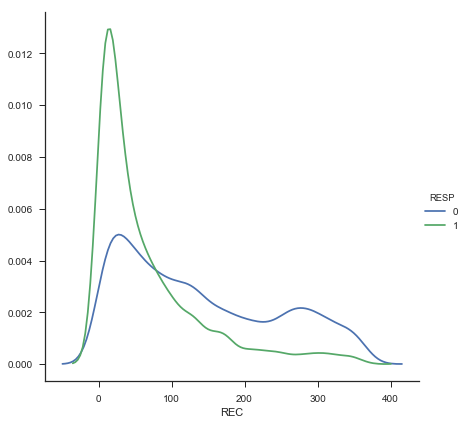

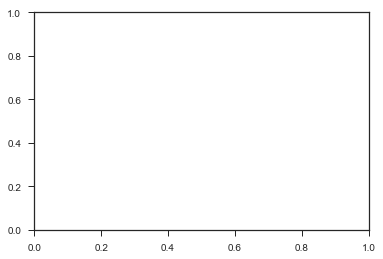

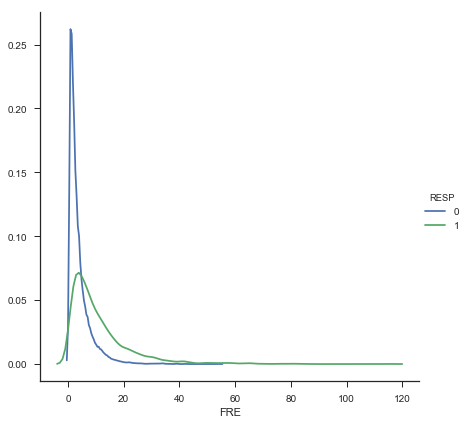

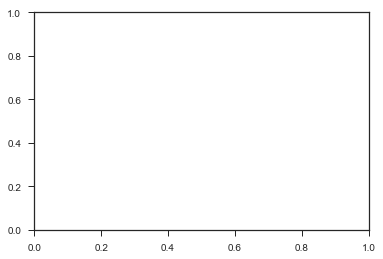

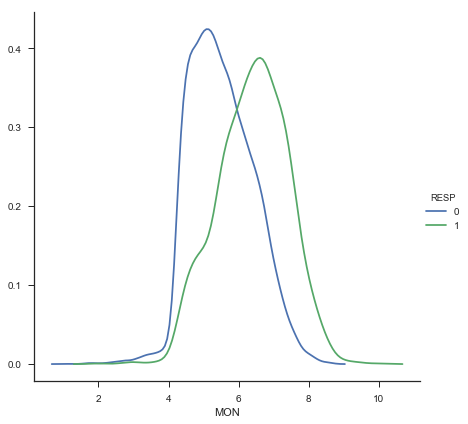

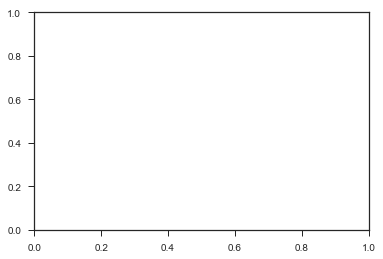

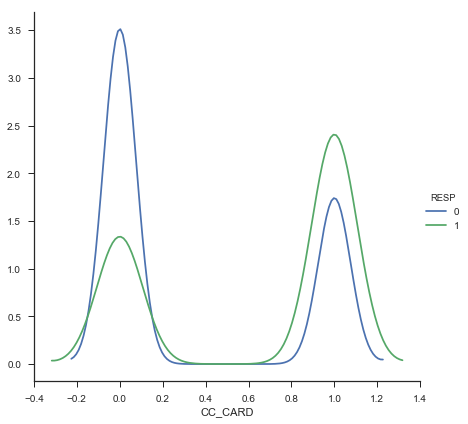

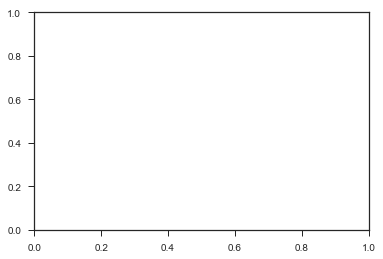

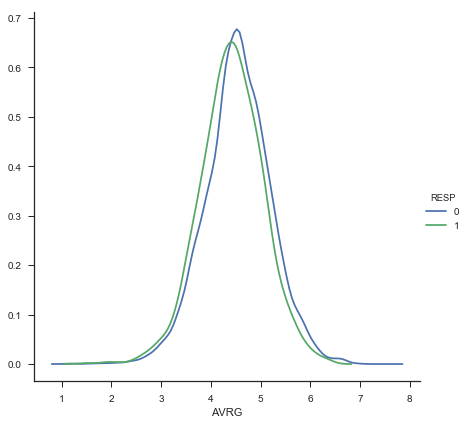

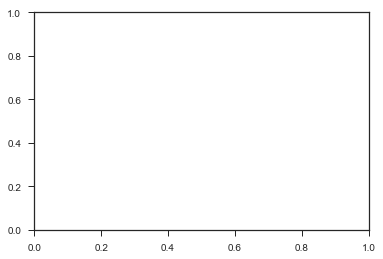

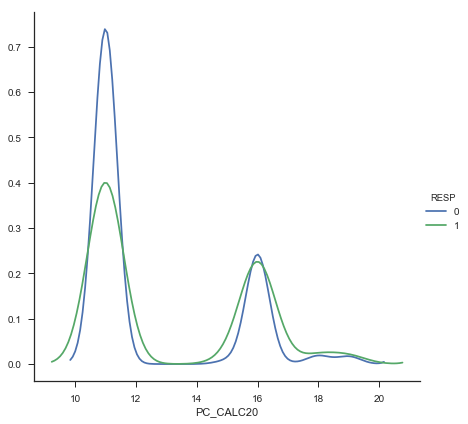

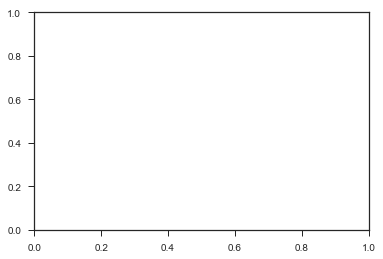

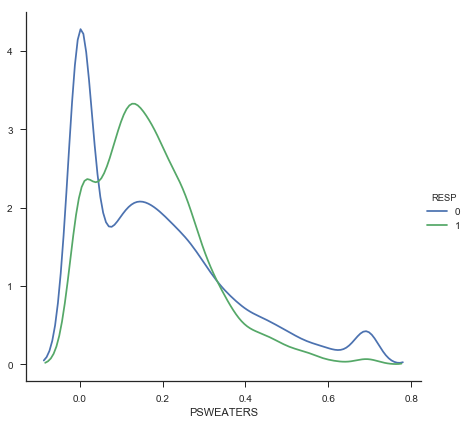

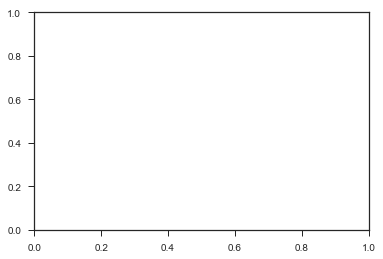

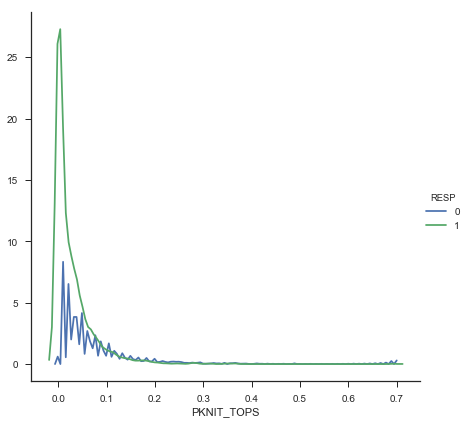

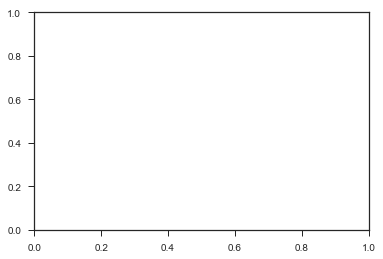

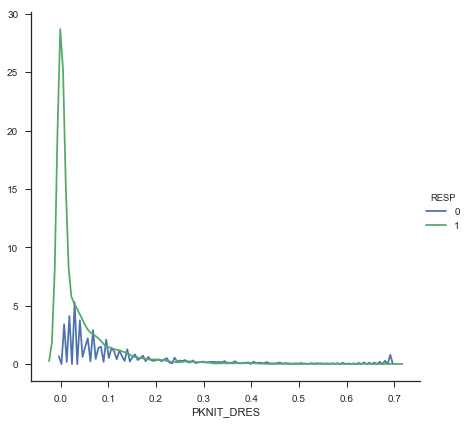

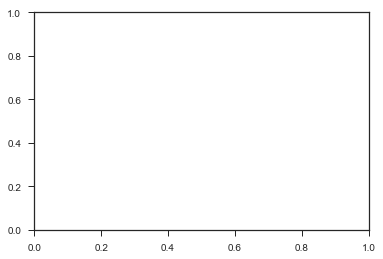

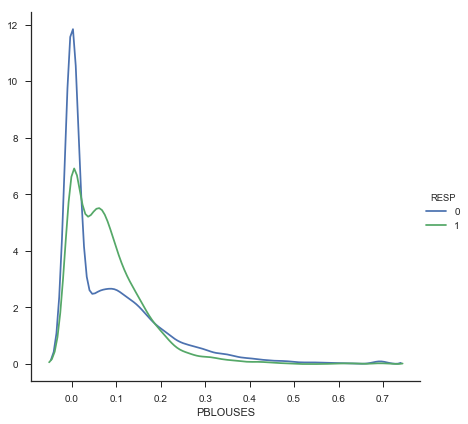

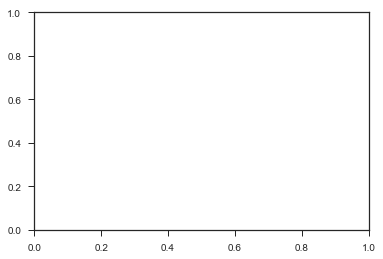

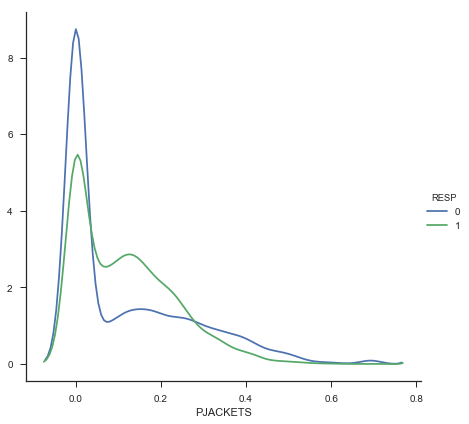

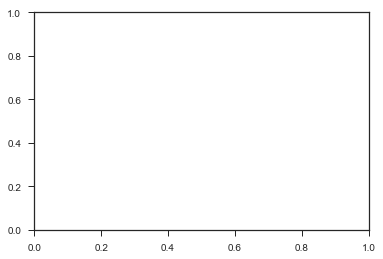

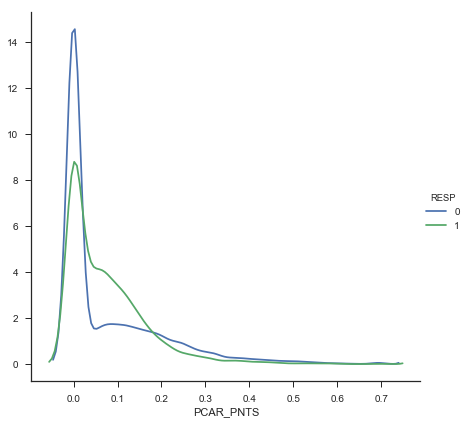

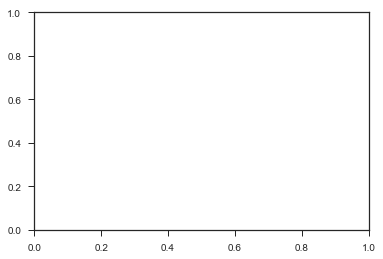

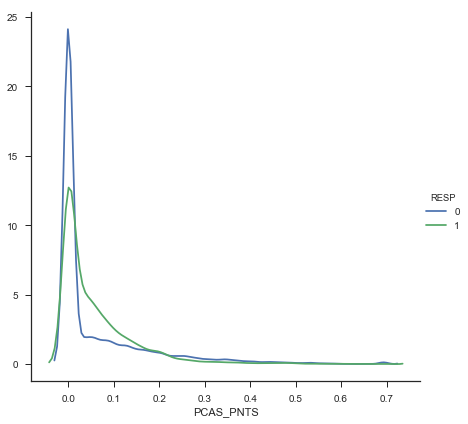

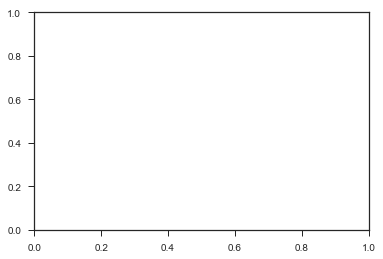

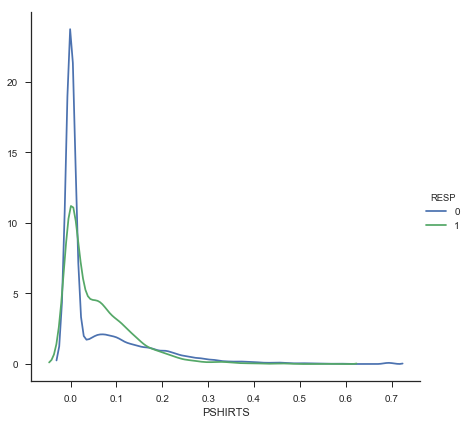

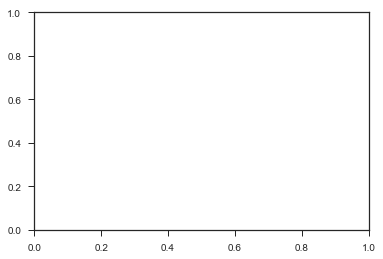

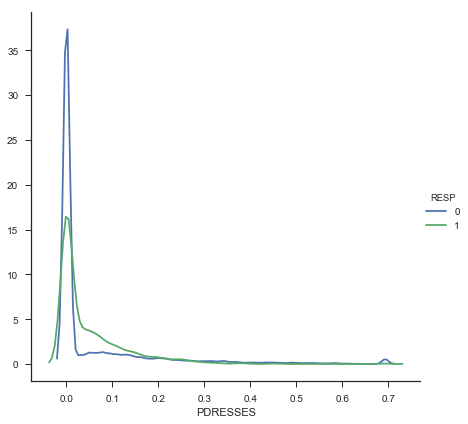

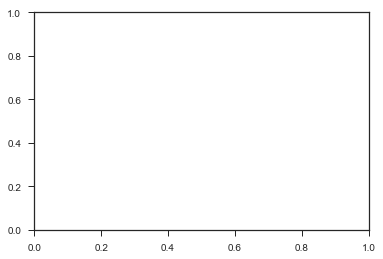

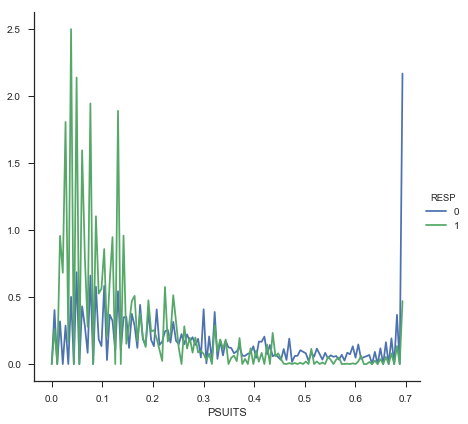

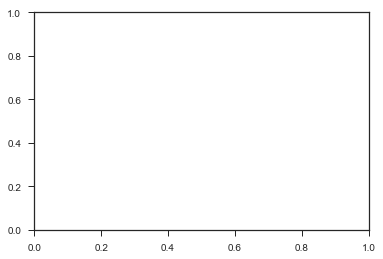

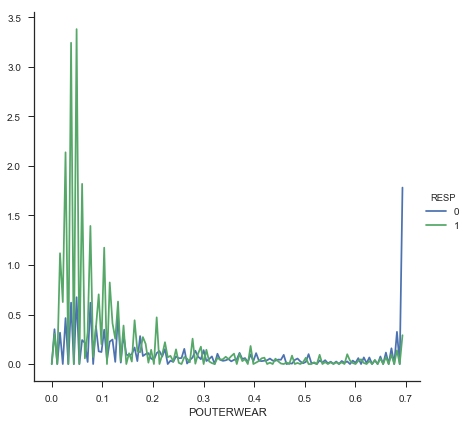

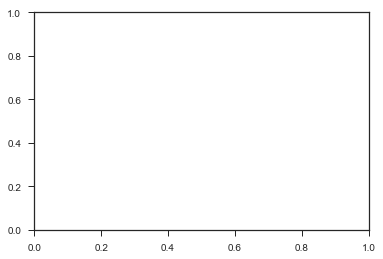

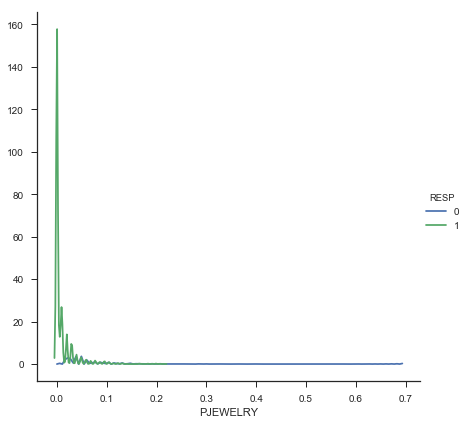

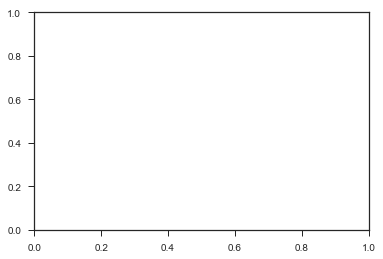

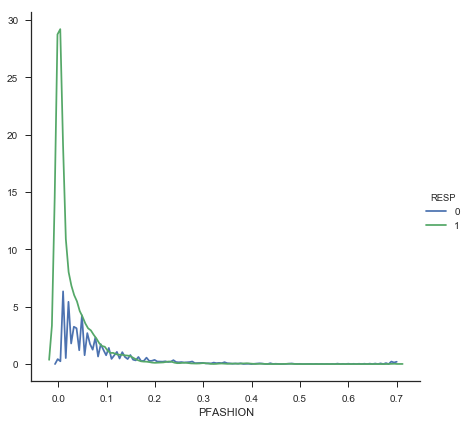

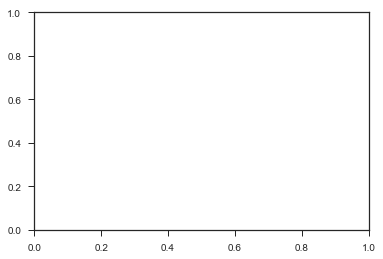

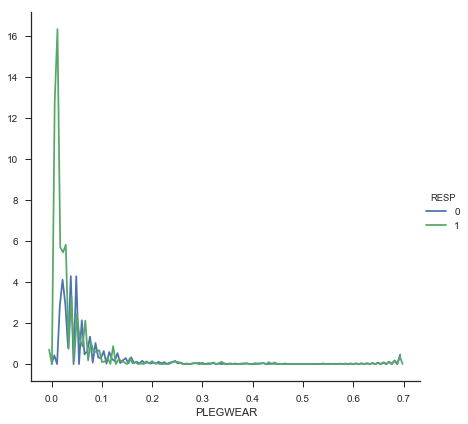

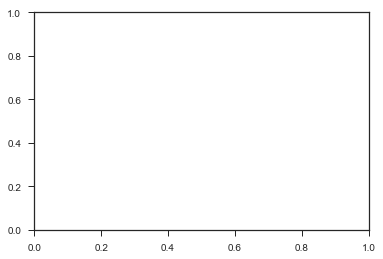

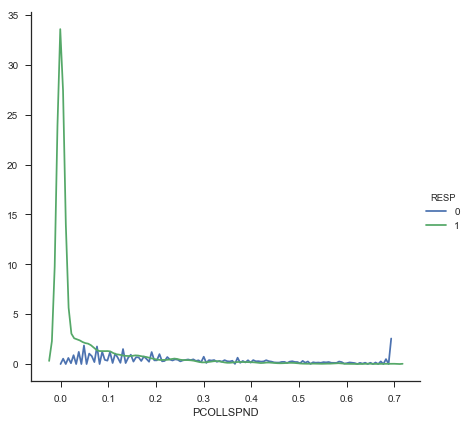

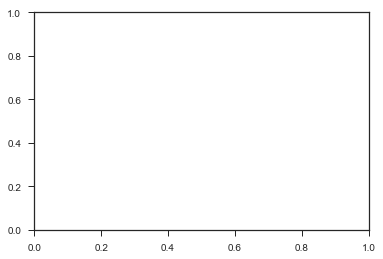

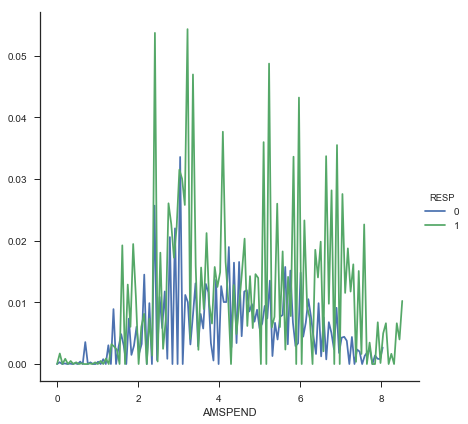

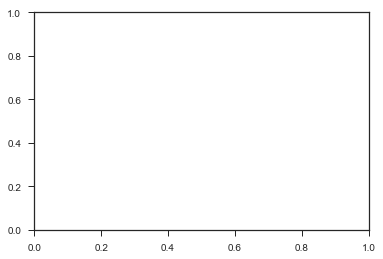

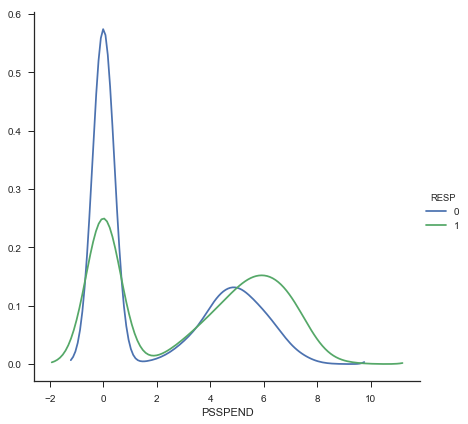

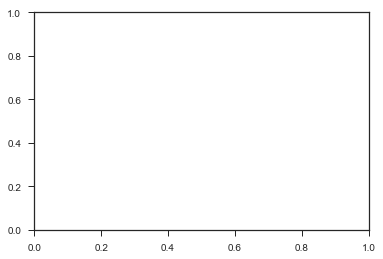

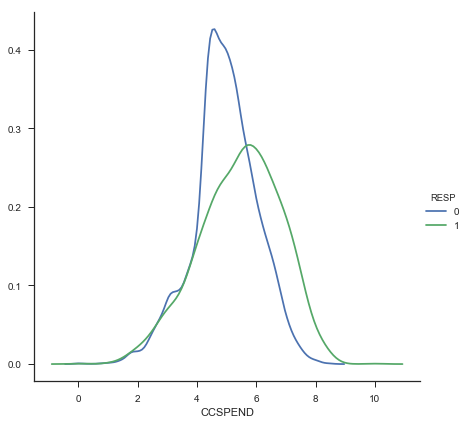

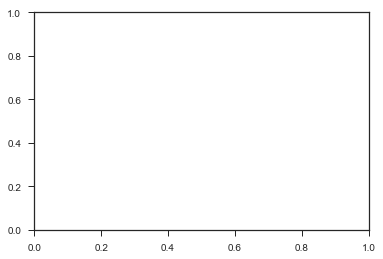

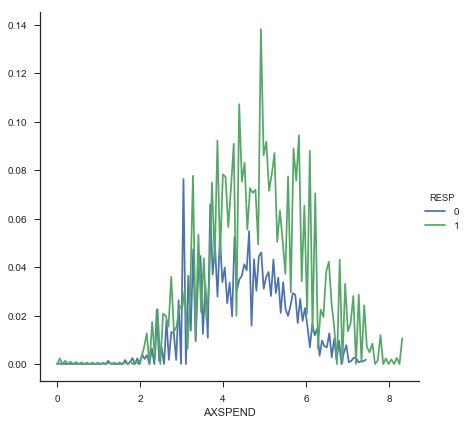

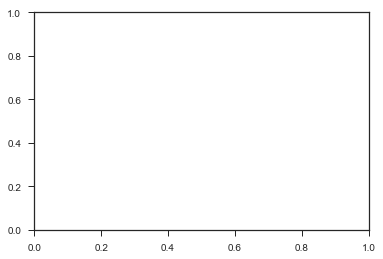

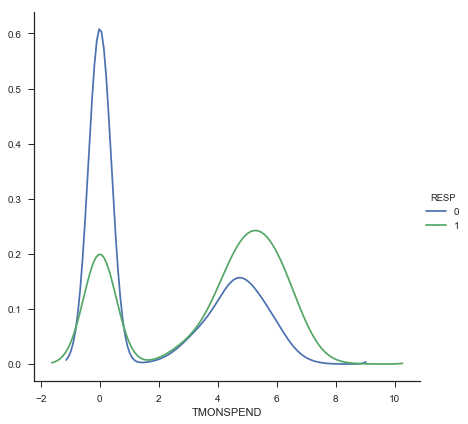

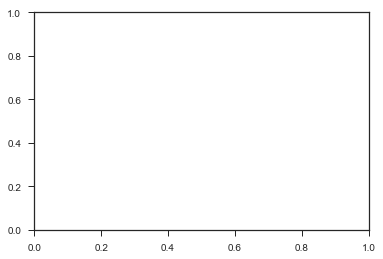

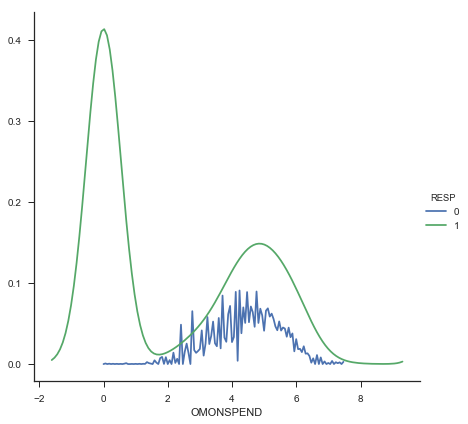

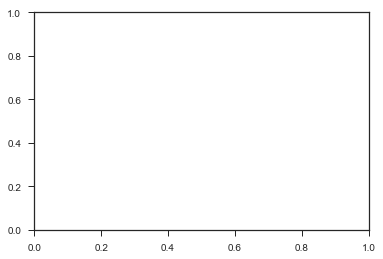

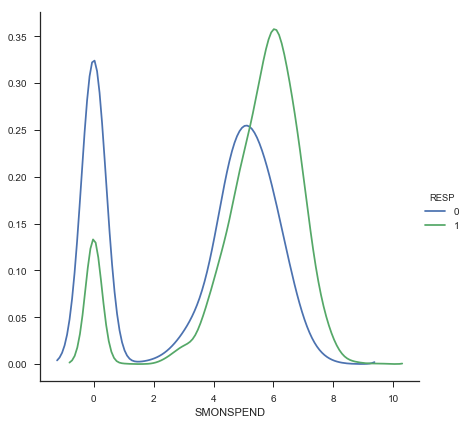

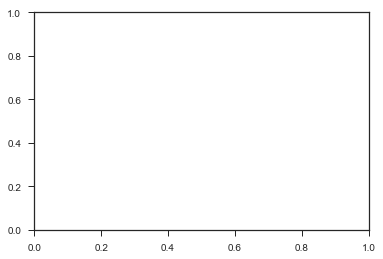

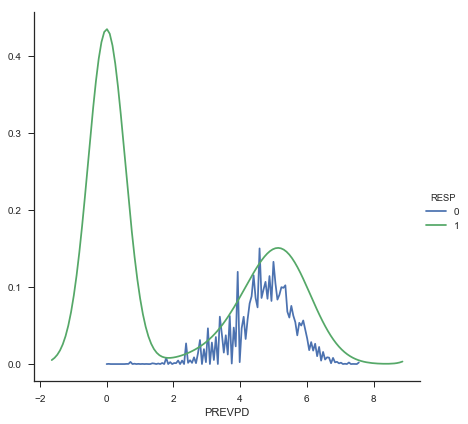

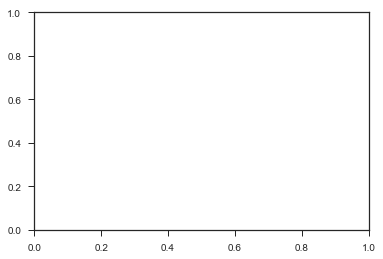

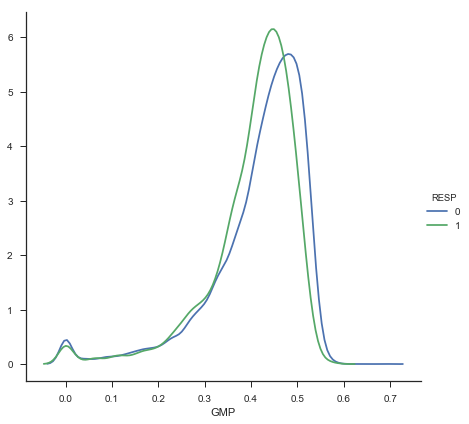

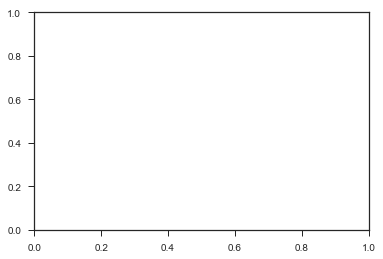

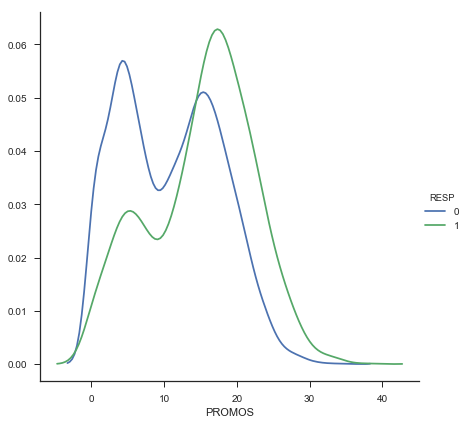

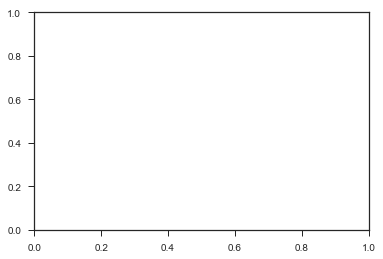

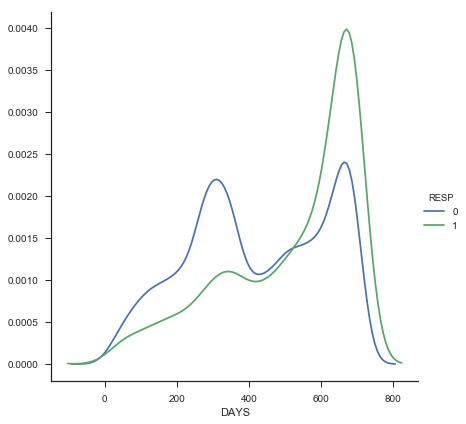

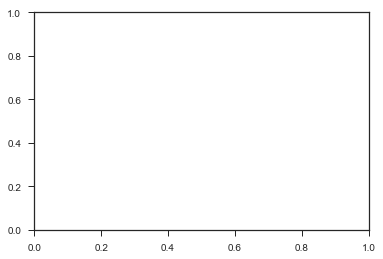

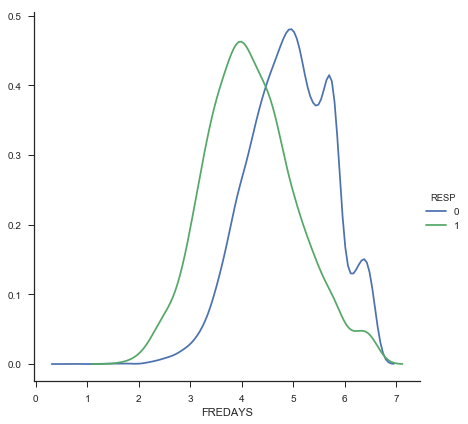

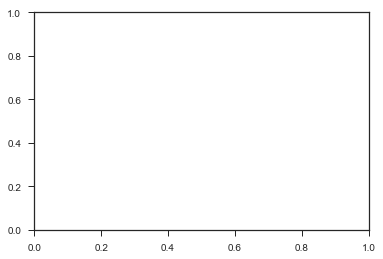

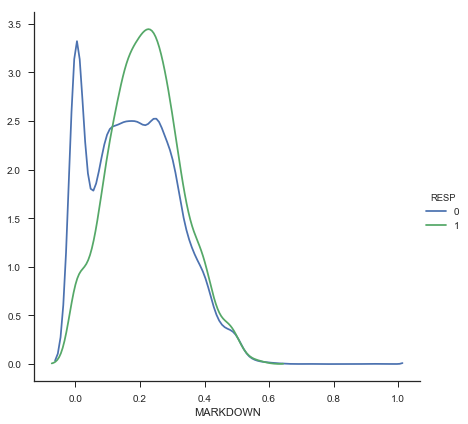

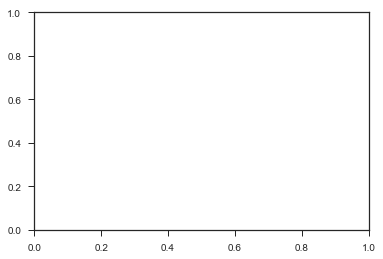

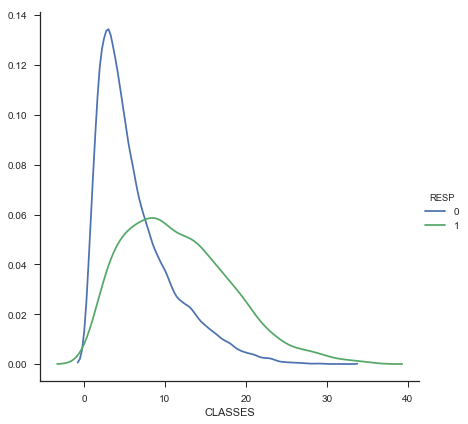

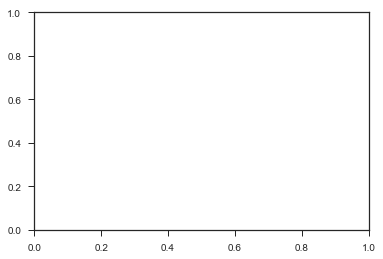

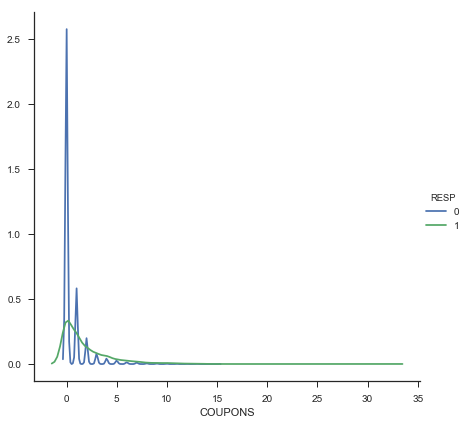

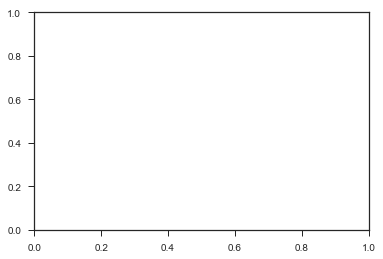

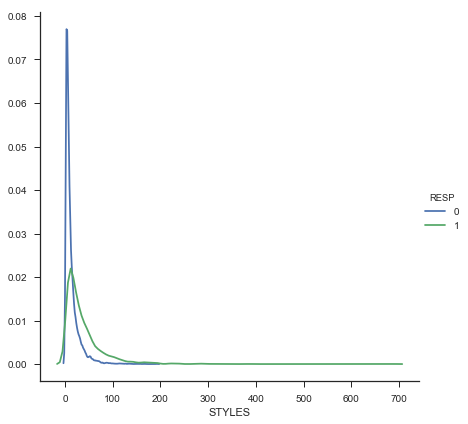

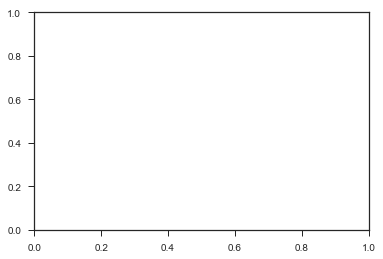

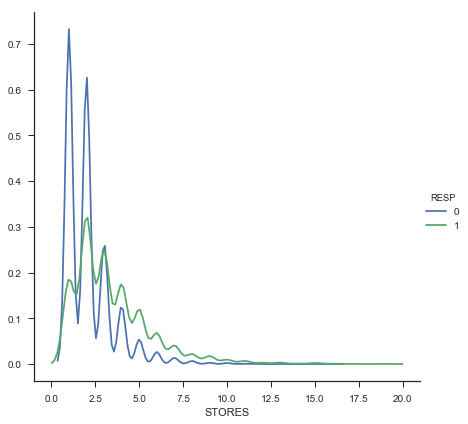

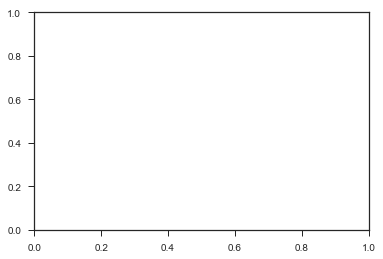

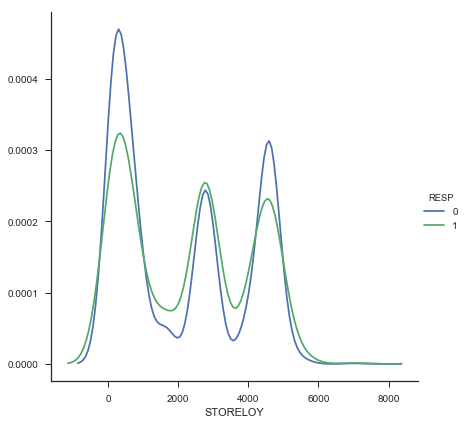

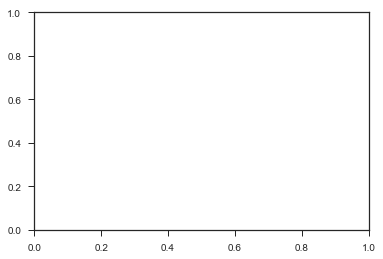

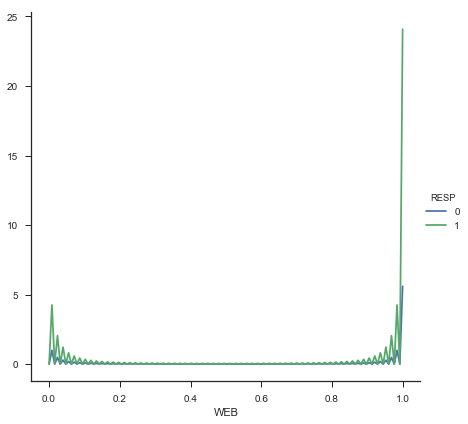

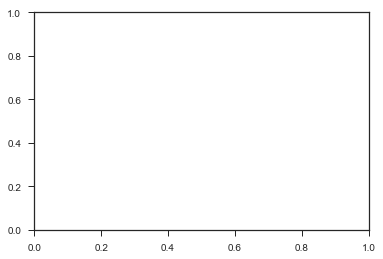

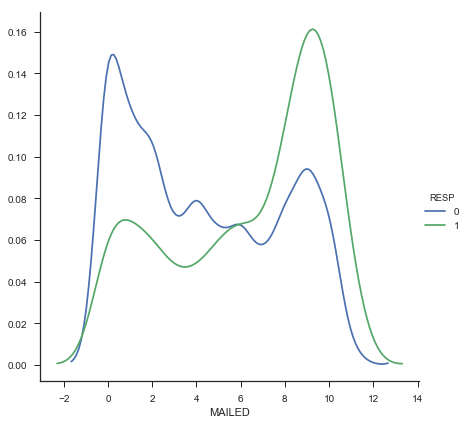

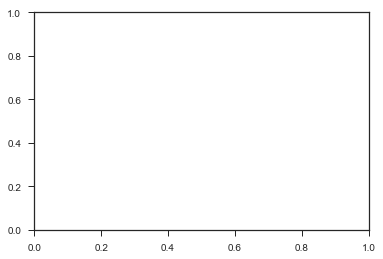

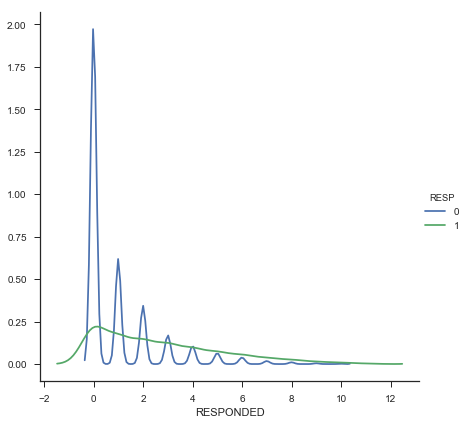

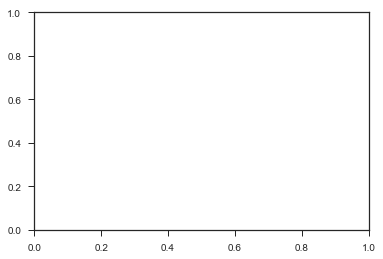

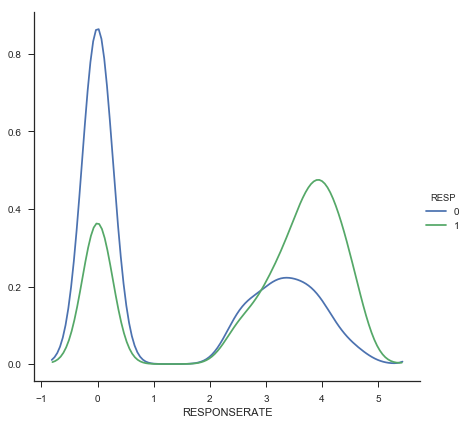

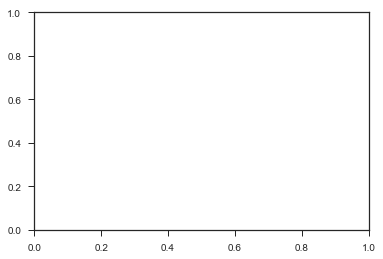

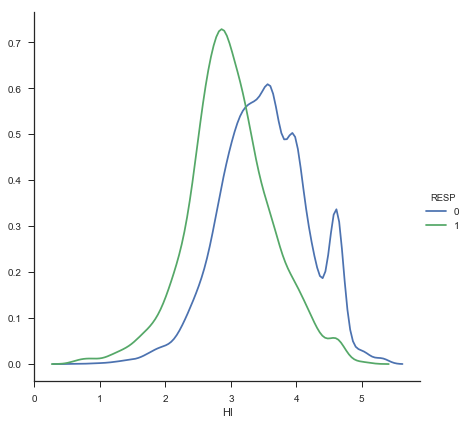

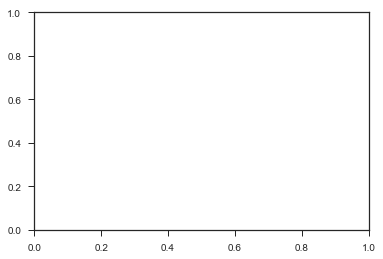

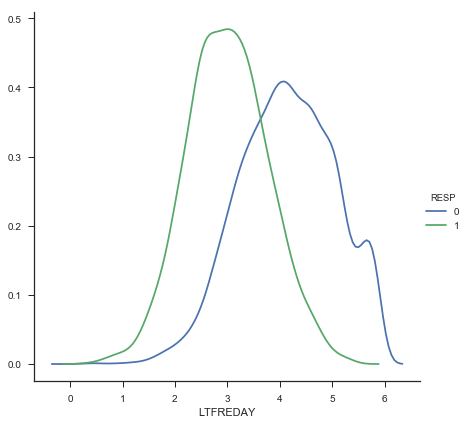

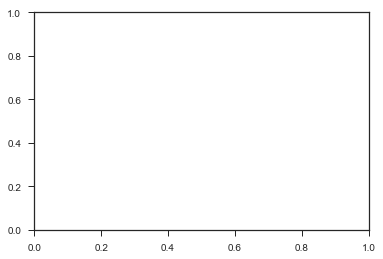

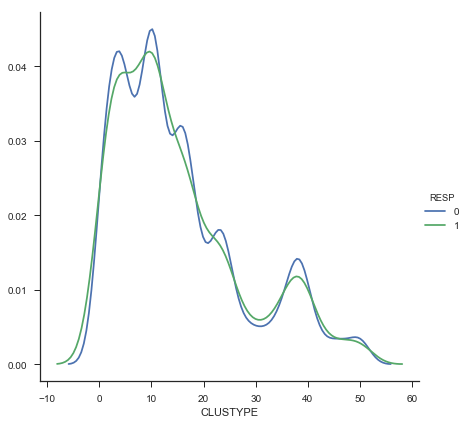

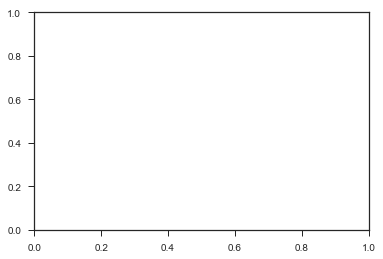

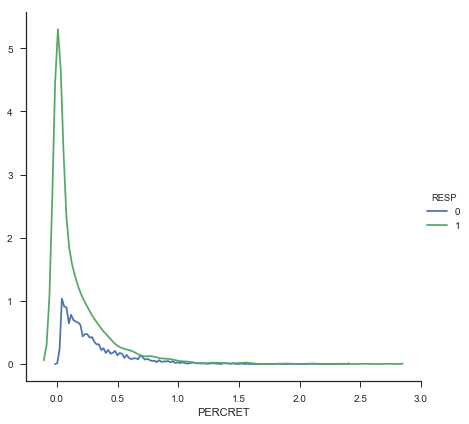

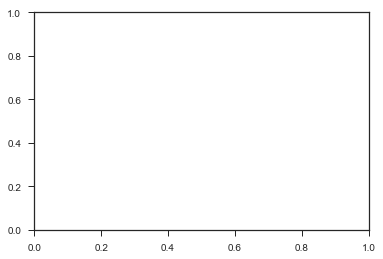

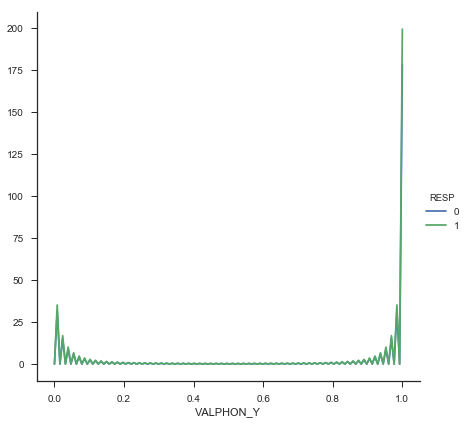

In [19]:
# Create a kdeplot plot for all the predictors
for predictor in predictors:
    fig, ax= plt.subplots()
    sns.FacetGrid(train, hue="RESP", size=6) \
    .map(sns.kdeplot, predictor) \
    .add_legend()
    #ax.set_title('KDE Plot of '+predictor)
    fig.savefig(predictor)

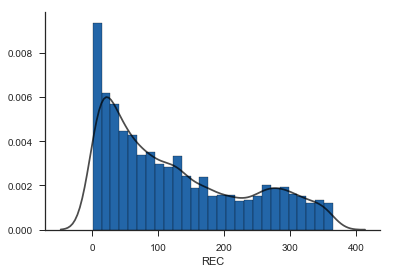

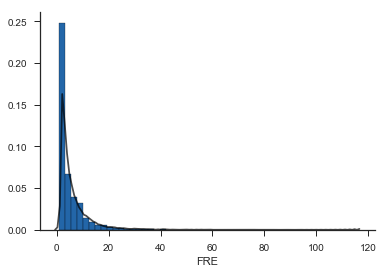

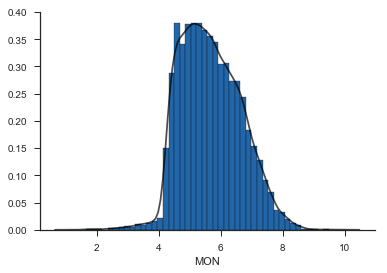

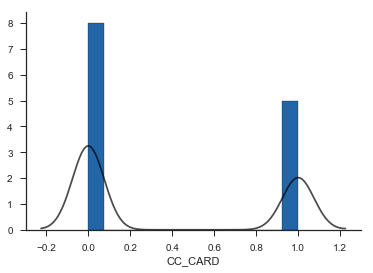

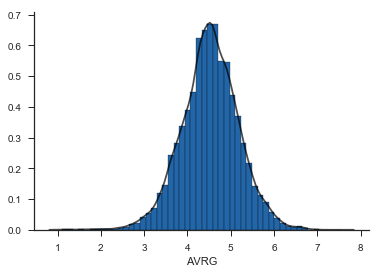

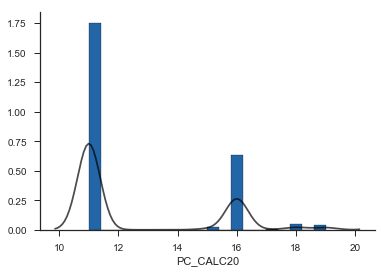

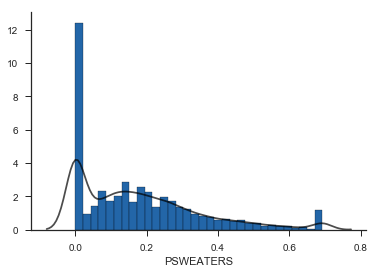

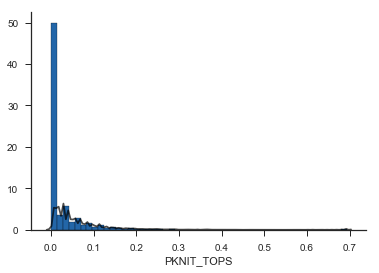

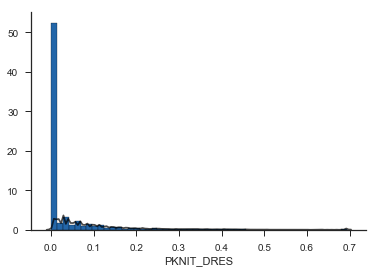

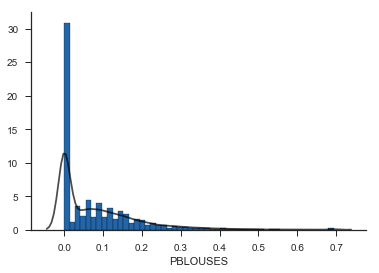

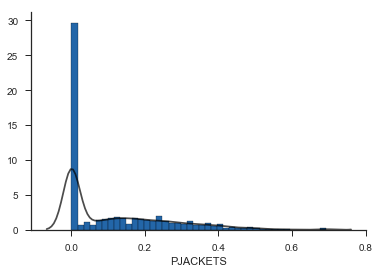

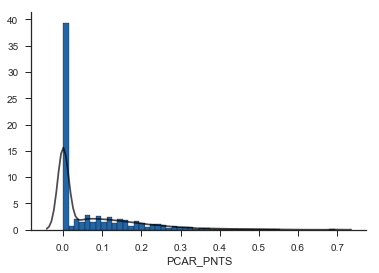

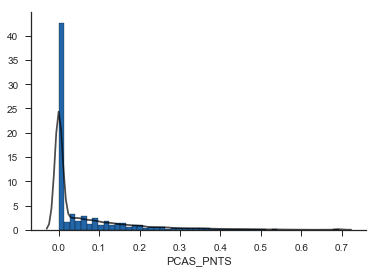

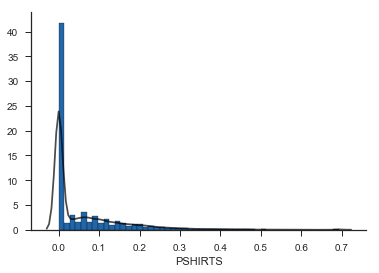

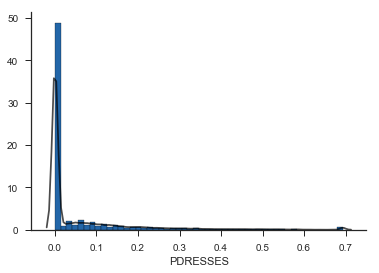

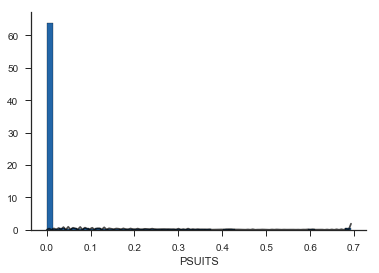

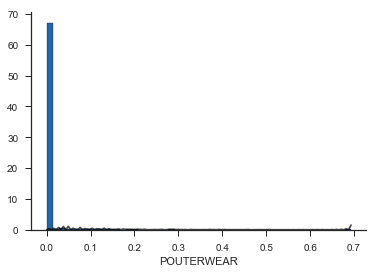

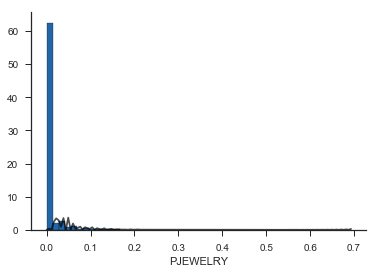

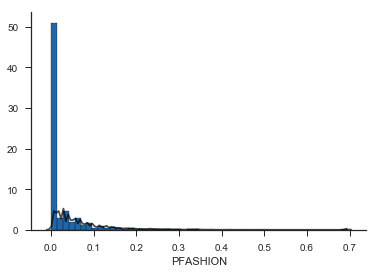

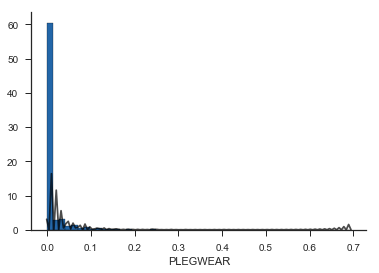

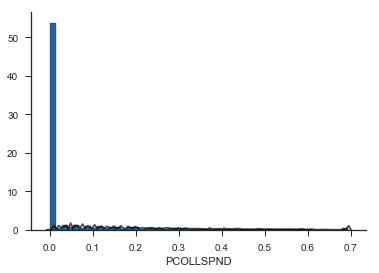

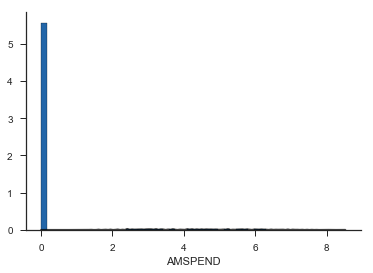

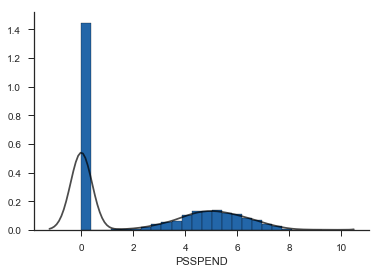

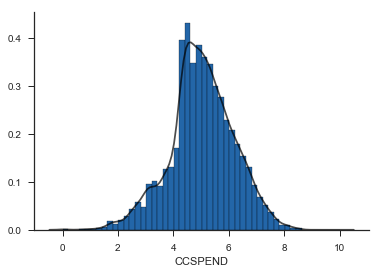

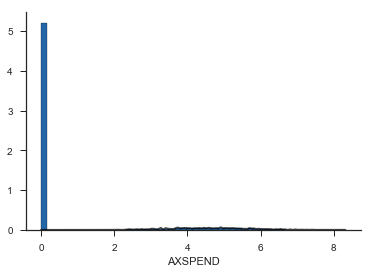

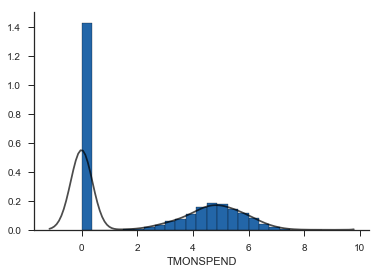

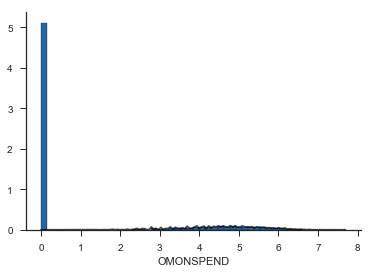

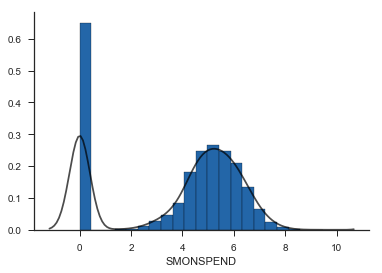

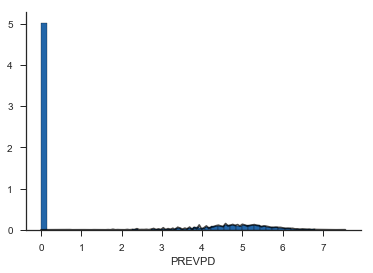

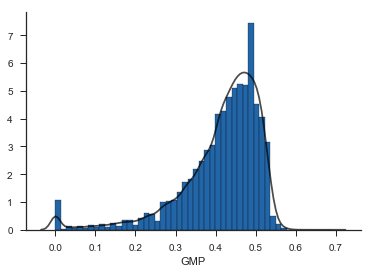

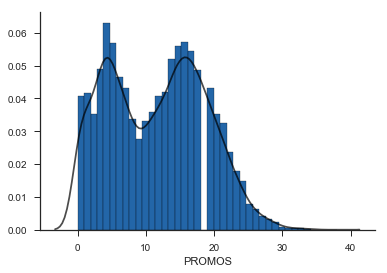

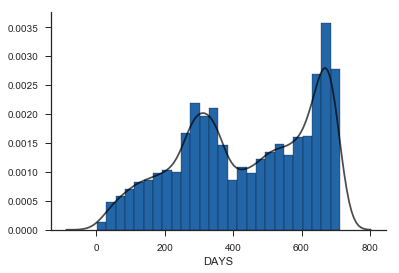

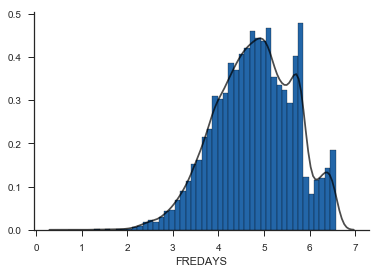

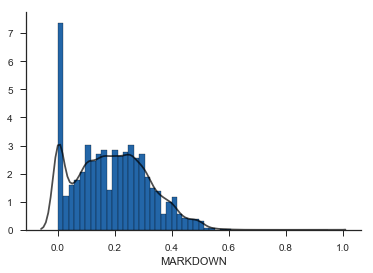

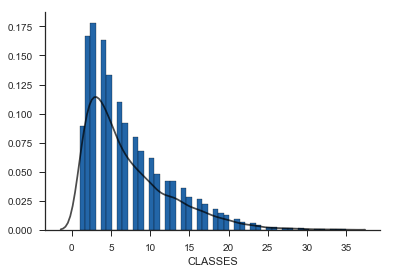

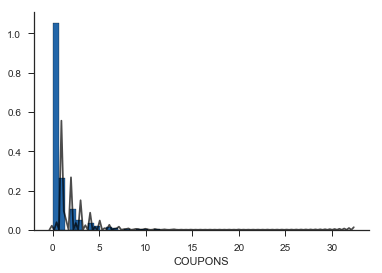

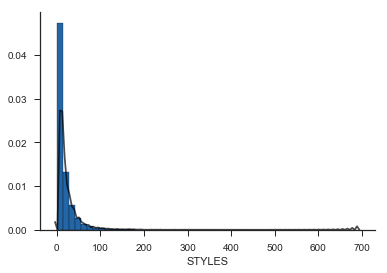

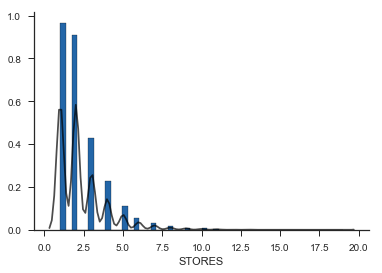

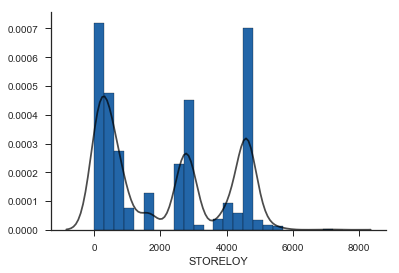

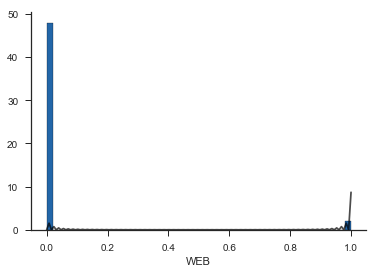

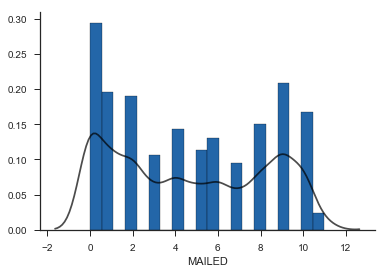

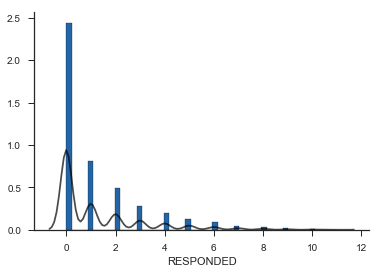

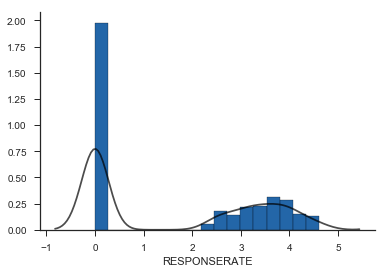

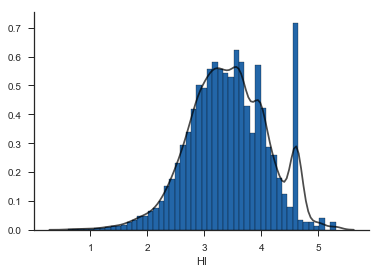

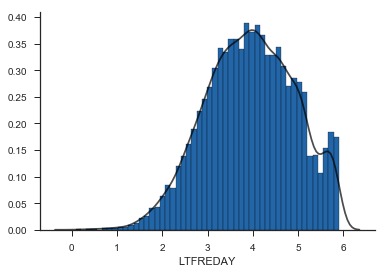

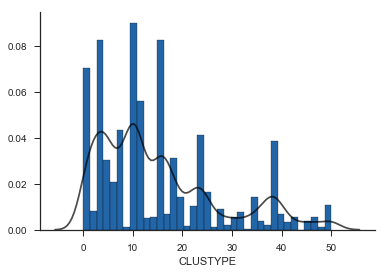

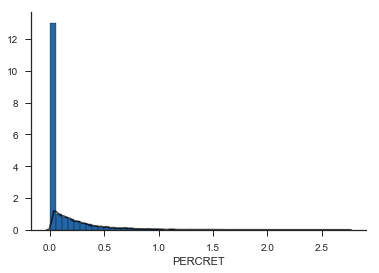

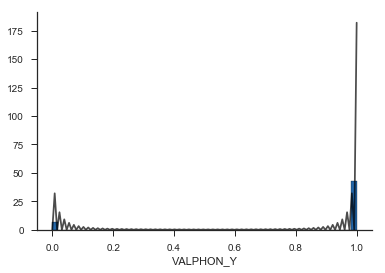

In [20]:
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return fig, ax

for predictor in predictors:
    hist(train[predictor])
    sns.despine()
    plt.show()

##### Description of the above plots after data transformation
Although perfect normality is not obtained, the result is nevertheless
much less skewed than the raw data distribution, allowing for smoother application of several data mining methods and models

## Relationship Between the Predictors and the Response
#### Regression Plots
We look for plots which have a strong relationship between the response and the predictor. Probably list a few here and discuss their interpretation.

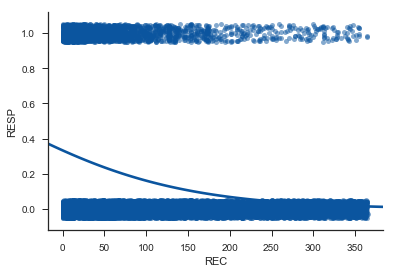

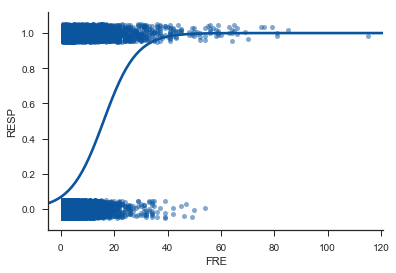

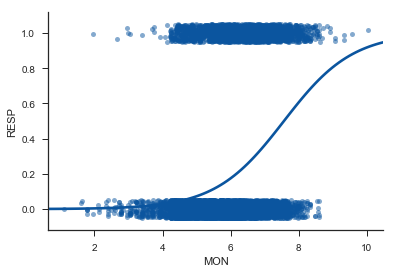

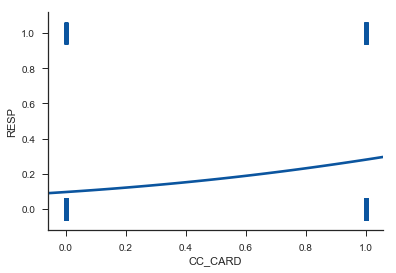

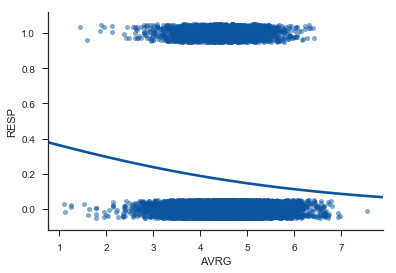

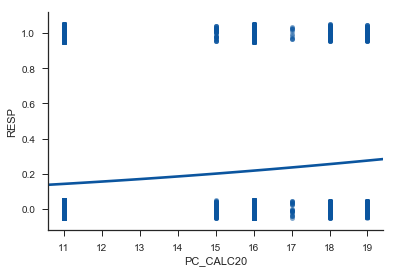

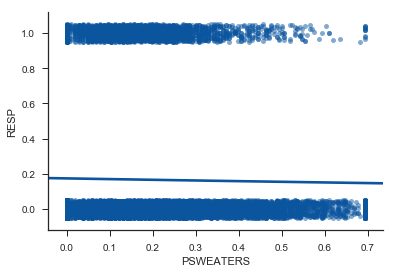

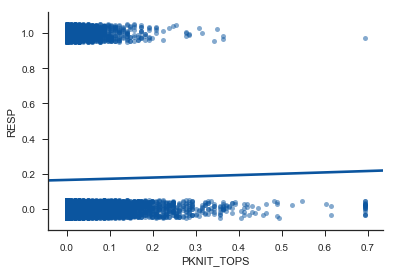

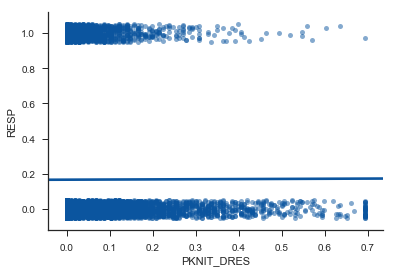

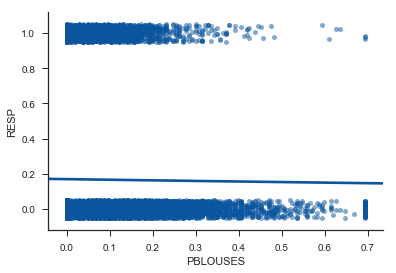

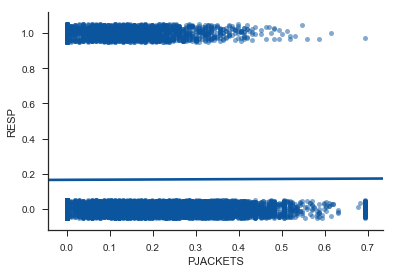

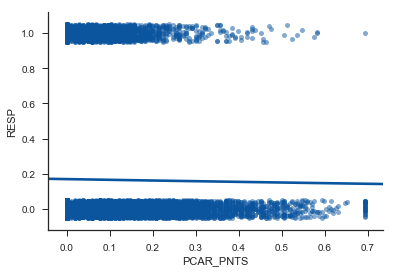

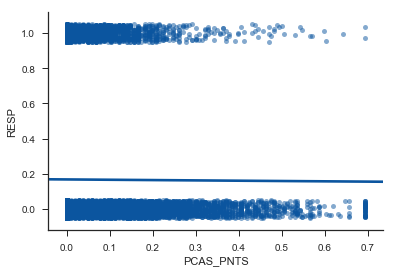

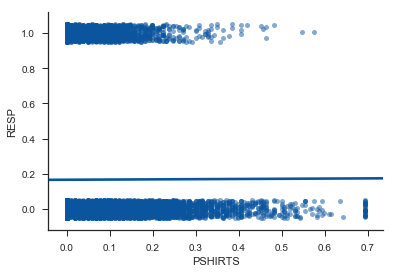

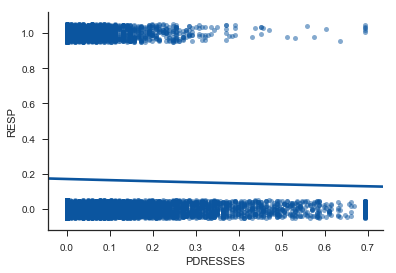

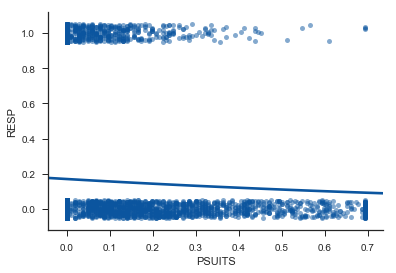

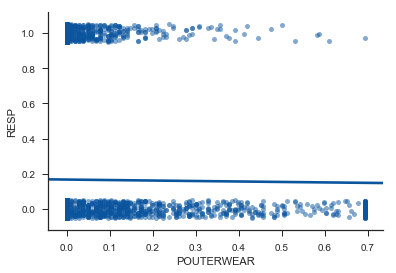

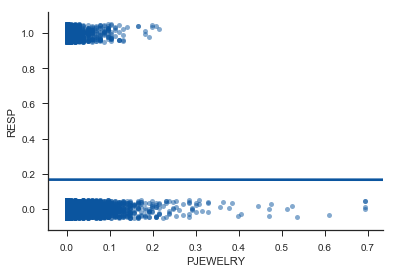

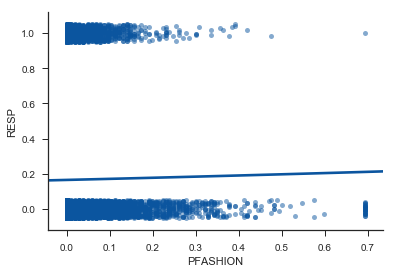

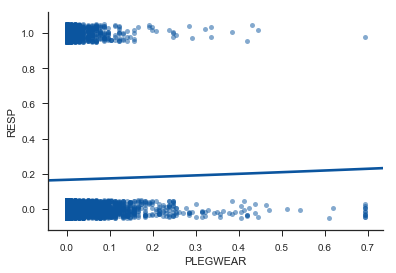

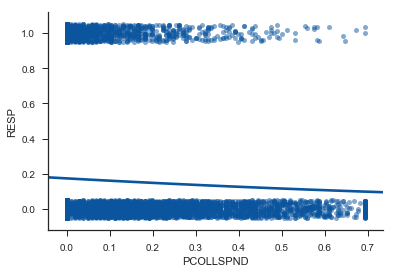

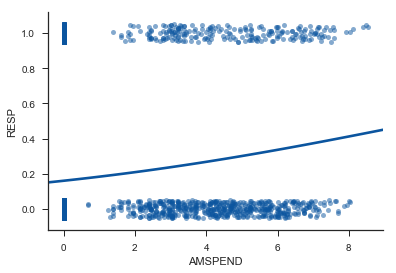

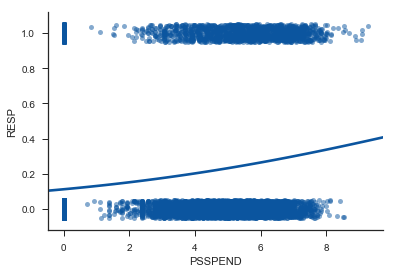

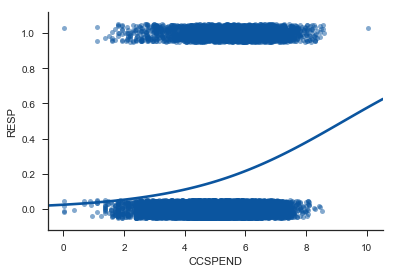

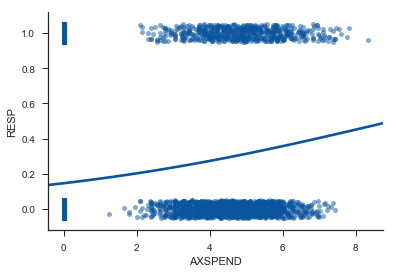

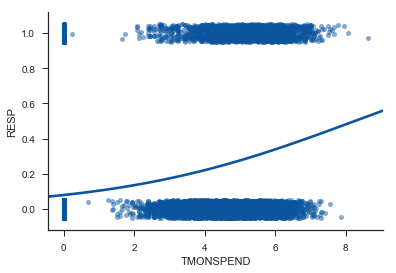

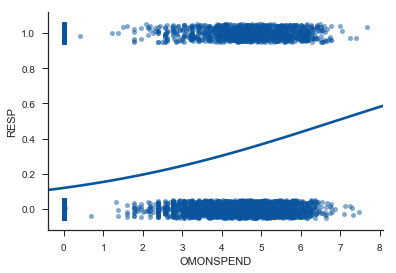

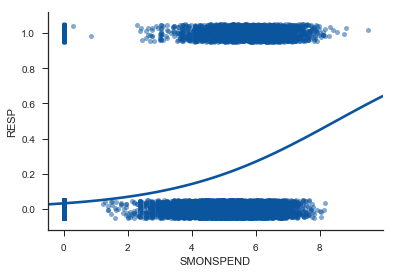

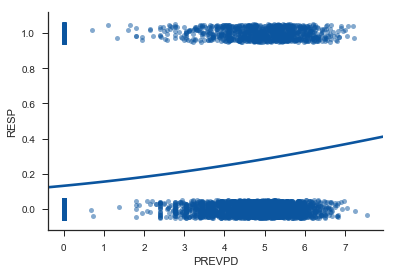

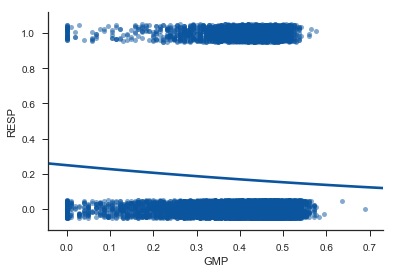

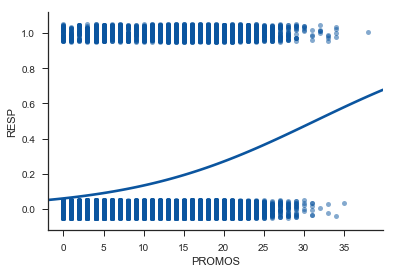

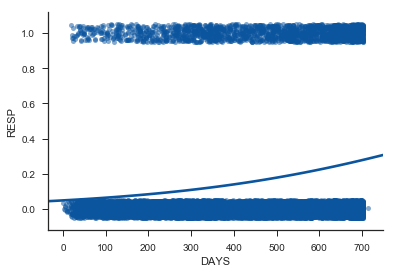

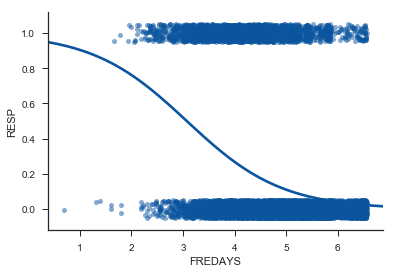

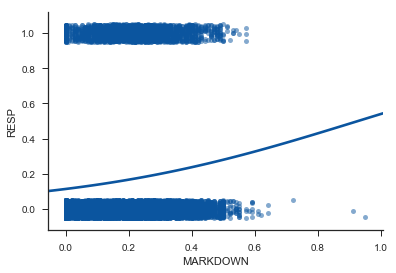

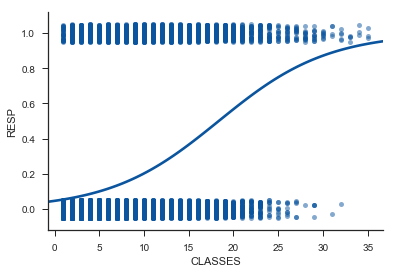

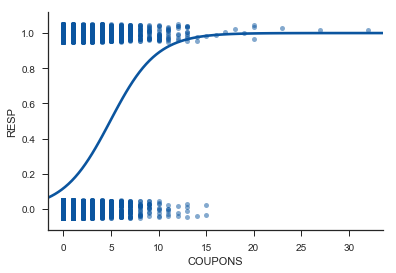

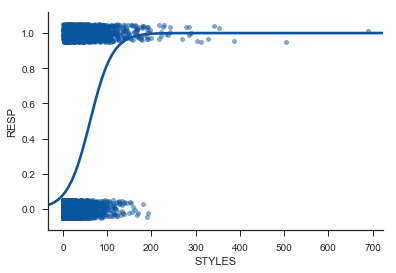

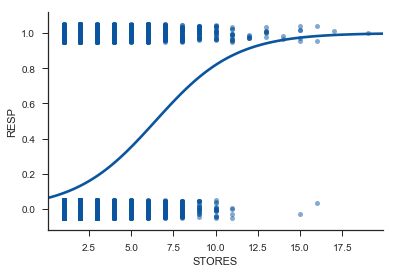

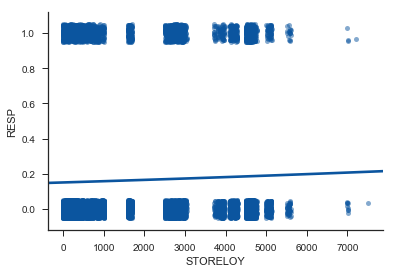

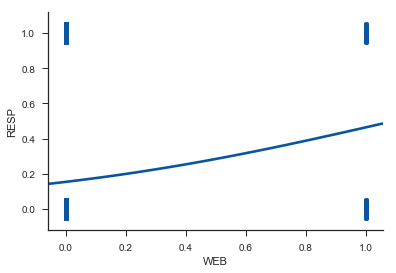

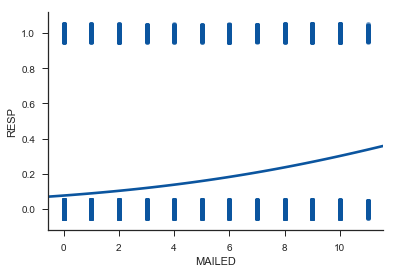

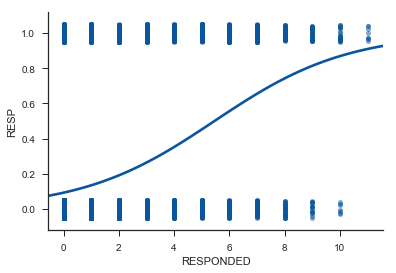

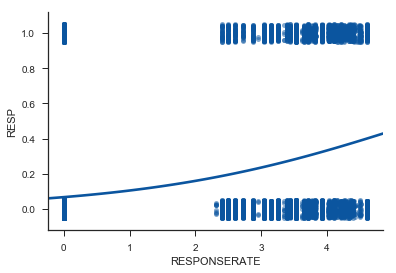

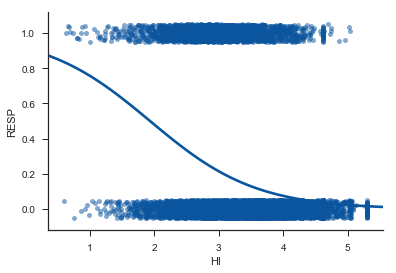

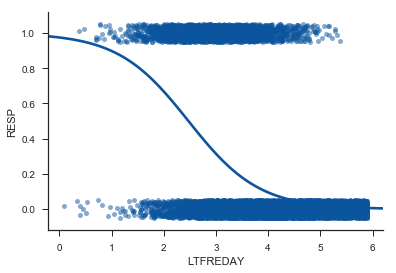

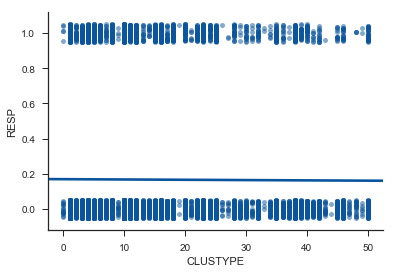

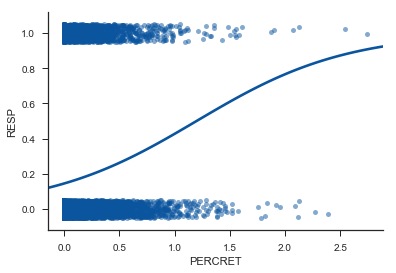

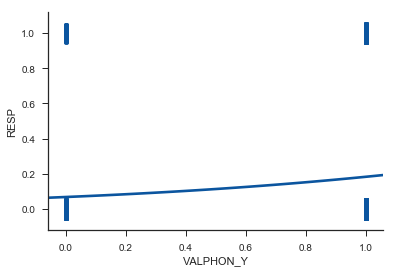

In [21]:
for predictor in predictors:
    fig, ax= plt.subplots()
    sns.regplot(train[predictor], train['RESP'], color=sns.color_palette('Blues')[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues')[-1], 'alpha': .5})
    sns.despine()
    plt.show()
    fig.savefig(predictor)

### Correlation with Response and other Predictors

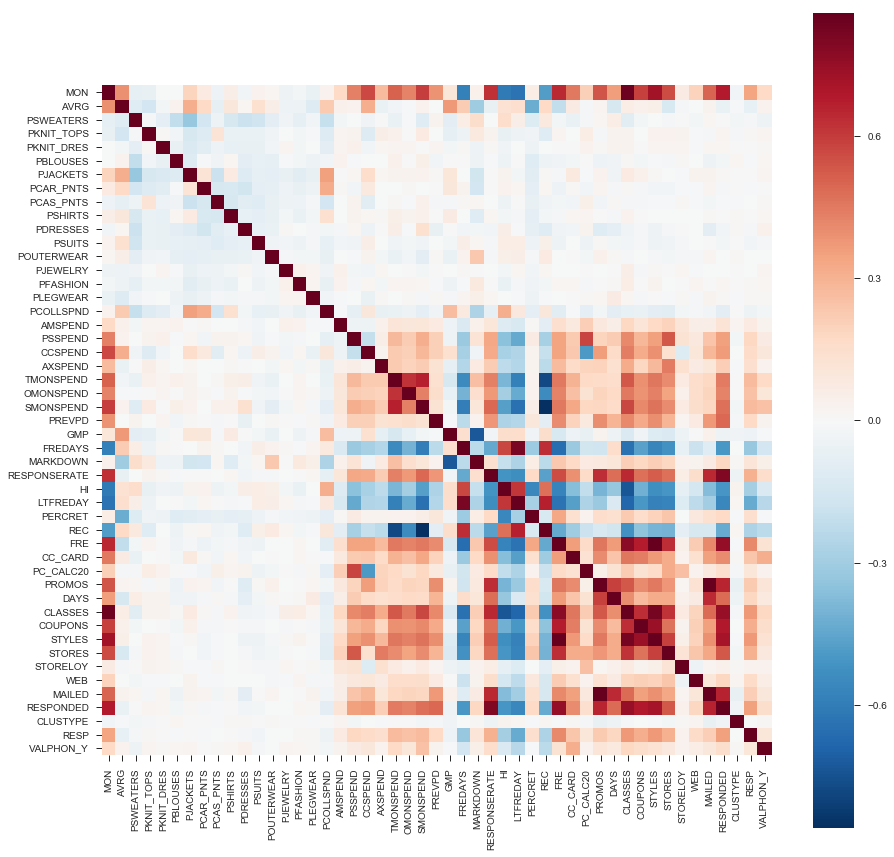

In [22]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True)
f.savefig('CorrelationFull.png')

Have a look at the areas of red cluseters.

Cluster 1:
* CLASSES
* COUPONS
* STYLES
* STORES

Clusers 2:
* MAILED
* RESPONDED

Clusers 3:
* TOMONSPEND
* OMONSPEND
* SMONSPEND

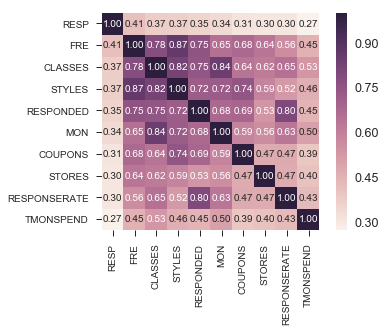

In [23]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
f, ax = plt.subplots()
cols = corrmat.nlargest(k, 'RESP')['RESP'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
f.savefig('Images/EDA/CorrelationSignificant.png')

It is interesting to note that no one predictor is highly correlated with the response variable. Although it is worth a discussion about what the most correlated variables are.

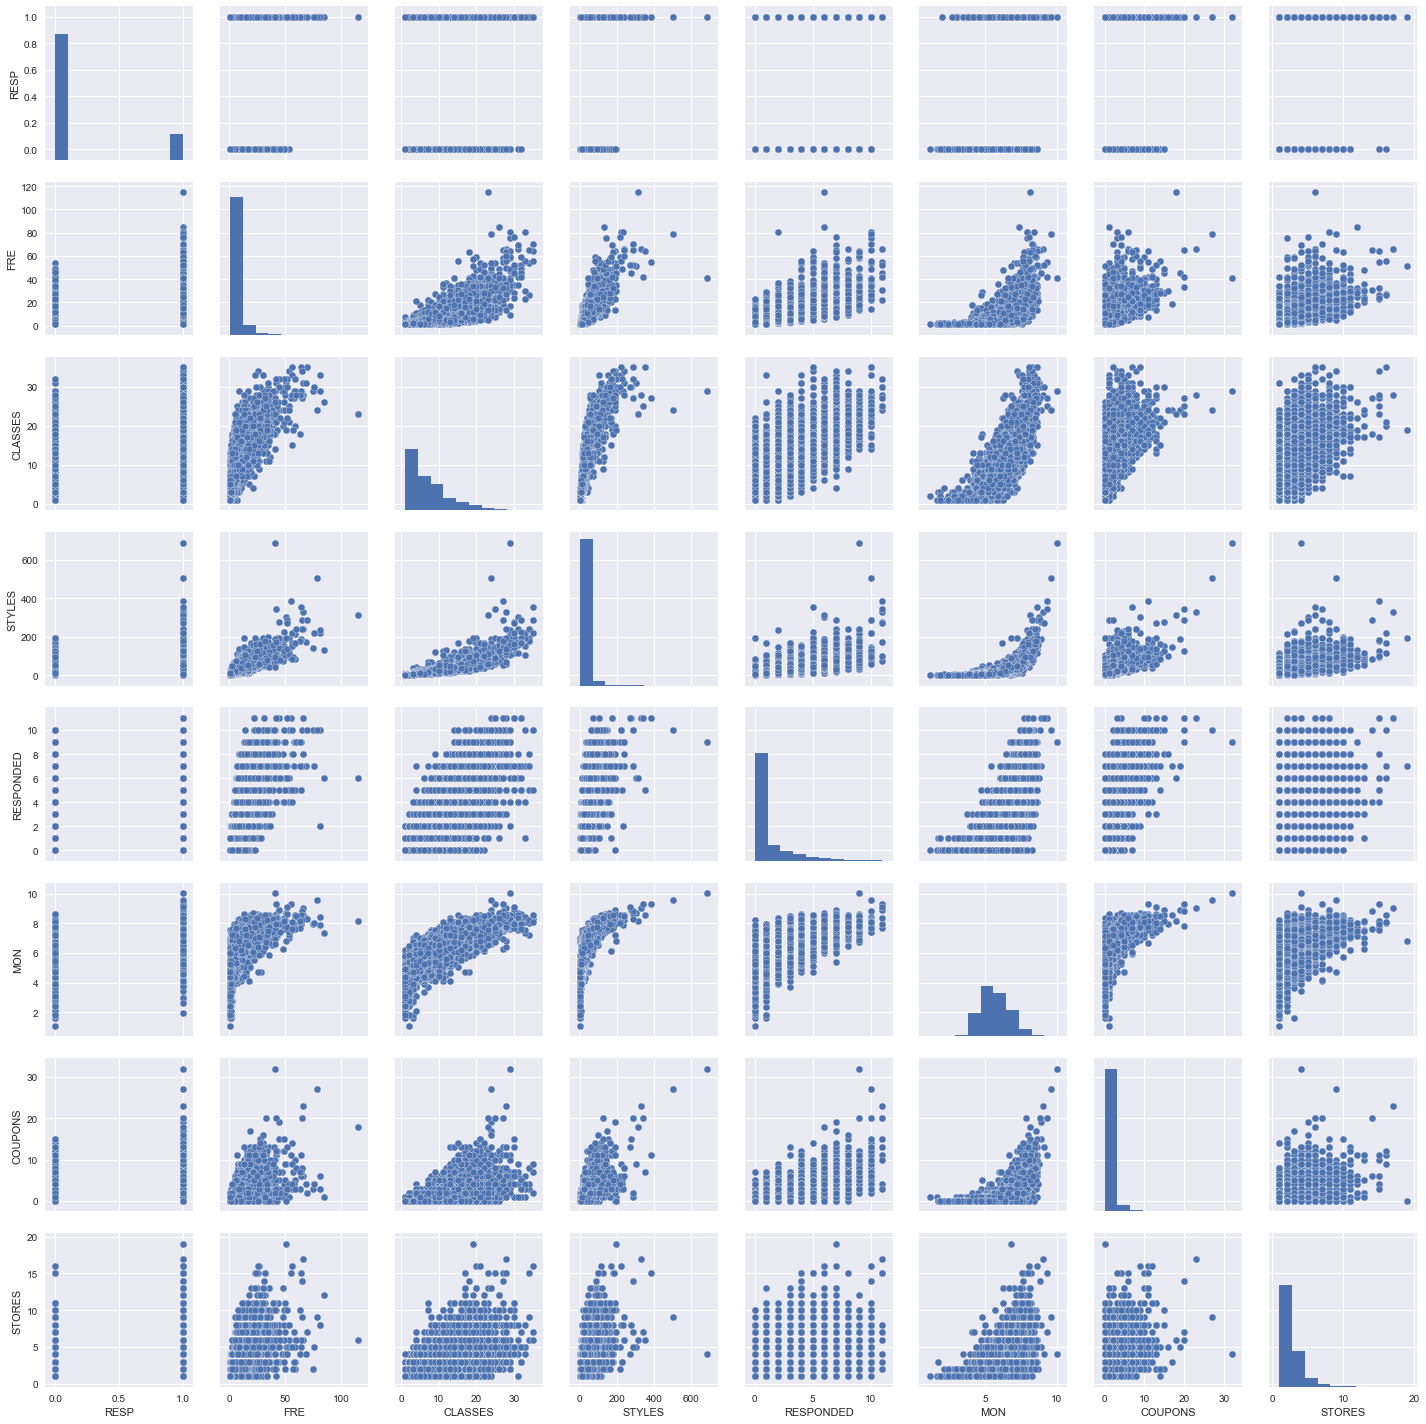

In [24]:
#scatterplot
sns.set()
cols = ['RESP', 'FRE', 'CLASSES', 'STYLES', 'RESPONDED', 'MON', 'COUPONS', 'STORES']
sns_plot = sns.pairplot(train[cols], size = 2.5)
plt.show()
fig = sns_plot.fig
fig.savefig("CorrelationScatter.png")

# Modelling

## Pre-processing

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_context('notebook') 
sns.set_style('ticks')
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import skew

from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns = 999

In [3]:
data = pd.read_csv('Clothing_Store.csv')
data.head(10)

HHKEY  ZIP_CODE  REC  FRE      MON  CC_CARD    AVRG  PC_CALC20  \
0  9955600066402      1001  208    2   368.46        0  184.23         11   
1  9955600073501      1028    6    4   258.00        1   64.50         11   
2  9955600076313      1056  327    2    77.00        0   38.50         11   
3  9955600078045      1118   66    8   846.06        1  105.75         11   
4  9955600078517      1107   49    1    87.44        0   87.44         11   
5  9955600079035      1106   26    2   120.00        0   60.00         11   
6  9955600088723      1118  145    1   782.08        1  782.08         11   
7  9955600089274      1106  356    1    79.00        0   79.00         11   
8  9955600093031      1104  264    1   318.50        0  318.50         11   
9  9955600093053      1104   23   12  1663.46        1  138.62         11   

   PSWEATERS  PKNIT_TOPS  PKNIT_DRES  PBLOUSES  PJACKETS  PCAR_PNTS  \
0       0.18        0.00        0.00      0.30      0.00       0.25   
1       0.26        0.16        0.00      0.00      0.00       0.18   
2       1.00        0.00        0.00      0.00      0.00       0.00   
3       0.38        0.00        0.05      0.06      0.20       0.17   
4       0.20        0.20        0.00      0.00      0.00       0.00   
5       0.00        0.56        0.00      0.00      0.00       0.00   
6       0.12        0.00        0.00      0.00      0.57       0.12   
7       0.00        0.00        0.00      0.00      0.00       0.00   
8       0.24        0.00        0.00      0.00      0.31       0.18   
9       0.25        0.04        0.01      0.06      0.11       0.24   

   PCAS_PNTS  PSHIRTS  PDRESSES  PSUITS  POUTERWEAR  PJEWELRY  PFASHION  \
0       0.00     0.19      0.00     0.0         0.0  0.000000      0.02   
1       0.14     0.00      0.18     0.0         0.0  0.000000      0.00   
2       0.00     0.00      0.00     0.0         0.0  0.000000      0.00   
3       0.00     0.05      0.00     0.0         0.0  0.005307      0.03   
4       0.41     0.00      0.00     0.0         0.0  0.170000      0.00   
5       0.00     0.00      0.00     0.0         0.0  0.020000      0.40   
6       0.00     0.17      0.00     0.0         0.0  0.000000      0.00   
7       1.00     0.00      0.00     0.0         0.0  0.000000      0.00   
8       0.00     0.00      0.26     0.0         0.0  0.000000      0.00   
9       0.03     0.14      0.00     0.0         0.0  0.020000      0.04   

   PLEGWEAR  PCOLLSPND  AMSPEND  PSSPEND  CCSPEND  AXSPEND  TMONSPEND  \
0      0.03       0.29      0.0      0.0   368.46      0.0       0.00   
1      0.02       0.37      0.0      0.0   258.00      0.0     138.00   
2      0.00       0.00      0.0      0.0    77.00      0.0       0.00   
3      0.01       0.00      0.0      0.0   846.06      0.0     104.94   
4      0.00       0.00      0.0      0.0    87.44      0.0      87.44   
5      0.00       0.00      0.0     58.0    62.00      0.0      62.00   
6      0.00       0.00      0.0      0.0   782.08      0.0       0.00   
7      0.00       0.00      0.0      0.0    79.00      0.0       0.00   
8      0.00       0.49      0.0      0.0   318.50      0.0       0.00   
9      0.02       0.00      0.0      0.0   922.36    741.1     536.57   

   OMONSPEND  SMONSPEND  PREVPD   GMP  PROMOS  DAYS  FREDAYS  MARKDOWN  \
0       0.00       0.00    0.00  0.60      17   666   333.00      0.08   
1      55.99     258.00    0.00  0.54      14   696   174.00      0.33   
2       0.00       0.00   39.00  0.62      10   343   171.50      0.11   
3       0.00     373.87  166.25  0.43      24   701    87.62      0.29   
4       0.00      87.44    0.00  0.22       0    49    49.00      0.42   
5      62.00     120.00    0.00  0.47       3   145    72.50      0.41   
6       0.00     782.08    0.00  0.66      15   145   145.00      0.10   
7       0.00       0.00    0.00  0.56       6   447   447.00      0.19   
8       0.00       0.00    0.00  0.68      14   264   264.00      0.07   
9     237.1

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
data = data.drop(['HHKEY'], axis=1)
data = data.drop(['ZIP_CODE'], axis=1)

# Convert to dummy variables
data=pd.get_dummies(data, columns=['VALPHON'], drop_first=True)
data=pd.get_dummies(data, columns=['CC_CARD'], drop_first=True)
data=pd.get_dummies(data, columns=['WEB'], drop_first=True)
data=pd.get_dummies(data, columns=['CLUSTYPE'], drop_first=True)
data.head()

REC  FRE     MON    AVRG  PC_CALC20  PSWEATERS  PKNIT_TOPS  PKNIT_DRES  \
0  208    2  368.46  184.23         11       0.18        0.00        0.00   
1    6    4  258.00   64.50         11       0.26        0.16        0.00   
2  327    2   77.00   38.50         11       1.00        0.00        0.00   
3   66    8  846.06  105.75         11       0.38        0.00        0.05   
4   49    1   87.44   87.44         11       0.20        0.20        0.00   

   PBLOUSES  PJACKETS  PCAR_PNTS  PCAS_PNTS  PSHIRTS  PDRESSES  PSUITS  \
0      0.30       0.0       0.25       0.00     0.19      0.00     0.0   
1      0.00       0.0       0.18       0.14     0.00      0.18     0.0   
2      0.00       0.0       0.00       0.00     0.00      0.00     0.0   
3      0.06       0.2       0.17       0.00     0.05      0.00     0.0   
4      0.00       0.0       0.00       0.41     0.00      0.00     0.0   

   POUTERWEAR  PJEWELRY  PFASHION  PLEGWEAR  PCOLLSPND  AMSPEND  PSSPEND  \
0         0.0  0.000000      0.02      0.03       0.29      0.0      0.0   
1         0.0  0.000000      0.00      0.02       0.37      0.0      0.0   
2         0.0  0.000000      0.00      0.00       0.00      0.0      0.0   
3         0.0  0.005307      0.03      0.01       0.00      0.0      0.0   
4         0.0  0.170000      0.00      0.00       0.00      0.0      0.0   

   CCSPEND  AXSPEND  TMONSPEND  OMONSPEND  SMONSPEND  PREVPD   GMP  PROMOS  \
0   368.46      0.0       0.00       0.00       0.00    0.00  0.60      17   
1   258.00      0.0     138.00      55.99     258.00    0.00  0.54      14   
2    77.00      0.0       0.00       0.00       0.00   39.00  0.62      10   
3   846.06      0.0     104.94       0.00     373.87  166.25  0.43      24   
4    87.44      0.0      87.44       0.00      87.44    0.00  0.22       0   

   DAYS  FREDAYS  MARKDOWN  CLASSES  COUPONS  STYLES  STORES  STORELOY  \
0   666   333.00      0.08        9        1      11       1         7   
1   696   174.00      0.33        6        0      14       1         7   
2   343   171.50      0.11        1        0       2       1         7   
3   701    87.62      0.29       15        3      35       1         7   
4    49    49.00      0.42        4        0       8       1         7   

   MAILED  RESPONDED  RESPONSERATE      HI  LTFREDAY  PERCRET  RESP  \
0       5          0          0.00   31.81    111.00     0.00     0   
1       4          2         50.00   32.72     43.50     0.03     1   
2       4          0          0.00  100.00     68.60     0.00     0   
3       9          6         66.67   23.27     26.96     0.00     0   
4       0          0          0.00   28.52     24.50     0.00     0   

   VALPHON_Y  CC_CARD_1  WEB_1  CLUSTYPE_1  CLUSTYPE_2  CLUSTYPE_3  \
0          0          0      0           0           0           0   
1          1          1      0           0           0           0   
2          0          0      0           0           0           0   
3          1          1      0           0           0           0   
4          1          0      0           0           0           0   

   CLUSTYPE_4  CLUSTYPE_5  CLUSTYPE_6  CLUSTYPE_7  CLUSTYPE_8  CLUSTYPE_9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   CLUSTYPE_10  CLUSTYPE_11  CLUSTYPE_12  CLUSTYPE_13  CLUSTYPE_14  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            0            0            0            0            0   
3            1            0            0            0            0   
4            0            0            0            0          

## Feature Engineering

In [5]:
data.describe()

REC           FRE           MON          AVRG     PC_CALC20  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean     126.966329      5.064213    472.888236    113.889105     12.571803   
std      104.737712      6.420276    640.050799     87.249794      2.461413   
min        1.000000      1.000000      0.990000      0.490000     11.000000   
25%       35.000000      1.000000    135.605000     60.990000     11.000000   
50%       98.000000      3.000000    263.490000     92.070000     11.000000   
75%      206.000000      6.000000    569.000000    139.505000     16.000000   
max      365.000000    115.000000  22511.490000   1919.880000     19.000000   

          PSWEATERS    PKNIT_TOPS    PKNIT_DRES      PBLOUSES      PJACKETS  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean       0.213665      0.027163      0.041295      0.093482      0.135575   
std        0.230224      0.068648      0.109897      0.136428      0.182822   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.160000      0.000000      0.000000      0.050000      0.040000   
75%        0.310000      0.030000      0.030000      0.140000      0.230000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          PCAR_PNTS     PCAS_PNTS       PSHIRTS      PDRESSES        PSUITS  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean       0.086004      0.069286      0.066285      0.068392      0.034135   
std        0.140095      0.132425      0.116869      0.156893      0.130995   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.130000      0.090000      0.100000      0.060000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         POUTERWEAR      PJEWELRY      PFASHION      PLEGWEAR     PCOLLSPND  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean       0.018358      0.009751      0.029787      0.012664      0.072666   
std        0.099710      0.036872      0.078223      0.049601      0.174214   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.030000      0.003524      0.030000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            AMSPEND       PSSPEND       CCSPEND       AXSPEND     TMONSPEND  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean      14.217662    147.822047    286.851738     24.257214     90.008151   
std      149.863657    395.139174    441.460820    113.855957    184.615883   
min        0.000000      0.000000      0.010000      0.000000      0.000000   
25%        0.000000      0.000000     78.000000      0.000000      0.000000   
50%        0.000000      0.000000    147.600000      0.000000      0.000000   
75%        0.000000    127.937500    321.942500      0.000000    109.992500   
max    10642.720000  11476.800000  22511.490000   4099.920000   5562.460000   

          OMONSPEND     SMONSPEND        PREVPD           GMP        PROMOS  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean      31.990516    222.471736     41.668633      0.521913     11.577277   
std       97.163860    362.774251    108.106536      0.142486      7.142376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.460000

### New Spending Variables
Consider the following three variables: (1) amount spent (by customer)
in the last month, (2) amount spent in the last three months, and (3) amount spent in
the last six months. Clearly, the amount spent by the customer in the last month is also
contained in the other two variables, the amount spent in the last three months and
the last six months. Therefore, the amount spent in the last month is getting triple counted.

By “amount spent in previous months 2 and 3” we mean the amount spent in the
period 90 days to 30 days previous. We shall thus use the following three variables:
(1) amount spent in the last month; (2) amount spent in previous months 2 and 3; and
(3) amount spent in previous months 4, 5, and 6. We omit the following variables:
amount spent in the last three months, and amount spent in the last six months.

In [6]:
# Amount spent in previous months 2 and 3
data['SpentM23'] = data['TMONSPEND'] - data['OMONSPEND']
# Amount spent in previous months 4, 5, 6
data['SpentM456'] = data['SMONSPEND'] - data['TMONSPEND']

# Drop the variables of theamount spend in the last 3 months, last 6 months
data = data.drop(['TMONSPEND'], axis=1)
data = data.drop(['SMONSPEND'], axis=1)

In [7]:
data.describe()

REC           FRE           MON          AVRG     PC_CALC20  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean     126.966329      5.064213    472.888236    113.889105     12.571803   
std      104.737712      6.420276    640.050799     87.249794      2.461413   
min        1.000000      1.000000      0.990000      0.490000     11.000000   
25%       35.000000      1.000000    135.605000     60.990000     11.000000   
50%       98.000000      3.000000    263.490000     92.070000     11.000000   
75%      206.000000      6.000000    569.000000    139.505000     16.000000   
max      365.000000    115.000000  22511.490000   1919.880000     19.000000   

          PSWEATERS    PKNIT_TOPS    PKNIT_DRES      PBLOUSES      PJACKETS  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean       0.213665      0.027163      0.041295      0.093482      0.135575   
std        0.230224      0.068648      0.109897      0.136428      0.182822   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.160000      0.000000      0.000000      0.050000      0.040000   
75%        0.310000      0.030000      0.030000      0.140000      0.230000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          PCAR_PNTS     PCAS_PNTS       PSHIRTS      PDRESSES        PSUITS  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean       0.086004      0.069286      0.066285      0.068392      0.034135   
std        0.140095      0.132425      0.116869      0.156893      0.130995   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.130000      0.090000      0.100000      0.060000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         POUTERWEAR      PJEWELRY      PFASHION      PLEGWEAR     PCOLLSPND  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean       0.018358      0.009751      0.029787      0.012664      0.072666   
std        0.099710      0.036872      0.078223      0.049601      0.174214   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.030000      0.003524      0.030000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            AMSPEND       PSSPEND       CCSPEND       AXSPEND     OMONSPEND  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean      14.217662    147.822047    286.851738     24.257214     31.990516   
std      149.863657    395.139174    441.460820    113.855957     97.163860   
min        0.000000      0.000000      0.010000      0.000000      0.000000   
25%        0.000000      0.000000     78.000000      0.000000      0.000000   
50%        0.000000      0.000000    147.600000      0.000000      0.000000   
75%        0.000000    127.937500    321.942500      0.000000      0.000000   
max    10642.720000  11476.800000  22511.490000   4099.920000   2189.000000   

             PREVPD           GMP        PROMOS          DAYS       FREDAYS  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean      41.668633      0.521913     11.577277    437.630405    170.853458   
std      108.106536      0.142486      7.142376    192.901601    146.171562   
min        0.000000      0.000000      0.000000      1.000000      1.000000   
25%        0.000000      0.460000      5.000000    287.000000

If we observe our new variables we notice that the minimum values are in the negative. This is due to there being data errors as we expect the cumulative values for months 3 and 6 to be greater than that of the others. However, this is not the case. We therefore, need to drop all the rows in which this happens. We end up with a smaller, but cleaner, dataset. We need to do this because negative values will mean our data transformations don't work. 

In [8]:
data = data[data.SpentM23 >= 0]
data = data[data.SpentM456 >= 0]

In [9]:
data.describe()

REC           FRE           MON          AVRG     PC_CALC20  \
count  21522.00000  21522.000000  21522.000000  21522.000000  21522.000000   
mean     127.99763      4.982111    470.656482    114.462237     12.567466   
std      104.73806      6.322006    640.018926     87.430748      2.458546   
min        1.00000      1.000000      0.990000      0.490000     11.000000   
25%       36.00000      1.000000    134.970000     61.490000     11.000000   
50%      100.00000      3.000000    261.565000     92.805000     11.000000   
75%      207.00000      6.000000    565.880000    139.990000     16.000000   
max      365.00000    115.000000  22511.490000   1919.880000     19.000000   

          PSWEATERS    PKNIT_TOPS    PKNIT_DRES      PBLOUSES      PJACKETS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.214275      0.027176      0.041387      0.093891      0.135956   
std        0.230902      0.068855      0.110302      0.136924      0.183372   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.160000      0.000000      0.000000      0.050000      0.040000   
75%        0.310000      0.030000      0.020000      0.140000      0.230000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          PCAR_PNTS     PCAS_PNTS       PSHIRTS      PDRESSES        PSUITS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.086245      0.069473      0.066446      0.068568      0.034283   
std        0.140502      0.132827      0.117237      0.157439      0.131538   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.130000      0.090000      0.100000      0.060000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         POUTERWEAR      PJEWELRY      PFASHION      PLEGWEAR     PCOLLSPND  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.018446      0.009774      0.029866      0.012700      0.073016   
std        0.100142      0.036974      0.078522      0.049807      0.174855   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.030000      0.003228      0.030000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            AMSPEND       PSSPEND       CCSPEND       AXSPEND     OMONSPEND  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean      14.245461    147.340231    285.138304     24.176491     31.372742   
std      150.458446    395.326228    440.076411    113.658743     96.608638   
min        0.000000      0.000000      0.010000      0.000000      0.000000   
25%        0.000000      0.000000     78.000000      0.000000      0.000000   
50%        0.000000      0.000000    147.000000      0.000000      0.000000   
75%        0.000000    127.000000    319.657500      0.000000      0.000000   
max    10642.720000  11476.800000  22511.490000   4099.920000   2189.000000   

             PREVPD           GMP        PROMOS          DAYS       FREDAYS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean      41.416665      0.522295     11.539030    436.634002    171.988126   
std      107.877555      0.142626      7.135501    192.848432    146.415435   
min        0.000000      0.000000      0.000000      1.000000      1.000000   
25%        0.000000      0.460000      5.000000    286.000000     67.

We drop 218 data points.

### Higher Order Terms

In [10]:
# Create new features

# 3* Polynomials on the top 7 existing features
data["FRE-s2"] = data["FRE"] ** 2
data["FRE-s3"] = data["FRE"] ** 3
data["FRE-Sq"] = np.sqrt(data["FRE"])

data["CLASSES-s2"] = data["CLASSES"] ** 2
data["CLASSES-s3"] = data["CLASSES"] ** 3
data["CLASSES-Sq"] = np.sqrt(data["CLASSES"])

data["STYLES-s2"] = data["STYLES"] ** 2
data["STYLES-s3"] = data["STYLES"] ** 3
data["STYLES-Sq"] = np.sqrt(data["STYLES"])

data["RESPONDED-s2"] = data["RESPONDED"] ** 2
data["RESPONDED-s3"] = data["RESPONDED"] ** 3
data["RESPONDED-Sq"] = np.sqrt(data["RESPONDED"])

#data["MON-s2"] = data["MON"] ** 2
#data["MON-s3"] = data["MON"] ** 3
data["MON-Sq"] = np.sqrt(data["MON"])

data["COUPONS-s2"] = data["COUPONS"] ** 2
data["COUPONS-s3"] = data["COUPONS"] ** 3
data["COUPONS-Sq"] = np.sqrt(data["COUPONS"])

data["STORES-s2"] = data["STORES"] ** 2
data["STORES-s3"] = data["STORES"] ** 3
data["STORES-Sq"] = np.sqrt(data["STORES"])

In [11]:
data.describe()

REC           FRE           MON          AVRG     PC_CALC20  \
count  21522.00000  21522.000000  21522.000000  21522.000000  21522.000000   
mean     127.99763      4.982111    470.656482    114.462237     12.567466   
std      104.73806      6.322006    640.018926     87.430748      2.458546   
min        1.00000      1.000000      0.990000      0.490000     11.000000   
25%       36.00000      1.000000    134.970000     61.490000     11.000000   
50%      100.00000      3.000000    261.565000     92.805000     11.000000   
75%      207.00000      6.000000    565.880000    139.990000     16.000000   
max      365.00000    115.000000  22511.490000   1919.880000     19.000000   

          PSWEATERS    PKNIT_TOPS    PKNIT_DRES      PBLOUSES      PJACKETS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.214275      0.027176      0.041387      0.093891      0.135956   
std        0.230902      0.068855      0.110302      0.136924      0.183372   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.160000      0.000000      0.000000      0.050000      0.040000   
75%        0.310000      0.030000      0.020000      0.140000      0.230000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          PCAR_PNTS     PCAS_PNTS       PSHIRTS      PDRESSES        PSUITS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.086245      0.069473      0.066446      0.068568      0.034283   
std        0.140502      0.132827      0.117237      0.157439      0.131538   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.130000      0.090000      0.100000      0.060000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         POUTERWEAR      PJEWELRY      PFASHION      PLEGWEAR     PCOLLSPND  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.018446      0.009774      0.029866      0.012700      0.073016   
std        0.100142      0.036974      0.078522      0.049807      0.174855   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.030000      0.003228      0.030000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            AMSPEND       PSSPEND       CCSPEND       AXSPEND     OMONSPEND  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean      14.245461    147.340231    285.138304     24.176491     31.372742   
std      150.458446    395.326228    440.076411    113.658743     96.608638   
min        0.000000      0.000000      0.010000      0.000000      0.000000   
25%        0.000000      0.000000     78.000000      0.000000      0.000000   
50%        0.000000      0.000000    147.000000      0.000000      0.000000   
75%        0.000000    127.000000    319.657500      0.000000      0.000000   
max    10642.720000  11476.800000  22511.490000   4099.920000   2189.000000   

             PREVPD           GMP        PROMOS          DAYS       FREDAYS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean      41.416665      0.522295     11.539030    436.634002    171.988126   
std      107.877555      0.142626      7.135501    192.848432    146.415435   
min        0.000000      0.000000      0.000000      1.000000      1.000000   
25%        0.000000      0.460000      5.000000    286.000000     67.

### Data Transformation

We do a log transformation to make it more normal. Most of the numeric fields are right-skewed. 


In [12]:
# Get only the numerical data
numerical_features = data.select_dtypes(include = ["float64"]).columns
other_features = data.select_dtypes(exclude = ["float64"]).columns
data_num = data[numerical_features]
data_other = data[other_features]

In [13]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# A skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = data_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
data_num[skewed_features] = np.log1p(data_num[skewed_features])

38 skewed numerical features to log transform


In [14]:
# Join categorical and other features
data = pd.concat([data_num, data_other], axis = 1)

In [15]:
data.describe()

MON          AVRG     PSWEATERS    PKNIT_TOPS    PKNIT_DRES  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       5.658356      4.536149      0.178274      0.024987      0.036155   
std        0.964309      0.653677      0.172955      0.057621      0.088544   
min        0.688135      0.398776      0.000000      0.000000      0.000000   
25%        4.912434      4.135007      0.000000      0.000000      0.000000   
50%        5.570499      4.541218      0.148420      0.000000      0.000000   
75%        6.340148      4.948689      0.270027      0.029559      0.019803   
max       10.021826      7.560539      0.693147      0.693147      0.693147   

           PBLOUSES      PJACKETS     PCAR_PNTS     PCAS_PNTS       PSHIRTS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.083107      0.115973      0.075603      0.060813      0.059211   
std        0.110875      0.147280      0.114953      0.107685      0.097363   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.048790      0.039221      0.000000      0.000000      0.000000   
75%        0.131028      0.207014      0.122218      0.086178      0.095310   
max        0.693147      0.693147      0.693147      0.693147      0.693147   

           PDRESSES        PSUITS    POUTERWEAR      PJEWELRY      PFASHION  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.057922      0.027832      0.014902      0.009173      0.027109   
std        0.121926      0.100331      0.075310      0.031877      0.064661   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.058269      0.000000      0.000000      0.000000      0.029559   
max        0.693147      0.693147      0.693147      0.693147      0.693147   

           PLEGWEAR     PCOLLSPND       AMSPEND       PSSPEND       CCSPEND  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.011689      0.060156      0.217517      2.236874      5.020545   
std        0.040627      0.135141      1.022907      2.651025      1.154464   
min        0.000000      0.000000      0.000000      0.000000      0.009950   
25%        0.000000      0.000000      0.000000      0.000000      4.369448   
50%        0.000000      0.000000      0.000000      0.000000      4.997212   
75%        0.003223      0.029559      0.000000      4.852030      5.770374   
max        0.693147      0.693147      9.272725      9.348170     10.021826   

            AXSPEND     OMONSPEND        PREVPD           GMP       FREDAYS  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.608639      0.934763      1.145873      0.415326      4.813771   
std        1.609872      1.899741      2.093750      0.101847      0.857036   
min        0.000000      0.000000      0.000000      0.000000      0.693147   
25%        0.000000      0.000000      0.000000      0.378436      4.230477   
50%        0.000000      0.000000      0.000000      0.438255      4.841506   
75%        0.000000      0.000000      0.000000      0.482426      5.448159   
max        8.318967      7.691657      7.723341      0.688135      6.570883   

           MARKDOWN  RESPONSERATE            HI      LTFREDAY       PERCRET  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.186873      1.584059      3.439466      3.964834      0.087472   
std        0.129365      1.773780      0.683081      0.979562      0.202233   
min        0.000000      0.000000      0.048790      0.086178      0.000000   
25%        0.090000      0.000000      2.976040      3.268047

#### Box Cox Transformation
This is an alternative to the log1p transformation. Try this one out to see if it actually works or not.

In [256]:
numerical_features = data.select_dtypes(include = ["float64"]).columns

# Check the skew of all numerical features
skewed_feats = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)




Skew in numerical features: 



Skew
PERCRET     38.864382
AMSPEND     28.555361
PLEGWEAR    10.809064
AXSPEND     10.560910
CCSPEND     10.168763
PJEWELRY    10.167263
PSSPEND      8.574872
POUTERWEAR   7.343306
MON          6.937464
PKNIT_TOPS   6.168640
SpentM456    5.931646
PFASHION     5.927768
OMONSPEND    5.785868
SpentM23     5.432336
PSUITS       4.997481
PREVPD       4.650101
PKNIT_DRES   4.509159
AVRG         3.510565
PDRESSES     3.491368
PCOLLSPND    3.058098

In [257]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 39 skewed numerical features to Box Cox transform


#### Square Root Transformation
We can also try the sqrt transformation to see if this works

In [148]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# A skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = data_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to sqrt transform")
skewed_features = skewness.index
data_num[skewed_features] = np.sqrt(data_num[skewed_features])

38 skewed numerical features to log transform


### Splitting the Data
This is not feature engineering. But we need to first do this before standardising the data.

In [16]:
# Using the random state as an SID - this is the test data
train_validate = data.sample(frac=0.8, random_state=440246200)
test = data[data.index.isin(train_validate.index)==False].copy()

# Get the validation set
train = train_validate.sample(frac=0.8, random_state=440246200)
validate = train_validate[train_validate.index.isin(train.index)==False].copy()



In [17]:
test.describe()

MON         AVRG    PSWEATERS   PKNIT_TOPS   PKNIT_DRES  \
count  4304.000000  4304.000000  4304.000000  4304.000000  4304.000000   
mean      5.661996     4.543067     0.181190     0.025471     0.035761   
std       0.959200     0.649568     0.173741     0.059599     0.089958   
min       1.609438     1.523880     0.000000     0.000000     0.000000   
25%       4.925803     4.132242     0.000000     0.000000     0.000000   
50%       5.549076     4.548494     0.148420     0.000000     0.000000   
75%       6.325796     4.966213     0.270027     0.029559     0.019803   
max      10.021826     7.355967     0.693147     0.693147     0.693147   

          PBLOUSES     PJACKETS    PCAR_PNTS    PCAS_PNTS      PSHIRTS  \
count  4304.000000  4304.000000  4304.000000  4304.000000  4304.000000   
mean      0.081949     0.114458     0.076536     0.061634     0.058486   
std       0.107744     0.145080     0.116891     0.110092     0.096877   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.048790     0.039221     0.000000     0.000000     0.000000   
75%       0.131028     0.207014     0.131028     0.086178     0.086178   
max       0.693147     0.693147     0.693147     0.693147     0.693147   

          PDRESSES       PSUITS   POUTERWEAR     PJEWELRY     PFASHION  \
count  4304.000000  4304.000000  4304.000000  4304.000000  4304.000000   
mean      0.058153     0.027254     0.014801     0.008953     0.026327   
std       0.121204     0.097654     0.074962     0.027353     0.057963   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.067659     0.000000     0.000000     0.000000     0.029559   
max       0.693147     0.693147     0.693147     0.314811     0.693147   

          PLEGWEAR    PCOLLSPND      AMSPEND      PSSPEND      CCSPEND  \
count  4304.000000  4304.000000  4304.000000  4304.000000  4304.000000   
mean      0.011687     0.062060     0.208615     2.322506     5.009541   
std       0.041953     0.136880     0.979902     2.662391     1.161224   
min       0.000000     0.000000     0.000000     0.000000     0.009950   
25%       0.000000     0.000000     0.000000     0.000000     4.369068   
50%       0.000000     0.000000     0.000000     0.000000     4.997955   
75%       0.001537     0.029559     0.000000     4.897504     5.735628   
max       0.693147     0.693147     7.924973     8.486893    10.021826   

           AXSPEND    OMONSPEND       PREVPD          GMP      FREDAYS  \
count  4304.000000  4304.000000  4304.000000  4304.000000  4304.000000   
mean      0.629555     0.917601     1.154772     0.415961     4.810307   
std       1.629953     1.894543     2.108690     0.101266     0.853763   
min       0.000000     0.000000     0.000000     0.000000     1.386294   
25%       0.000000     0.000000     0.000000     0.378436     4.234107   
50%       0.000000     0.000000     0.000000     0.438255     4.828314   
75%       0.000000     0.000000     0.000000     0.482426     5.444202   
max       8.318967     7.691657     7.222931     0.636577     6.555357   

          MARKDOWN  RESPONSERATE           HI     LTFREDAY      PERCRET  \
count  4304.000000   4304.000000  4304.000000  4304.000000  4304.000000   
mean      0.185885      1.579707     3.437480     3.955371     0.086347   
std       0.128333      1.774310     0.680935     0.980987     0.196610   
min       0.000000      0.000000     0.364643     0.086178     0.000000   
25%       0.090000      0.000000     2.969902     3.269949     0.000000   
50%       0.180000      0.000000     3.428002     3.971612     0.000000   
75%       0.280000      3.386760     3.935202     4.675908     0.076961   
max       0.910000      4.615121     5.303305     5.899897     2.157559   

    

In [18]:
response = 'RESP'
exclude = response  # list of variables who are NOT predictors
predictors=[x for x in list(data.columns) if x not in exclude] # building a list a predictors

y_train = train[response]
y_test = test[response]



X_train = train[predictors]
X_test = test[predictors]

response = 'RESP'
exclude = response  # list of variables who are NOT predictors
predictors=[x for x in list(validate.columns) if x not in exclude] # building a list a predictors
y_validate = validate[response]
X_validate = validate[predictors]

In [19]:
X_validate.describe()

MON         AVRG    PSWEATERS   PKNIT_TOPS   PKNIT_DRES  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean      5.660199     4.543769     0.175506     0.025901     0.035694   
std       0.973468     0.659061     0.172640     0.060729     0.087555   
min       1.945910     1.150572     0.000000     0.000000     0.000000   
25%       4.919944     4.132884     0.000000     0.000000     0.000000   
50%       5.586124     4.553719     0.139762     0.000000     0.000000   
75%       6.364290     4.959833     0.262364     0.029559     0.029559   
max       9.330481     6.815596     0.693147     0.693147     0.693147   

          PBLOUSES     PJACKETS    PCAR_PNTS    PCAS_PNTS      PSHIRTS  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean      0.080722     0.119610     0.075673     0.060687     0.059017   
std       0.109123     0.152792     0.114133     0.107697     0.096846   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.039221     0.039221     0.000000     0.000000     0.000000   
75%       0.131028     0.215111     0.122218     0.086178     0.095310   
max       0.693147     0.693147     0.693147     0.693147     0.693147   

          PDRESSES       PSUITS   POUTERWEAR     PJEWELRY     PFASHION  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean      0.056760     0.027347     0.016032     0.008904     0.028818   
std       0.119938     0.100874     0.080035     0.032568     0.071019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.058269     0.000000     0.000000     0.000000     0.029559   
max       0.693147     0.693147     0.693147     0.693147     0.693147   

          PLEGWEAR    PCOLLSPND      AMSPEND      PSSPEND      CCSPEND  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean      0.011256     0.062920     0.217455     2.166544     5.050572   
std       0.039132     0.140327     1.031288     2.651327     1.136298   
min       0.000000     0.000000     0.000000     0.000000     0.009950   
25%       0.000000     0.000000     0.000000     0.000000     4.372986   
50%       0.000000     0.000000     0.000000     0.000000     5.030275   
75%       0.004005     0.029559     0.000000     4.837232     5.802616   
max       0.693147     0.693147     8.041583     9.261740     8.467114   

           AXSPEND    OMONSPEND       PREVPD          GMP      FREDAYS  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean      0.606495     0.921284     1.135895     0.416396     4.819970   
std       1.603965     1.884918     2.094681     0.102565     0.854530   
min       0.000000     0.000000     0.000000     0.000000     1.791759   
25%       0.000000     0.000000     0.000000     0.378436     4.245132   
50%       0.000000     0.000000     0.000000     0.444686     4.852030   
75%       0.000000     0.000000     0.000000     0.488580     5.446737   
max       7.432431     7.412643     7.260874     0.576613     6.555357   

          MARKDOWN  RESPONSERATE           HI     LTFREDAY      PERCRET  \
count  3444.000000   3444.000000  3444.000000  3444.000000  3444.000000   
mean      0.185058      1.574059     3.453286     3.973990     0.087789   
std       0.131921      1.770451     0.689733     0.986189     0.209660   
min       0.000000      0.000000     0.048790     0.693147     0.000000   
25%       0.080000      0.000000     2.973870     3.281193     0.000000   
50%       0.180000      0.000000     3.439135     3.961194     0.000000   
75%       0.280000      3.386760     3.941145     4.711780     0.076961   
max       0.590000      4.615121     5.303305     5.899897     3.735763   

    

### Standardising the Data

In [20]:
mu=X_train.mean()
sigma=X_train.std()

X_train=(X_train-mu)/sigma
X_test=(X_test-mu)/sigma
X_validate=(X_validate-mu)/sigma

In [21]:
X_validate.describe()

MON         AVRG    PSWEATERS   PKNIT_TOPS   PKNIT_DRES  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean      0.003572     0.017881    -0.014749     0.023022    -0.007911   
std       1.010172     1.008327     0.999151     1.081038     0.991000   
min      -3.850759    -5.173525    -1.030484    -0.438040    -0.411921   
25%      -0.764593    -0.610751    -1.030484    -0.438040    -0.411921   
50%      -0.073296     0.033103    -0.221616    -0.438040    -0.411921   
75%       0.734210     0.654436     0.487940     0.088133    -0.077358   
max       3.812236     3.493651     2.981082    11.900585     7.433522   

          PBLOUSES     PJACKETS    PCAR_PNTS    PCAS_PNTS      PSHIRTS  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean     -0.029773     0.027788     0.003311     0.000925    -0.004794   
std       0.972051     1.042570     0.996327     1.007218     0.991783   
min      -0.748835    -0.788362    -0.657280    -0.566642    -0.609183   
25%      -0.748835    -0.788362    -0.657280    -0.566642    -0.609183   
50%      -0.399462    -0.520742    -0.657280    -0.566642    -0.609183   
75%       0.418347     0.679438     0.409626     0.239318     0.366876   
max       5.425627     3.941288     5.393587     5.915885     6.489246   

          PDRESSES       PSUITS   POUTERWEAR     PJEWELRY     PFASHION  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean     -0.011253    -0.007796     0.018611    -0.012274     0.029137   
std       0.977902     0.998527     1.078702     0.986986     1.093040   
min      -0.474039    -0.278495    -0.197466    -0.282097    -0.414401   
25%      -0.474039    -0.278495    -0.197466    -0.282097    -0.414401   
50%      -0.474039    -0.278495    -0.197466    -0.282097    -0.414401   
75%       0.001051    -0.278495    -0.197466    -0.282097     0.040531   
max       5.177472     6.582770     9.144739    20.723796    10.253645   

          PLEGWEAR    PCOLLSPND      AMSPEND      PSSPEND      CCSPEND  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean     -0.013359     0.030396    -0.002765    -0.023105     0.029474   
std       0.964443     1.053087     0.997421     1.001673     0.982267   
min      -0.290773    -0.441790    -0.213078    -0.841627    -4.327865   
25%      -0.290773    -0.441790    -0.213078    -0.841627    -0.556262   
50%      -0.290773    -0.441790    -0.213078    -0.841627     0.011928   
75%      -0.192073    -0.219965    -0.213078     0.985883     0.679575   
max      16.792393     4.759963     7.564421     2.657465     2.982886   

           AXSPEND    OMONSPEND       PREVPD          GMP      FREDAYS  \
count  3444.000000  3444.000000  3444.000000  3444.000000  3444.000000   
mean      0.002402    -0.011660    -0.004639     0.015090     0.007762   
std       0.999300     0.989391     1.002735     1.006995     0.995103   
min      -0.375456    -0.495240    -0.548398    -4.073123    -3.518602   
25%      -0.375456    -0.495240    -0.548398    -0.357603    -0.661639   
50%      -0.375456    -0.495240    -0.548398     0.292838     0.045097   
75%      -0.375456    -0.495240    -0.548398     0.723795     0.737636   
max       4.255087     3.395648     2.927421     1.588114     2.028628   

          MARKDOWN  RESPONSERATE           HI     LTFREDAY      PERCRET  \
count  3444.000000   3444.000000  3444.000000  3444.000000  3444.000000   
mean     -0.019978     -0.007810     0.024417     0.008683     0.000224   
std       1.022300      0.997683     1.011210     1.008892     1.037469   
min      -1.454054     -0.894823    -4.966875    -3.347686    -0.434187   
25%      -0.834108     -0.894823    -0.678449    -0.700063    -0.434187   
50%      -0.059175     -0.894823     0.003671    -0.004407    -0.434187   
75%       0.715757      1.013682     0.739662     0.763457    -0.053357   
max       3.118049      1.705887     2.736710     1.978926    18.051667   

    

In [22]:
y_validate.describe()

count    3444.000000
mean        0.162892
std         0.369321
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: RESP, dtype: float64

## Model Selection
We now start building our models using the training data. We will generate a series of models and compare their CV score on the training data. We will then select the two best performing models for model evaluation on the test data.

### Logistic Regression
The next two cells shows two ways of estimating logistic regressions. The first uses the statmodels package and is useful for generating an output and interpreting the model. The second uses the scikit-learn library as usual.

In [23]:
glm = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(glm.summary())

         Current function value: 0.313144
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   RESP   No. Observations:                13774
Model:                          Logit   Df Residuals:                    13657
Method:                           MLE   Df Model:                          116
Date:                Thu, 02 Nov 2017   Pseudo R-squ.:                  0.2966
Time:                        14:02:33   Log-Likelihood:                -4313.2
converged:                      False   LL-Null:                       -6132.0
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.6279    2.5e+06  -1.05e-06      1.000   -4.89e+06    4.89e+06
MON              0.8353      3.436      0.243      0.808   

C:\Users\Rhys\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [24]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Logistic regression
logit = LogisticRegression()
logit.fit(X_train, y_train)

# L-1 Regularised logistic regression
logit_l1 = LogisticRegressionCV(penalty='l1', scoring = 'precision', solver='liblinear')
logit_l1.fit(X_train, y_train)

# L-2 Regularised logistic regression
logit_l2 = LogisticRegressionCV(penalty='l2', scoring = 'precision')
logit_l2.fit(X_train, y_train)

Wall time: 11min 56s


In [26]:
alpha = 1/logit_l2.Cs_
print(alpha)

[  1.00000000e+04   1.29154967e+03   1.66810054e+02   2.15443469e+01
   2.78255940e+00   3.59381366e-01   4.64158883e-02   5.99484250e-03
   7.74263683e-04   1.00000000e-04]


In [27]:
avgDict = {}
for k,v in logit_l2.scores_.items():
    # v is the list of grades for student k
    avgDict[k] = sum(v)/ float(len(v))

avgDict

{1: array([ 0.71113701,  0.65790722,  0.65333767,  0.63775627,  0.6251365 ,
         0.62012982,  0.60952085,  0.6123588 ,  0.60918399,  0.61216237])}

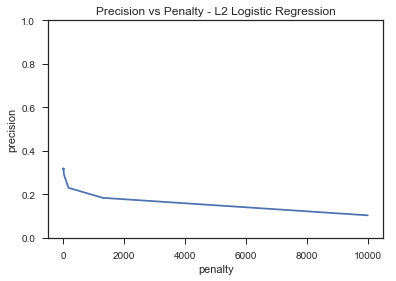

In [29]:
# L2 Logistic Regression Graph
# Plotting how the score changes with alpha
score_array  = [0.10311111,  0.18355556,  0.22977778,  0.28844444,  0.31466667, 0.31822222,  0.31555556,  0.31777778,  0.31644444,  0.31822222]
penalty = [1.00000000e+04,   1.29154967e+03,   1.66810054e+02,   2.15443469e+01,
   2.78255940e+00,   3.59381366e-01,   4.64158883e-02,   5.99484250e-03,
   7.74263683e-04,   1.00000000e-04]
fig, ax= plt.subplots()
plt.plot(penalty, score_array)
plt.xlabel("penalty")
plt.ylabel("precision")
ax.set_ylim([0,1])
plt.title("Precision vs Penalty - L2 Logistic Regression")
fig.savefig('Images/Model Selection/l2_penalty.png')

In [30]:
alpha = 1/logit_l1.Cs_
print(alpha)

[  1.00000000e+04   1.29154967e+03   1.66810054e+02   2.15443469e+01
   2.78255940e+00   3.59381366e-01   4.64158883e-02   5.99484250e-03
   7.74263683e-04   1.00000000e-04]


In [31]:
avgDict = {}
for k,v in logit_l1.scores_.items():
    # v is the list of grades for student k
    avgDict[k] = sum(v)/ float(len(v))

avgDict

{1: array([ 0.        ,  0.        ,  0.67320223,  0.63647881,  0.62747471,
         0.62131434,  0.61141902,  0.60968808,  0.61497459,  0.60831367])}

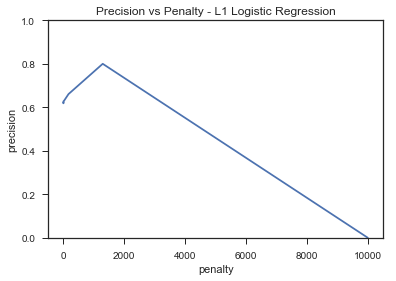

In [32]:
# L1 Logistic Regression Graph
# Plotting how the score changes with alpha
score_array  = [0.        ,  0.8       ,  0.6606322 ,  0.63013905,  0.62797977,
         0.61885625,  0.61842541,  0.6182615 ,  0.62115698,  0.62316858]
penalty = [1.00000000e+04,   1.29154967e+03,   1.66810054e+02,   2.15443469e+01,
   2.78255940e+00,   3.59381366e-01,   4.64158883e-02,   5.99484250e-03,
   7.74263683e-04,   1.00000000e-04]
fig, ax= plt.subplots()
plt.plot(penalty, score_array)
plt.xlabel("penalty")
plt.ylabel("precision")
ax.set_ylim([0,1])
plt.title("Precision vs Penalty - L1 Logistic Regression")
fig.savefig('Images/Model Selection/l1_penalty.png')

#### Important Coefficients
The following plots show the important coefficients for the logistic regression models. They are ordered from largest to smallest coefficient.

Logistic Regression picked 116 features and eliminated the other 0 features


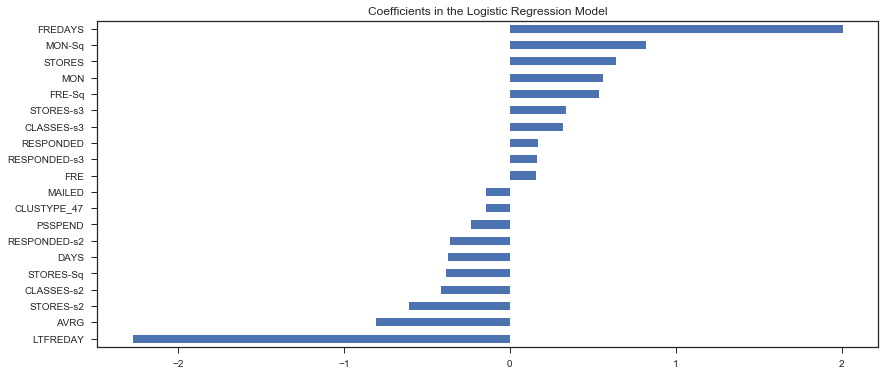

In [33]:
# Plot important coefficients
fig, ax= plt.subplots(figsize=(14, 6))
coefs = pd.Series(logit.coef_.flatten(), index = X_train.columns)
print("Logistic Regression picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Logistic Regression Model")
plt.show()
fig.savefig('Images/Model Selection/LogisticCoefficients.png')

L1 Logistic Regression picked 5 features and eliminated the other 111 features


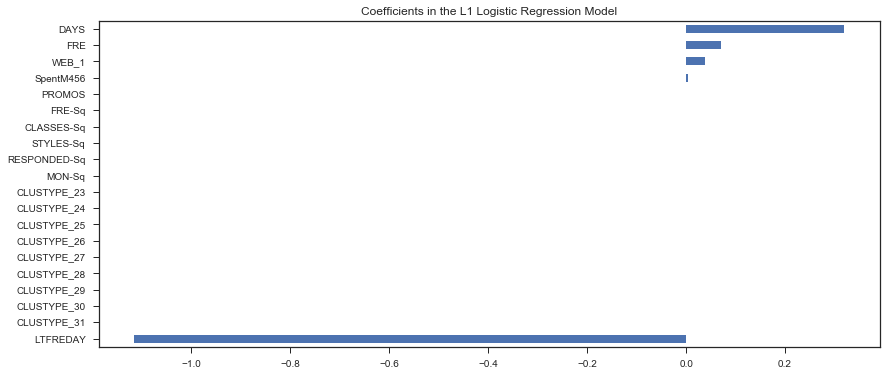

In [34]:
# Plot important coefficients
fig, ax= plt.subplots(figsize=(14, 6))
coefs = pd.Series(logit_l1.coef_.flatten(), index = X_train.columns)
print("L1 Logistic Regression picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the L1 Logistic Regression Model")
plt.show()
fig.savefig('Images/Model Selection/L1Coefficients.png')

L2 Logistic Regression picked 116 features and eliminated the other 0 features


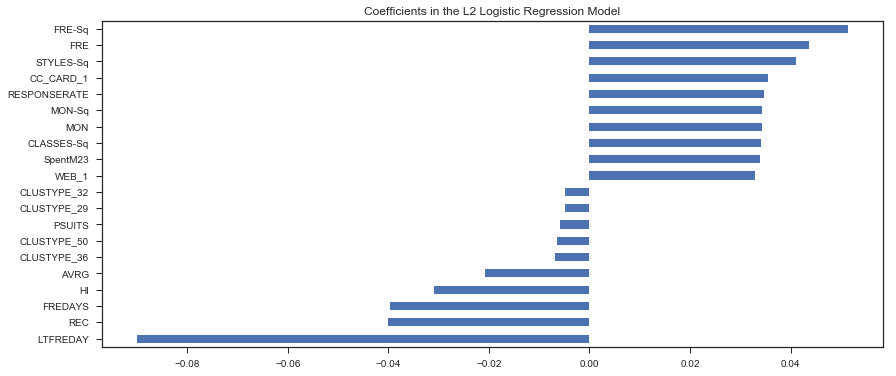

In [35]:
# Plot important coefficients
fig, ax= plt.subplots(figsize=(14, 6))
coefs = pd.Series(logit_l2.coef_.flatten(), index = X_train.columns)
print("L2 Logistic Regression picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the L2 Logistic Regression Model")
plt.show()
fig.savefig('Images/Model Selection/L2Coefficients.png')

### Gaussian discriminant analysis
Since GDA replies on the assumption of normality, we exclude the binary predictor for this class of models. We also log transform the numerical features.

In [25]:
%%time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

Wall time: 166 ms


For regularisation, we need to write a routine to select the hyperparameter by cross validation.

In [26]:
%%time
from sklearn.model_selection import cross_val_score

def qda_cv(X_train, y_train):
    
    alphas  = np.linspace(0, 1, 51)
    best_score = -np.inf
    
    score_array = []
    
    for alpha in alphas:
        qda = QuadraticDiscriminantAnalysis(reg_param=alpha)
        score = np.mean(cross_val_score(qda, X_train, y_train, cv=10, scoring = 'precision'))
        score_array.append(score)
        if score >= best_score:
            best = qda
            best_score = score
    
    return qda.fit(X_train, y_train)       

qda_reg = qda_cv(X_train, y_train)

Wall time: 31.6 s


In [38]:
%%time
from sklearn.model_selection import cross_val_score

def qda_cv_scores(X_train, y_train):
    
    alphas  = np.linspace(0, 1, 51)
    best_score = -np.inf
    
    score_array = []
    
    for alpha in alphas:
        qda = QuadraticDiscriminantAnalysis(reg_param=alpha)
        score = np.mean(cross_val_score(qda, X_train, y_train, cv=10, scoring = 'precision'))
        score_array.append(score)
        if score >= best_score:
            best = qda
            best_score = score
    
    return score_array       

score_array = qda_cv_scores(X_train, y_train)

Wall time: 33 s


#### Scores for CV QDA Regularised

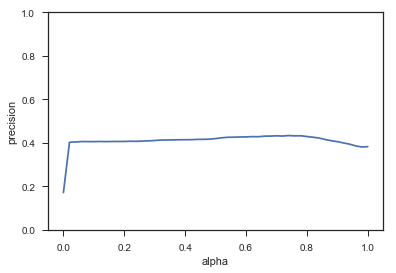

In [39]:
# Plotting how the score changes with alpha
alphas  = np.linspace(0, 1, 51)
fig, ax= plt.subplots()
plt.plot(alphas, score_array)
plt.xlabel("alpha")
plt.ylabel("precision")
ax.set_ylim([0,1])
fig.savefig('Images/Model Selection/QDARegScores.png')

### K-nearest neighbours classifier
For the KNN classifier, we also need to write a routine to select te number of neighbours by cross validation.

In [27]:
%%time
from sklearn.neighbors import KNeighborsClassifier

def knn_cv(X_train, y_train):
    
    
    neighbours = np.arange(1, 4)
    best_score = 0
    
    for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors = k ,  metric='mahalanobis', metric_params={'V': X_train.cov()})
        score = np.mean(cross_val_score(knn, X_train, y_train, cv=3, scoring = 'precision'))
        
        if score >= best_score:
            best = knn
            best_score = score
    
    return best
        
knn = knn_cv(X_train, y_train) 
knn.fit(X_train, y_train)

Wall time: 1h 14min 51s


#### Scores for CV KNN

This is to make the graph below

In [45]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def knn_cv_score_array(X_train, y_train):
    
    neighbours = np.arange(1, 4)
    best_score = 0
    score_array = []
    
    for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors = k ,  metric='mahalanobis', metric_params={'V': X_train.cov()})
        score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring = 'precision'))
        score_array.append(score)
        if score >= best_score:
            best = knn
            best_score = score
    
    return score_array
        
score_array = knn_cv_score_array(X_train, y_train)

Wall time: 1h 30min 57s


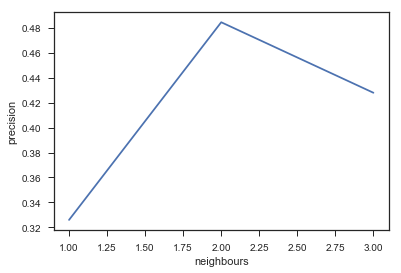

In [46]:
# Plotting how the score changes with alpha
neighbours = np.arange(1, 4)
fig, ax= plt.subplots()
plt.plot(neighbours, score_array)
plt.xlabel("neighbours")
plt.ylabel("precision")
fig.savefig('Images/Model Selection/KNNScore.png')

We see that the accuracy increased with the number of neighbours. We should discuss this in terms of the bias-variance trade-off. It is interesting to note that it appears to be slowly increasing. However, due to prohibitive computational requirements 10 neighbours was the max amount which could be tested.

### Model Selection Scores
Using the training data - with KNN

In [28]:
# Use this one
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns=['Error rate', 'SE', 'Sensitivity', 'Specificity', 'AUC', 'Precision']
rows=['KNN','Logistic', 'L1 regularised', 'L2 regularised', 'LDA', 'QDA', 'Regularised QDA']
results=pd.DataFrame(0.0, columns=columns, index=rows) 


methods=[knn, logit, logit_l1, logit_l2, lda, qda, qda_reg]

for i, method in enumerate(methods):
    
    # Removed Marcel code as using all predictors
    # Change if excluding some
    y_pred = method.predict(X_train)
    y_prob = method.predict_proba(X_train)
        
    confusion  = confusion_matrix(y_train, y_pred) 
    error_rate =  1 - accuracy_score(y_train, y_pred)

    results.iloc[i,0]=  error_rate
    results.iloc[i,1]=  np.sqrt(error_rate*(1- error_rate)/len(y_train))
    results.iloc[i,2]=  confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,3]=  confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,4]=  roc_auc_score(y_train, y_prob[:,1])
    results.iloc[i,5]=  precision_score(y_train, y_pred)

results.round(3)

Error rate     SE  Sensitivity  Specificity    AUC  Precision
KNN                   0.119  0.003        0.270        1.000  0.960      1.000
Logistic              0.139  0.003        0.332        0.964  0.862      0.645
L1 regularised        0.145  0.003        0.231        0.977  0.844      0.661
L2 regularised        0.152  0.003        0.126        0.989  0.805      0.695
LDA                   0.144  0.003        0.353        0.955  0.855      0.604
QDA                   0.763  0.004        0.983        0.091  0.693      0.174
Regularised QDA       0.223  0.004        0.596        0.812  0.795      0.383

In [161]:
# Without KNN - don't use
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns=['Error rate', 'SE', 'Sensitivity', 'Specificity', 'AUC', 'Precision']
rows=['Logistic', 'L1 regularised', 'L2 regularised', 'LDA', 'QDA', 'Regularised QDA']
results=pd.DataFrame(0.0, columns=columns, index=rows) 


methods=[logit, logit_l1, logit_l2, lda, qda, qda_reg]

for i, method in enumerate(methods):
    
    # Removed Marcel code as using all predictors
    # Change if excluding some
    y_pred = method.predict(X_train)
    y_prob = method.predict_proba(X_train)
        
    confusion  = confusion_matrix(y_train, y_pred) 
    error_rate =  1 - accuracy_score(y_train, y_pred)

    results.iloc[i,0]=  error_rate
    results.iloc[i,1]=  np.sqrt(error_rate*(1- error_rate)/len(y_train))
    results.iloc[i,2]=  confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,3]=  confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,4]=  roc_auc_score(y_train, y_prob[:,1])
    results.iloc[i,5]=  precision_score(y_train, y_pred)

results.round(3)

Error rate     SE  Sensitivity  Specificity    AUC  Precision
Logistic              0.143  0.003        0.245        0.977  0.848      0.677
L1 regularised        0.143  0.003        0.244        0.978  0.848      0.681
L2 regularised        0.143  0.003        0.235        0.979  0.846      0.682
LDA                   0.149  0.003        0.318        0.955  0.826      0.583
QDA                   0.166  0.003        0.378        0.923  0.805      0.492
Regularised QDA       0.208  0.003        0.561        0.837  0.794      0.402

## Model Evaluation
Using the test data

In [29]:
# With KNN - use this one
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns=['Error rate', 'SE', 'Sensitivity', 'Specificity', 'AUC', 'Precision']
rows=['KNN','Logistic', 'L1 regularised', 'L2 regularised', 'LDA', 'QDA', 'Regularised QDA']
results=pd.DataFrame(0.0, columns=columns, index=rows) 


methods=[knn, logit, logit_l1, logit_l2, lda, qda, qda_reg]

for i, method in enumerate(methods):
    
    # Removed Marcel code as using all predictors
    # Change if excluding some
    y_pred = method.predict(X_test)
    y_prob = method.predict_proba(X_test)
        
    confusion  = confusion_matrix(y_test, y_pred) 
    error_rate =  1 - accuracy_score(y_test, y_pred)

    results.iloc[i,0]=  error_rate
    results.iloc[i,1]=  np.sqrt(error_rate*(1- error_rate)/len(y_test))
    results.iloc[i,2]=  confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,3]=  confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,4]=  roc_auc_score(y_test, y_prob[:,1])
    results.iloc[i,5]=  precision_score(y_test, y_pred)

results.round(3)

Error rate     SE  Sensitivity  Specificity    AUC  Precision
KNN                   0.167  0.006        0.113        0.973  0.640      0.449
Logistic              0.145  0.005        0.316        0.960  0.847      0.604
L1 regularised        0.142  0.005        0.263        0.973  0.842      0.657
L2 regularised        0.149  0.005        0.149        0.987  0.791      0.693
LDA                   0.149  0.005        0.341        0.950  0.842      0.568
QDA                   0.767  0.006        0.974        0.089  0.660      0.172
Regularised QDA       0.221  0.006        0.583        0.817  0.782      0.382

In [31]:
# Without KNN - don't use
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns=['Error rate', 'SE', 'Sensitivity', 'Specificity', 'AUC', 'Precision']
rows=['Logistic', 'L1 regularised', 'L2 regularised', 'LDA', 'QDA', 'Regularised QDA']
results=pd.DataFrame(0.0, columns=columns, index=rows) 


methods=[logit, logit_l1, logit_l2, lda, qda, qda_reg]

for i, method in enumerate(methods):
    
    # Removed Marcel code as using all predictors
    # Change if excluding some
    y_pred = method.predict(X_test)
    y_prob = method.predict_proba(X_test)
        
    confusion  = confusion_matrix(y_test, y_pred) 
    error_rate =  1 - accuracy_score(y_test, y_pred)

    results.iloc[i,0]=  error_rate
    results.iloc[i,1]=  np.sqrt(error_rate*(1- error_rate)/len(y_test))
    results.iloc[i,2]=  confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,3]=  confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,4]=  roc_auc_score(y_test, y_prob[:,1])
    results.iloc[i,5]=  precision_score(y_test, y_pred)

results.round(3)

Error rate     SE  Sensitivity  Specificity    AUC  Precision
Logistic              0.145  0.005        0.316        0.960  0.847      0.604
L1 regularised        0.142  0.005        0.264        0.973  0.842      0.658
L2 regularised        0.149  0.005        0.149        0.987  0.791      0.693
LDA                   0.149  0.005        0.341        0.950  0.842      0.568
QDA                   0.767  0.006        0.974        0.089  0.660      0.172
Regularised QDA       0.221  0.006        0.583        0.817  0.782      0.382

In [32]:
len(y_test)

4304

IndexError: list index out of range

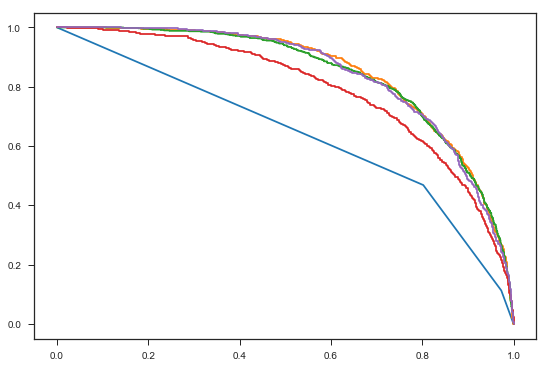

In [30]:
palette = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD']

from sklearn.metrics import roc_curve

labels=['KNN', 'Logistic regression', 'L2 regularised', 'LDA', 'Regularised QDA']
methods=[knn, logit, logit_l1, logit_l2, lda, qda, qda_reg]

fig, ax= plt.subplots(figsize=(9,6))

for i, method in enumerate(methods):
    
    y_prob = method.predict_proba(X_test)
    
        
    fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
    auc = roc_auc_score(y_test, y_prob[:,1])
    ax.plot(1-fpr, tpr, label=labels[i] + ' (AUC = {:.3f})'.format(auc), color = palette[i])
    
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
plt.show()

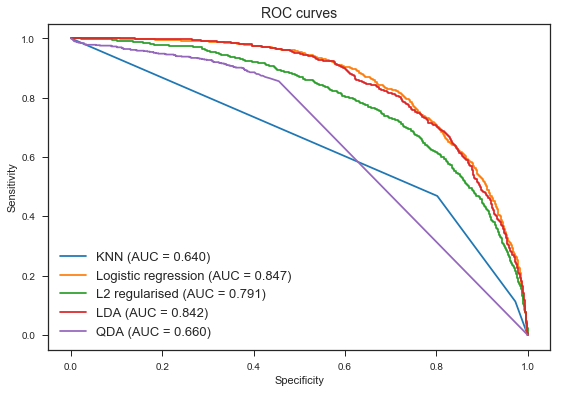

In [37]:
# Without KNN
palette = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD']

from sklearn.metrics import roc_curve

labels=['KNN', 'Logistic regression', 'L2 regularised', 'LDA', 'QDA']
methods=[knn, logit, logit_l2, lda, qda]

fig, ax= plt.subplots(figsize=(9,6))

for i, method in enumerate(methods):
    
    y_prob = method.predict_proba(X_test)
    
        
    fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
    auc = roc_auc_score(y_test, y_prob[:,1])
    ax.plot(1-fpr, tpr, label=labels[i] + ' (AUC = {:.3f})'.format(auc), color = palette[i])
    
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_title('ROC curves', fontsize=14)
plt.legend(fontsize=13)
fig.savefig('ROCCurve.png')
plt.show()

## Model Selection
Based on the training data only, you formulate and estimate models,  use cross validation to tune hyperparameters,  and finally use a validation set or cross validation again to estimate the generalisation performance of all these methods. The relevant performance metric should be based on the business problem (that is, related to the profit of the marketing campaign).   The outcome of this analysis is a final model (one model) to be deployed.

The profit maximisation is therefore based on the training data. 

In [27]:
# These are our values form the confusion matrix
L_tn = 0
L_fp = -19.78
L_fn = 22.78
L_tp = 3

# Split the data into training and validations sets - will need to do above

# Find the models using the training data - process above

# Predict the validation predictions from the trained models

# We then calculate the confusion matrix for the validation data

# Find the profit based on the confusion matrix

# Select the model with the highest validation score

# Repeat for all the models


In [28]:
# Logistic Regression

# Predict the validation predictions
logistic_predictions = logit.predict(X_validate)

# Find the confusion matrix
from sklearn.metrics import confusion_matrix
confusion  = confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [32]:
# Calculate the profit function
def profit_calculate(model, X_values, y_true):
    
    y_pred = model.predict(X_values)
    
    from sklearn.metrics import confusion_matrix
    confusion  = confusion_matrix(y_true, y_pred)
    
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    
    L_tn = 0
    L_tp = -19.78
    L_fn = 22.78
    L_fp = 3
    
    N = len(y_pred)
    
    # Find the score
    profit = (TN*L_tn + FP*L_fp + FN*L_fn + TP*L_tp)/N
    
    return profit

### Log Transformation

In [235]:
profit_logistic = profit_calculate(logit, X_validate, y_validate)
print(profit_logistic)

1.56817073171


In [236]:
profit_l1_logistic = profit_calculate(logit_l1, X_validate, y_validate)
print(profit_l1_logistic)

1.58052845528


In [237]:
profit_l2_logistic = profit_calculate(logit_l2, X_validate, y_validate)
print(profit_l2_logistic)

1.57791521487


In [241]:
profit_lda = profit_calculate(lda, X_validate, y_validate)
print(profit_lda)

1.43904181185


In [242]:
profit_qda = profit_calculate(qda, X_validate, y_validate)
print(profit_qda)

1.26799651568


In [243]:
profit_qda_reg = profit_calculate(qda_reg, X_validate, y_validate)
print(profit_qda_reg)

-0.102711962834


### Box Cox

In [269]:
profit_logistic = profit_calculate(logit, X_validate, y_validate)
print(profit_logistic)

1.61324622532


In [270]:
profit_l1_logistic = profit_calculate(logit_l1, X_validate, y_validate)
print(profit_l1_logistic)

1.61324622532


In [271]:
profit_l2_logistic = profit_calculate(logit_l2, X_validate, y_validate)
print(profit_l2_logistic)

1.59914634146


In [272]:
profit_lda = profit_calculate(lda, X_validate, y_validate)
print(profit_lda)

1.51144599303


In [273]:
profit_qda = profit_calculate(qda, X_validate, y_validate)
print(profit_qda)

1.26173635308


In [274]:
profit_qda_reg = profit_calculate(qda_reg, X_validate, y_validate)
print(profit_qda_reg)

-0.0947096399535


### Log Transformation - Changing to Precision

In [50]:
profit_logistic = profit_calculate(logit, X_validate, y_validate)
print(profit_logistic)

1.55842624855


In [51]:
profit_l1_logistic = profit_calculate(logit_l1, X_validate, y_validate)
print(profit_l1_logistic)

2.07167828107


In [52]:
profit_l2_logistic = profit_calculate(logit_l2, X_validate, y_validate)
print(profit_l2_logistic)

2.9768931475


In [53]:
profit_lda = profit_calculate(lda, X_validate, y_validate)
print(profit_lda)

1.31007549361


In [54]:
profit_qda = profit_calculate(qda, X_validate, y_validate)
print(profit_qda)

-0.732305458769


In [55]:
profit_qda_reg = profit_calculate(qda_reg, X_validate, y_validate)
print(profit_qda_reg)

NameError: name 'qda_reg' is not defined

### Log Transformation - Changing to Recall

In [363]:
profit_logistic = profit_calculate(logit, X_validate, y_validate)
print(profit_logistic)

1.56817073171


In [364]:
profit_l1_logistic = profit_calculate(logit_l1, X_validate, y_validate)
print(profit_l1_logistic)

1.53458188153


In [365]:
profit_l2_logistic = profit_calculate(logit_l2, X_validate, y_validate)
print(profit_l2_logistic)

1.53458188153


In [366]:
profit_lda = profit_calculate(lda, X_validate, y_validate)
print(profit_lda)

1.43904181185


In [367]:
profit_qda = profit_calculate(qda, X_validate, y_validate)
print(profit_qda)

1.26799651568


In [379]:
profit_qda_reg = profit_calculate(qda_reg, X_validate, y_validate)
print(profit_qda_reg)

-0.102711962834


### Cluster variables

In [411]:
profit_logistic = profit_calculate(logit, X_validate, y_validate)
print(profit_logistic)

1.55842624855


In [412]:
profit_l1_logistic = profit_calculate(logit_l1, X_validate, y_validate)
print(profit_l1_logistic)

1.54432636469


In [499]:
profit_l2_logistic = profit_calculate(logit_l2, X_validate, y_validate)
print(profit_l2_logistic)

2.9768931475


In [413]:
profit_lda = profit_calculate(lda, X_validate, y_validate)
print(profit_lda)

1.31007549361


In [434]:
profit_qda = profit_calculate(qda, X_validate, y_validate)
print(profit_qda)

-0.732305458769


In [433]:
profit_qda_reg = profit_calculate(qda_reg, X_validate, y_validate)
print(profit_qda_reg)

-0.128298490128


### CV = 10

In [26]:
profit_logistic = profit_calculate(logit, X_validate, y_validate)
print(profit_logistic)

NameError: name 'profit_calculate' is not defined

In [502]:
profit_l1_logistic = profit_calculate(logit_l1, X_validate, y_validate)
print(profit_l1_logistic)

2.07254936121


In [503]:
profit_l2_logistic = profit_calculate(logit_l2, X_validate, y_validate)
print(profit_l2_logistic)

2.9768931475


In [496]:
profit_lda = profit_calculate(lda, X_validate, y_validate)
print(profit_lda)

1.31007549361


In [497]:
profit_qda = profit_calculate(qda, X_validate, y_validate)
print(profit_qda)

-0.732305458769


In [498]:
profit_qda_reg = profit_calculate(qda_reg, X_validate, y_validate)
print(profit_qda_reg)

-0.128298490128


In [33]:
profit_knn = profit_calculate(knn, X_validate, y_validate)
print(profit_knn)

3.07265389082


# Model Evaluation

## Finding Baseline Model Parameters

In [38]:
len(y_test)

4304

In [39]:
len(y_test[y_test == 1])

700

In [40]:
len(y_test[y_test == 0])

3604

## QDA Model

In [47]:
profit_qda = profit_calculate(qda, X_test, y_test)
print(profit_qda)

-0.749981412639


In [48]:
y_pred = qda.predict(X_test)
    
from sklearn.metrics import confusion_matrix
confusion  = confusion_matrix(y_test, y_pred)
confusion

array([[ 320, 3284],
       [  18,  682]])

## Logistic Regression Model

In [46]:
profit_logistic = profit_calculate(logit, X_test, y_test)
print(profit_logistic)

1.62064126394


In [43]:
y_pred = logit.predict(X_test)
    
from sklearn.metrics import confusion_matrix
confusion  = confusion_matrix(y_test, y_pred)
confusion

array([[3459,  145],
       [ 479,  221]])